# pull in the data

In [1]:
#import warnings
#warnings.filterwarnings("ignore")

In [2]:
#import some relative libraries
import pandas as pd
import numpy as np
import math
from numbers import Number
from scipy import stats

from sklearn.base import BaseEstimator, TransformerMixin


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, RocCurveDisplay, classification_report
from sklearn.metrics import precision_score, recall_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline




In [3]:
#load in the data from an excel file and save in a pandas dataset
#preview the data
bean_df= pd.read_excel('my_data/Dry_Bean_Dataset.xlsx')
bean_df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

# Initial data understading and preperation

In [4]:
#check for data types and see if information is missing
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

We can see that no instances are missing or NAN values, and that all variables 
are continuous except for the target variable 

In [5]:
#column information and dataset taken from
#https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
#column information
"""
1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12.)Compactness (CO): Measures the roundness of an object: Ed/L
13.)ShapeFactor1 (SF1)
14.)ShapeFactor2 (SF2)
15.)ShapeFactor3 (SF3)
16.)ShapeFactor4 (SF4)
17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)
"""

'\n1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.\n2.) Perimeter (P): Bean circumference is defined as the length of its border.\n3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.\n4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.\n5.) Aspect ratio (K): Defines the relationship between L and l.\n6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.\n7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.\n8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.\n9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.\n10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.\n11.)Roundness (R): Calculated with the 

In [6]:
bean_df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [7]:
#check out the target class
bean_df['Class'].value_counts(normalize=True)

Class
DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: proportion, dtype: float64

Here we can see that the 'DERMASON' bean is the most commonly represented out of the 7 bean types.
This specific bean will become our target class, and we will try to predict if a bean is or isn't
a Dermason bean based off of other present dependent vartiables. 
so we will be running

# feature engineering


Currently the target variable column shows which of the 7 beans each row is. We want to create a new target varable column showing if an instance is or is not a Dermason bean.

In [8]:
#lambda function creating column showing if instance is or isn't the target bean
bean_df['Dermason']= bean_df['Class'].apply(lambda x: 1 if x == 'DERMASON' else 0) 
bean_df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  \
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER   
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER   
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER   
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER   
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER   

   Dermason  
0         0  
1         0  
2         0  
3         0  
4         0

In [9]:
#check to make sure this new Dermason column proportion matches the above proportion
bean_df['Dermason'].value_counts(normalize=True)

Dermason
0    0.739475
1    0.260525
Name: proportion, dtype: float64

The proportion matches but is only a quarter of the dataset. This may lead to underrepresentation problems in the classification down the line. Potential solutions are using SMOTE to artifically increase there Dermason (denoted by '1') frequency, and random undersampling of the '0' instances to bring the ratio closer to 50-50.

# Splitting the data up into train and test subsets

In [10]:
#assign the independent variable columns
X= bean_df.drop(['Dermason','Class'], axis = 1)
#assign the dependant variable columns
y= bean_df['Dermason']

#split up the data into train and test subsets
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 24, test_size= 0.1)

# build a vanilla base line model and evaluate 

In [11]:
#start out with logistic regression as a baseline model 

#lr1 is logistic regression #1
#initialize the model
lr1 = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
#fit the model
lr1.fit(X_train, y_train)
#make predictions with the model
y_pred_lr1= lr1.predict(X_train)

print(classification_report(y_train, y_pred_lr1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9073
           1       0.87      0.83      0.85      3176

    accuracy                           0.92     12249
   macro avg       0.91      0.89      0.90     12249
weighted avg       0.92      0.92      0.92     12249



In [12]:
#do some cross-validation to see how the model reacts to data it has not been trained on
cv_results = cross_val_score(lr1, X_train, y_train, cv= 6)
print('An array of baseline model accuracy results across (6) cross Validations:')
print(cv_results)
print()
print('The average accuracy score of those 6 cross-validations:')
print(cv_results.mean())

An array of baseline model accuracy results across (6) cross Validations:
[0.91283056 0.92850147 0.92850147 0.92405683 0.91817736 0.92160706]

The average accuracy score of those 6 cross-validations:
0.9222791251431838


On average this model accurately classifies 92.22% of the bean instances.

To help compare this model to future versions of models I will make a class to help store models and their cross-validation scores.

In [13]:
#works
class ModelWithCV():

    #call out the values
    def __init__(self, model, model_name, X, y, cv_now= True):
        #for the model and data
        self.model= model
        self.name= model_name
        self.X= X
        self.y= y
        #for the cross-validation results
        self.cv_results= None
        self.cv_mean= None
        self.cv_median= None
        self.cv_std= None
        # cross-validation activation
        if cv_now:
            self.cross_validate()

    #perform cross-validation and return the results
    def cross_validate(self, X= None, y= None, kfolds=10):
        """
        Here X, y, and kfolds are optional arguments.
        If not specifically called out, X and y will default to object values,
        and kfolds will default to 10.
        """
        #assigns the X and y values
        cv_X= X if X else self.X
        cv_y= y if y else self.y

        #assigns the cross-validation results
        self.cv_results= cross_val_score(self.model, cv_X, cv_y, cv= kfolds)
        self.cv_mean= np.mean(self.cv_results)
        self.cv_medain= np.median(self.cv_results)
        self.cv_std= np.std(self.cv_results)

    #prints the cross-validation summary
    def print_cv_summary(self):
        cv_summary= (
            f"CV results for {self.name} model: {self.cv_mean:.5f} +- {self.cv_std:.5f} accuracy")
        print(cv_summary)

    #plots the cross-validation values
    def plot_cv(self, ax):
        ax.set_title(f"CV results for '{self.name}' Model")
        sns.violinplot(y= self.cv_results, ax= ax, bw_method= .4)
        sns.swarmplot(y= self.cv_results, color= 'red', size= 10,
                      alpha= .8, ax= ax)

        return ax 

In [14]:
#works
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

class ModelWithCV():
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        self.cv_specificity_mean = None
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
        """
        Perform cross-validation. Optionally, X, y, and kfolds can be specified.
        X and y default to the instance values, and kfolds defaults to 10.
        """
        # Use provided or instance values for X and y
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # Convert to numpy arrays to ensure proper indexing
        cv_X = cv_X.values if isinstance(cv_X, pd.DataFrame) else cv_X
        cv_y = cv_y.values if isinstance(cv_y, pd.Series) else cv_y

        # Perform cross-validation for accuracy scores
        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        # Calculate the specificity for each fold using StratifiedKFold
        cv_splits = StratifiedKFold(n_splits=kfolds)
        specificity_scores = []

        for train_idx, test_idx in cv_splits.split(cv_X, cv_y):
            # Split data into training and test sets
            X_train, X_test = cv_X[train_idx], cv_X[test_idx]
            y_train, y_test = cv_y[train_idx], cv_y[test_idx]

            # Fit model and make predictions
            self.model.fit(X_train, y_train)
            y_pred = self.model.predict(X_test)

            # Compute confusion matrix for the fold
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            specificity = tn / (tn + fp)  # Specificity calculation
            specificity_scores.append(specificity)

        # Store the average specificity
        self.cv_specificity_mean = np.mean(specificity_scores)

    def print_cv_summary(self):
        cv_summary = (
            f"CV results for {self.name} model: {self.cv_mean:.5f} +- {self.cv_std:.5f} accuracy\n"
            f"Average specificity: {self.cv_specificity_mean:.5f}")
        print(cv_summary)

    def plot_cv(self, ax):
        ax.set_title(f"CV results for '{self.name}' Model")
        sns.violinplot(y=self.cv_results, ax=ax, bw_method=.4)
        sns.swarmplot(y=self.cv_results, color='red', size=10, alpha=.8, ax=ax)
        return ax


In [15]:
#works
class ModelWithCV():
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        self.cv_specificity_mean = None
        self.avg_conf_matrix = None
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
        """
        Perform cross-validation. Optionally, X, y, and kfolds can be specified.
        X and y default to the instance values, and kfolds defaults to 10.
        """
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # Convert to numpy arrays to avoid indexing issues with pandas
        cv_X = cv_X.values if isinstance(cv_X, pd.DataFrame) else cv_X
        cv_y = cv_y.values if isinstance(cv_y, pd.Series) else cv_y

        # Perform cross-validation for accuracy scores
        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        # Initialize variables for confusion matrix accumulation
        cv_splits = StratifiedKFold(n_splits=kfolds)
        specificity_scores = []
        total_conf_matrix = np.zeros((2, 2))  # Initialize a 2x2 matrix for binary classification

        for train_idx, test_idx in cv_splits.split(cv_X, cv_y):
            # Split data into training and test sets
            X_train, X_test = cv_X[train_idx], cv_X[test_idx]
            y_train, y_test = cv_y[train_idx], cv_y[test_idx]

            # Fit model and make predictions
            self.model.fit(X_train, y_train)
            y_pred = self.model.predict(X_test)

            # Compute confusion matrix for the fold
            TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
            total_conf_matrix += confusion_matrix(y_test, y_pred)

            # Compute specificity
            specificity = TN / (TN + FP)  # Specificity calculation
            specificity_scores.append(specificity)

        # Store the average specificity
        self.cv_specificity_mean = np.mean(specificity_scores)

        # Average confusion matrix (normalize if desired)
        self.avg_conf_matrix = total_conf_matrix / kfolds

    def print_cv_summary(self):
        cv_summary = (
            f"CV results for {self.name} model: {self.cv_mean:.5f} +- {self.cv_std:.5f} accuracy\n"
            f"Average specificity: {self.cv_specificity_mean:.5f}")
        print(cv_summary)

    def plot_cv(self, ax):
        ax.set_title(f"CV results for '{self.name}' Model")
        sns.violinplot(y=self.cv_results, ax=ax, bw_method=.4)
        sns.swarmplot(y=self.cv_results, color='red', size=10, alpha=.8, ax=ax)
        return ax

    def plot_avg_conf_matrix(self):
        """
        Plot the average confusion matrix using ConfusionMatrixDisplay.
        """
        if self.avg_conf_matrix is not None:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Confusion Matrix for {self.name}")
            plt.show()
        else:
            print("Confusion matrix is not available. Please run cross-validation first.")


In [16]:
#works
class ModelWithCV():
    def __init__(self, model_instantiator, model_name, X, y, model_kwargs = {}, scaler=False, smote_and_rand_und= False, cv_now=True):
        self.model_instatiator = model_instantiator
        self.model = None
        self.model_kwargs = model_kwargs
        self.name = model_name
        self.scaler= scaler
        self.smote_and_rand_und= smote_and_rand_und
        self.X = X
        self.y = y
#         self.cv_results = None
#         self.cv_mean = None
#         self.cv_median = None
#         self.cv_std = None
        self.cv_specificity_mean = None
        self.cv_precision_mean = None
        self.cv_recall_mean = None
        self.avg_conf_matrix = None
       
        self.cv_specificity_mean_train = None
        self.cv_precision_mean_train = None
        self.cv_recall_mean_train = None
        self.avg_conf_matrix_train = None
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
        """
        Perform cross-validation. Optionally, X, y, and kfolds can be specified.
        X and y default to the instance values, and kfolds defaults to 10.
        """
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # Convert to numpy arrays to avoid indexing issues with pandas
        cv_X = cv_X.values if isinstance(cv_X, pd.DataFrame) else cv_X
        cv_y = cv_y.values if isinstance(cv_y, pd.Series) else cv_y

#         Perform cross-validation for accuracy scores
#         self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
#         self.cv_mean = np.mean(self.cv_results)
#         self.cv_median = np.median(self.cv_results)
#         self.cv_std = np.std(self.cv_results)

        # Initialize variables for metrics accumulation
        cv_splits = StratifiedKFold(n_splits=kfolds)
        specificity_scores_train = []
        precision_scores_train = []
        recall_scores_train = []
       
        specificity_scores = []
        precision_scores = []
        recall_scores = []
        total_conf_matrix = np.zeros((2, 2))  # Initialize a 2x2 matrix for binary classification
        total_conf_matrix_train = np.zeros((2, 2))  # Initialize a 2x2 matrix for binary classification

        if self.scaler:
            print('Scaling')

        if self.smote_and_rand_und:
            print('SMOTEing and Randomly Undersampling')
        
        for train_idx, test_idx in cv_splits.split(cv_X, cv_y):
            # Split data into training and test sets
            X_train, X_test = cv_X[train_idx], cv_X[test_idx]
            y_train, y_test = cv_y[train_idx], cv_y[test_idx]
                    
            self.model = self.model_instatiator(random_state= 24, **self.model_kwargs)
            
            if self.scaler:
                cv_scaler= MinMaxScaler()
                X_train = cv_scaler.fit_transform(X_train)
                X_test = cv_scaler.transform(X_test)

            if self.smote_and_rand_und:
                #resamplingby by applying SMOTE and random undersampling to balance the training data
                smote = SMOTE(sampling_strategy='auto', random_state=24)  
                undersample = RandomUnderSampler(sampling_strategy='auto', random_state=24)

                # Create a pipeline that applies SMOTE and undersampling
                pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
        
                # Apply the resampling on the passed in data
                X_train, y_train = pipeline.fit_resample(X_train, y_train)
        
            # Fit model and make predictions
            self.model.fit(X_train, y_train)
           
            y_train_pred = self.model.predict(X_train)
            y_pred = self.model.predict(X_test)

            # Compute confusion matrix for the fold
            TN_train, FP_train, FN_train, TP_train = confusion_matrix(y_train, y_train_pred).ravel()
            total_conf_matrix_train += confusion_matrix(y_train, y_train_pred)
            # Compute specificity
            specificity_train = TN_train / (TN_train + FP_train)  # Specificity calculation
            specificity_scores_train.append(specificity_train)

            # Compute precision and recall for this fold
            precision_train = precision_score(y_train, y_train_pred)
            recall_train = recall_score(y_train, y_train_pred)
            precision_scores_train.append(precision_train)
            recall_scores_train.append(recall_train)
           
            # VAL      
            # Compute confusion matrix for the fold

            TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
            total_conf_matrix += confusion_matrix(y_test, y_pred)

            # Compute specificity
            specificity = TN / (TN + FP)  # Specificity calculation
            specificity_scores.append(specificity)

            # Compute precision and recall for this fold
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision_scores.append(precision)
            recall_scores.append(recall)

        # Store the average scores
        self.cv_specificity_mean_train = np.mean(specificity_scores_train)
        self.cv_precision_mean_train = np.mean(precision_scores_train)
        self.cv_recall_mean_train = np.mean(recall_scores_train)

        # Average confusion matrix (normalize if desired)
        self.avg_conf_matrix_train = total_conf_matrix_train / kfolds
              
        # Store the average scores
        self.cv_specificity_mean = np.mean(specificity_scores)
        self.cv_precision_mean = np.mean(precision_scores)
        self.cv_recall_mean = np.mean(recall_scores)

        # Average confusion matrix (normalize if desired)
        self.avg_conf_matrix = total_conf_matrix / kfolds

    def print_cv_summary(self):
        cv_summary_train = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean_train:.5f}\n"
            f"Average precision: {self.cv_precision_mean_train:.5f}\n"
            f"Average recall: {self.cv_recall_mean_train:.5f}")
        print('###TRAIN###')
        print(cv_summary_train)
       
        cv_summary_val = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean:.5f}\n"
            f"Average precision: {self.cv_precision_mean:.5f}\n"
            f"Average recall: {self.cv_recall_mean:.5f}")
        print('###VAL###')
        print(cv_summary_val)

        return self.cv_specificity_mean, self.cv_precision_mean, self.cv_recall_mean, \
        self.model_kwargs, self.scaler, self.smote_and_rand_und
       
#     def plot_cv(self, ax):
#         ax.set_title(f"CV results for '{self.name}' Model")
#         sns.violinplot(y=self.cv_results, ax=ax, bw_method=.4)
#         sns.swarmplot(y=self.cv_results, color='red', size=10, alpha=.8, ax=ax)
#         return ax

    def plot_avg_conf_matrix(self):
        """
        Plot the average confusion matrix using ConfusionMatrixDisplay.
        """
        if self.avg_conf_matrix is not None:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix_train)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Train Confusion Matrix for {self.name}")
            plt.show()
           
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Confusion Matrix for {self.name}")
            plt.show()
        else:
            print("Confusion matrix is not available. Please run cross-validation first.")

In [17]:
#works
class ModelWithCV():
    def __init__(self, model_instantiator, model_name, X, y, model_kwargs = {}, scaler=False, smote_and_rand_und= False, cv_now=True):
        self.model_instatiator = model_instantiator
        self.model = None
        self.model_kwargs = model_kwargs
        self.name = model_name
        self.scaler= scaler
        self.smote_and_rand_und= smote_and_rand_und
        self.X = X
        self.y = y
        self.cv_specificity_mean = None
        self.cv_precision_mean = None
        self.cv_recall_mean = None
        self.avg_conf_matrix = None
       
        self.cv_specificity_mean_train = None
        self.cv_precision_mean_train = None
        self.cv_recall_mean_train = None
        self.avg_conf_matrix_train = None
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
  
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # Convert to numpy arrays to avoid indexing issues with pandas
        cv_X = cv_X.values if isinstance(cv_X, pd.DataFrame) else cv_X
        cv_y = cv_y.values if isinstance(cv_y, pd.Series) else cv_y

        # Initialize variables for metrics accumulation
        cv_splits = StratifiedKFold(n_splits=kfolds)
        specificity_scores_train = []
        precision_scores_train = []
        recall_scores_train = []
       
        specificity_scores = []
        precision_scores = []
        recall_scores = []
        total_conf_matrix = np.zeros((2, 2))  # Initialize a 2x2 matrix for binary classification
        total_conf_matrix_train = np.zeros((2, 2))  # Initialize a 2x2 matrix for binary classification

        if self.scaler:
            print('Scaling')

        if self.smote_and_rand_und:
            print('SMOTEing and Randomly Undersampling')
        
        for train_idx, test_idx in cv_splits.split(cv_X, cv_y):
            # Split data into training and test sets
            X_train, X_test = cv_X[train_idx], cv_X[test_idx]
            y_train, y_test = cv_y[train_idx], cv_y[test_idx]
                    
            self.model = self.model_instatiator(random_state= 24, **self.model_kwargs)
            
            if self.scaler:
                cv_scaler= self.scaler
                X_train = cv_scaler.fit_transform(X_train)
                X_test = cv_scaler.transform(X_test)

            if self.smote_and_rand_und:
                #resamplingby by applying SMOTE and random undersampling to balance the training data
                smote = SMOTE(sampling_strategy='auto', random_state=24)  
                undersample = RandomUnderSampler(sampling_strategy='auto', random_state=24)

                # Create a pipeline that applies SMOTE and undersampling
                pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
        
                # Apply the resampling on the passed in data
                X_train, y_train = pipeline.fit_resample(X_train, y_train)
        
            # Fit model and make predictions
            self.model.fit(X_train, y_train)
           
            y_train_pred = self.model.predict(X_train)
            y_pred = self.model.predict(X_test)

            # Compute confusion matrix for the fold
            TN_train, FP_train, FN_train, TP_train = confusion_matrix(y_train, y_train_pred).ravel()
            total_conf_matrix_train += confusion_matrix(y_train, y_train_pred)
            # Compute specificity
            specificity_train = TN_train / (TN_train + FP_train)  # Specificity calculation
            specificity_scores_train.append(specificity_train)

            # Compute precision and recall for this fold
            precision_train = precision_score(y_train, y_train_pred)
            recall_train = recall_score(y_train, y_train_pred)
            precision_scores_train.append(precision_train)
            recall_scores_train.append(recall_train)
           
            # VAL      
            # Compute confusion matrix for the fold

            TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
            total_conf_matrix += confusion_matrix(y_test, y_pred)

            # Compute specificity
            specificity = TN / (TN + FP)  # Specificity calculation
            specificity_scores.append(specificity)

            # Compute precision and recall for this fold
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision_scores.append(precision)
            recall_scores.append(recall)

        # Store the average scores
        self.cv_specificity_mean_train = np.mean(specificity_scores_train)
        self.cv_precision_mean_train = np.mean(precision_scores_train)
        self.cv_recall_mean_train = np.mean(recall_scores_train)

        # Average confusion matrix (normalize if desired)
        self.avg_conf_matrix_train = total_conf_matrix_train / kfolds
              
        # Store the average scores
        self.cv_specificity_mean = np.mean(specificity_scores)
        self.cv_precision_mean = np.mean(precision_scores)
        self.cv_recall_mean = np.mean(recall_scores)

        # Average confusion matrix (normalize if desired)
        self.avg_conf_matrix = total_conf_matrix / kfolds

    def print_cv_summary(self):
        cv_summary_train = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean_train:.5f}\n"
            f"Average precision: {self.cv_precision_mean_train:.5f}\n"
            f"Average recall: {self.cv_recall_mean_train:.5f}")
        print('###TRAIN###')
        print(cv_summary_train)
       
        cv_summary_val = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean:.5f}\n"
            f"Average precision: {self.cv_precision_mean:.5f}\n"
            f"Average recall: {self.cv_recall_mean:.5f}")
        print('###VAL###')
        print(cv_summary_val)

        return self.cv_specificity_mean, self.cv_precision_mean, self.cv_recall_mean, \
        self.model_kwargs, self.scaler, self.smote_and_rand_und
    

    def plot_avg_conf_matrix(self):
        """
        Plot the average confusion matrix using ConfusionMatrixDisplay.
        """
        if self.avg_conf_matrix is not None:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix_train)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Train Confusion Matrix for {self.name}")
            plt.show()
           
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Confusion Matrix for {self.name}")
            plt.show()
        else:
            print("Confusion matrix is not available. Please run cross-validation first.")

In [18]:
#works
class ModelWithCV():
    def __init__(self, model_instantiator, model_name, X, y, model_kwargs = {},\
                 scaler=False, smote_and_rand_und= False, cv_now=True):
        self.model_instatiator = model_instantiator
        self.model = None
        self.model_kwargs = model_kwargs
        self.name = model_name
        self.scaler= scaler
        self.smote_and_rand_und= smote_and_rand_und
        self.X = X
        self.y = y
        self.cv_specificity_mean = None
        self.cv_precision_mean = None
        self.cv_recall_mean = None
        self.avg_conf_matrix = None
       
        self.cv_specificity_mean_train = None
        self.cv_precision_mean_train = None
        self.cv_recall_mean_train = None
        self.avg_conf_matrix_train = None
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
  
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # Convert to numpy arrays to avoid indexing issues with pandas
        cv_X = cv_X.values if isinstance(cv_X, pd.DataFrame) else cv_X
        cv_y = cv_y.values if isinstance(cv_y, pd.Series) else cv_y

        # Initialize variables for metrics accumulation
        cv_splits = StratifiedKFold(n_splits=kfolds)
        specificity_scores_train = []
        precision_scores_train = []
        recall_scores_train = []
       
        specificity_scores = []
        precision_scores = []
        recall_scores = []
        total_conf_matrix = np.zeros((2, 2))  # Initialize a 2x2 matrix for binary classification
        total_conf_matrix_train = np.zeros((2, 2))  # Initialize a 2x2 matrix for binary classification

        if self.scaler:
            print('Scaling')

        if self.smote_and_rand_und:
            print('SMOTEing and Randomly Undersampling')
        
        for train_idx, test_idx in cv_splits.split(cv_X, cv_y):
            # Split data into training and test sets
            X_train, X_test = cv_X[train_idx], cv_X[test_idx]
            y_train, y_test = cv_y[train_idx], cv_y[test_idx]
                    
            self.model = self.model_instatiator(random_state= 24, **self.model_kwargs)
            
            if self.scaler:
                cv_scaler= self.scaler
                X_train = cv_scaler.fit_transform(X_train)
                X_test = cv_scaler.transform(X_test)

            if self.smote_and_rand_und:
                #resamplingby by applying SMOTE and random undersampling to balance the training data
                smote = SMOTE(sampling_strategy='auto', random_state=24)  
                undersample = RandomUnderSampler(sampling_strategy='auto', random_state=24)

                # Create a pipeline that applies SMOTE and undersampling
                pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
        
                # Apply the resampling on the passed in data
                X_train, y_train = pipeline.fit_resample(X_train, y_train)
        
            # Fit model and make predictions
            self.model.fit(X_train, y_train)
           
            y_train_pred = self.model.predict(X_train)
            y_pred = self.model.predict(X_test)

            # Compute confusion matrix for the fold
            TN_train, FP_train, FN_train, TP_train = confusion_matrix(y_train, y_train_pred).ravel()
            total_conf_matrix_train += confusion_matrix(y_train, y_train_pred)
            # Compute specificity
            specificity_train = TN_train / (TN_train + FP_train)  # Specificity calculation
            specificity_scores_train.append(specificity_train)

            # Compute precision and recall for this fold
            precision_train = precision_score(y_train, y_train_pred)
            recall_train = recall_score(y_train, y_train_pred)
            precision_scores_train.append(precision_train)
            recall_scores_train.append(recall_train)
           
            # VAL      
            # Compute confusion matrix for the fold

            TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
            total_conf_matrix += confusion_matrix(y_test, y_pred)

            # Compute specificity
            specificity = TN / (TN + FP)  # Specificity calculation
            specificity_scores.append(specificity)

            # Compute precision and recall for this fold
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision_scores.append(precision)
            recall_scores.append(recall)

        # Store the average scores
        self.cv_specificity_mean_train = np.mean(specificity_scores_train)
        self.cv_precision_mean_train = np.mean(precision_scores_train)
        self.cv_recall_mean_train = np.mean(recall_scores_train)

        # Average confusion matrix (normalize if desired)
        self.avg_conf_matrix_train = total_conf_matrix_train / kfolds
              
        # Store the average scores
        self.cv_specificity_mean = np.mean(specificity_scores)
        self.cv_precision_mean = np.mean(precision_scores)
        self.cv_recall_mean = np.mean(recall_scores)

        # Average confusion matrix (normalize if desired)
        self.avg_conf_matrix = total_conf_matrix / kfolds

    def print_cv_summary(self):
        cv_summary_train = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean_train:.5f}\n"
            f"Average precision: {self.cv_precision_mean_train:.5f}\n"
            f"Average recall: {self.cv_recall_mean_train:.5f}")
        print('###TRAIN###')
        print(cv_summary_train)
       
        cv_summary_val = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean:.5f}\n"
            f"Average precision: {self.cv_precision_mean:.5f}\n"
            f"Average recall: {self.cv_recall_mean:.5f}")
        print('###VAL###')
        print(cv_summary_val)

        return self.cv_specificity_mean, self.cv_precision_mean, self.cv_recall_mean, \
        self.model_kwargs, self.scaler, self.smote_and_rand_und
    

    def plot_avg_conf_matrix(self):
        """
        Plot the average confusion matrix using ConfusionMatrixDisplay.
        """
        if self.avg_conf_matrix is not None:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix_train)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Train Confusion Matrix for {self.name}")
            plt.show()
           
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Confusion Matrix for {self.name}")
            plt.show()
        else:
            print("Confusion matrix is not available. Please run cross-validation first.")

## print the baseline model results

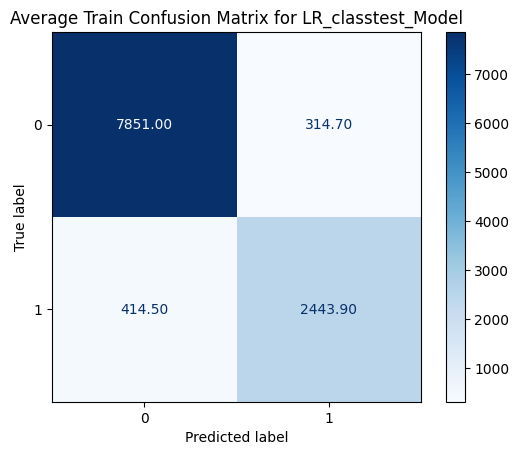

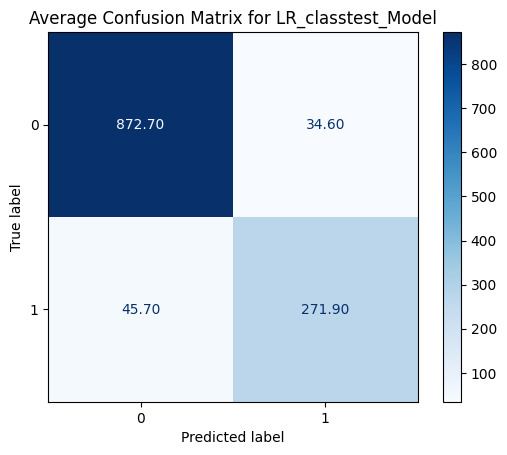

###TRAIN###
CV results for LR_classtest_Model model:Average specificity: 0.96146
Average precision: 0.88582
Average recall: 0.85499
###VAL###
CV results for LR_classtest_Model model:Average specificity: 0.96187
Average precision: 0.88769
Average recall: 0.85613


(0.9618657383347337, 0.887693568491631, 0.8561286034561435, {}, False, False)

In [221]:
lr_classtest_results_1= ModelWithCV_test(model_instantiator= LogisticRegression,
                                    model_name= 'LR_classtest_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= False,
                                    smote_and_rand_und= False,
                                    normalize= False
                                   )

lr_classtest_results_1.plot_avg_conf_matrix()

lr_classtest_results_1.print_cv_summary()

Scaling


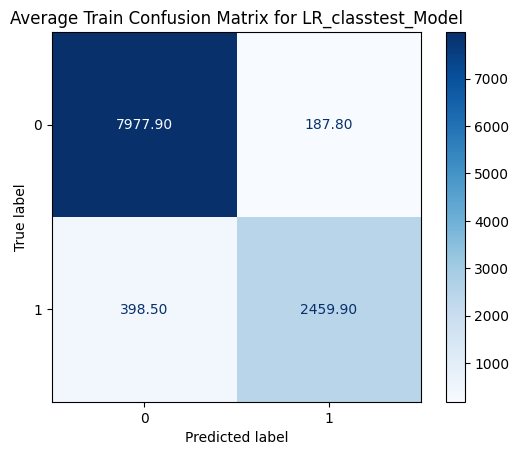

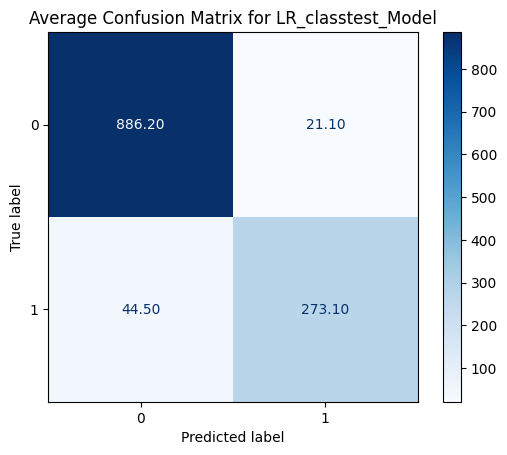

###TRAIN###
CV results for LR_classtest_Model model:Average specificity: 0.97700
Average precision: 0.92907
Average recall: 0.86059
###VAL###
CV results for LR_classtest_Model model:Average specificity: 0.97675
Average precision: 0.92856
Average recall: 0.85989


(0.9767452365109353,
 0.9285648310167043,
 0.8598853242862529,
 {},
 MinMaxScaler(),
 False)

In [238]:
lr_classtest_results_1= ModelWithCV(model_instantiator= LogisticRegression,
                                    model_name= 'LR_classtest_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= MinMaxScaler(),
                                    smote_and_rand_und= False
                                   )

lr_classtest_results_1.plot_avg_conf_matrix()

lr_classtest_results_1.print_cv_summary()

Scaling


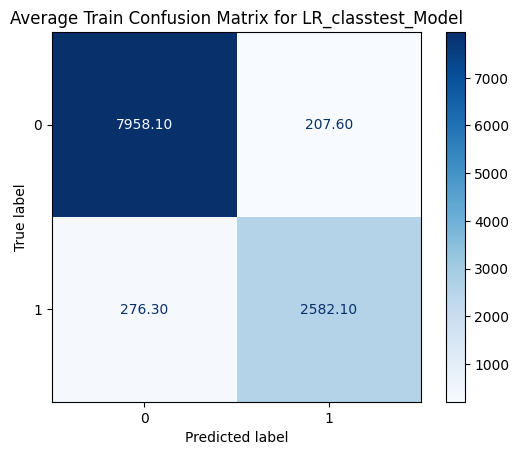

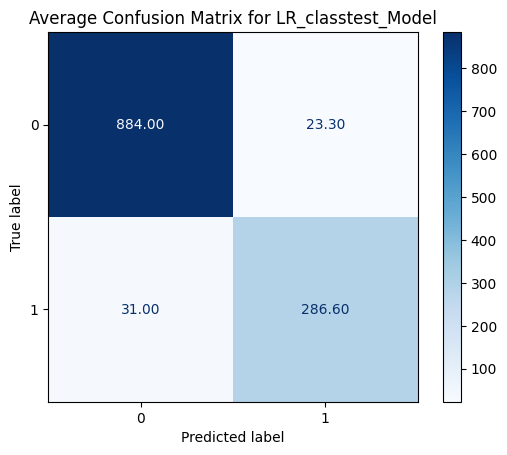

###TRAIN###
CV results for LR_classtest_Model model:Average specificity: 0.97458
Average precision: 0.92558
Average recall: 0.90334
###VAL###
CV results for LR_classtest_Model model:Average specificity: 0.97432
Average precision: 0.92522
Average recall: 0.90239


(0.9743207505014837,
 0.9252213645835589,
 0.902392714719362,
 {},
 StandardScaler(),
 False)

In [203]:
lr_classtest_results_2= ModelWithCV(model_instantiator= LogisticRegression,
                                    model_name= 'LR_classtest_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= StandardScaler(),
                                    smote_and_rand_und= False
                                   )

lr_classtest_results_2.plot_avg_conf_matrix()

lr_classtest_results_2.print_cv_summary()

In [148]:
#instantiate the class
baseline_model_results= ModelWithCV(model_instantiator= LogisticRegression,
                                    model_name= 'Base_LR_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= False,
                                    smote_and_rand_und= False
                                   )

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

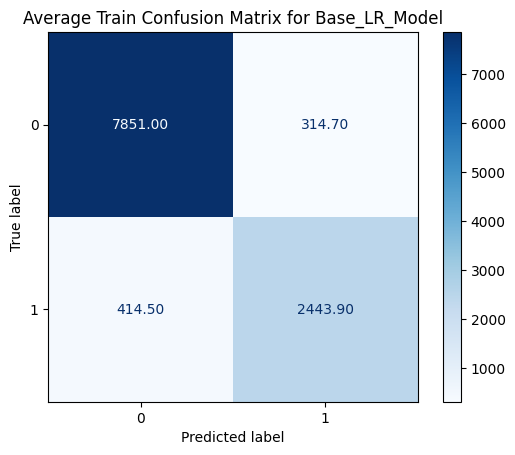

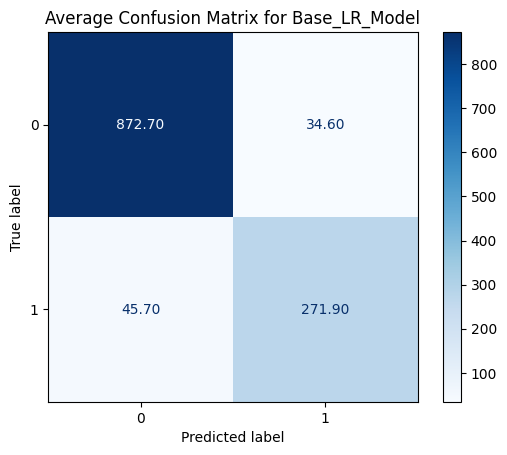

###TRAIN###
CV results for Base_LR_Model model:Average specificity: 0.96146
Average precision: 0.88582
Average recall: 0.85499
###VAL###
CV results for Base_LR_Model model:Average specificity: 0.96187
Average precision: 0.88769
Average recall: 0.85613


In [149]:
baseline_model_results.plot_avg_conf_matrix()

baseline_model_results.print_cv_summary()

In [150]:
#instantiate the class
Scaled_model_results= ModelWithCV(model_instantiator= LogisticRegression,
                                    model_name= 'Base_LR_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= True,
                                    smote_and_rand_und= False
                                   )

Scaling


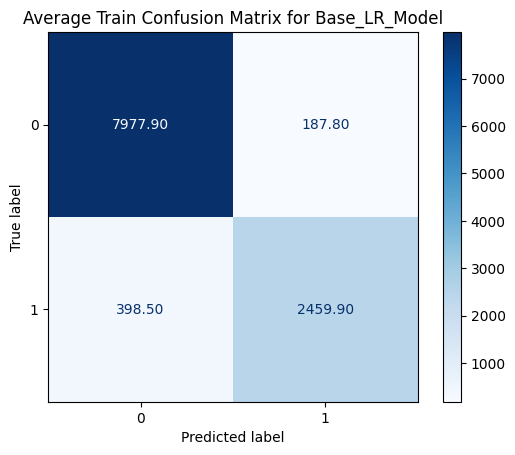

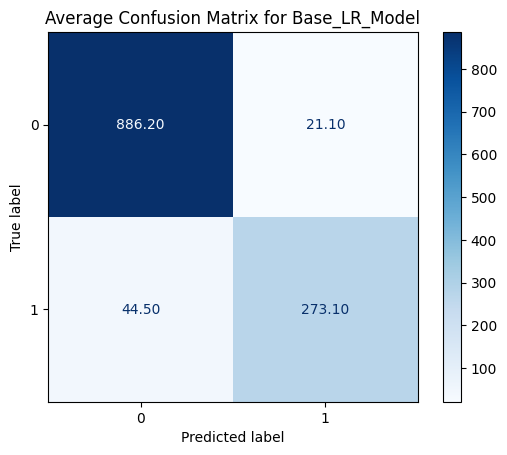

###TRAIN###
CV results for Base_LR_Model model:Average specificity: 0.97700
Average precision: 0.92907
Average recall: 0.86059
###VAL###
CV results for Base_LR_Model model:Average specificity: 0.97675
Average precision: 0.92856
Average recall: 0.85989


In [151]:
Scaled_model_results.plot_avg_conf_matrix()

Scaled_model_results.print_cv_summary()

Scaling
SMOTEing and Randomly Undersampling


/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

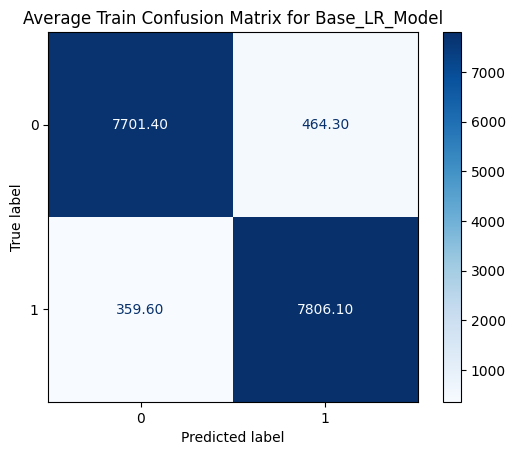

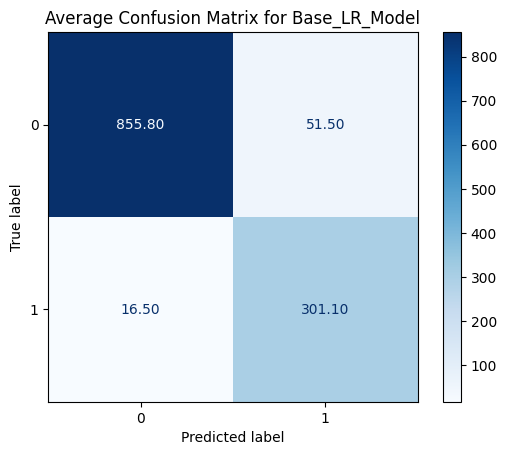

###TRAIN###
CV results for Base_LR_Model model:Average specificity: 0.94314
Average precision: 0.94386
Average recall: 0.95596
###VAL###
CV results for Base_LR_Model model:Average specificity: 0.94324
Average precision: 0.85447
Average recall: 0.94804


In [152]:
#instantiate the class
SMRU_Scaled_model_results= ModelWithCV(model_instantiator= LogisticRegression,
                                    model_name= 'Base_LR_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= True,
                                    smote_and_rand_und= True
                                   )

SMRU_Scaled_model_results.plot_avg_conf_matrix()

SMRU_Scaled_model_results.print_cv_summary()

In [153]:
model_kwargs= {'C': 0.1, 'solver': 'liblinear'} 

Scaling
SMOTEing and Randomly Undersampling


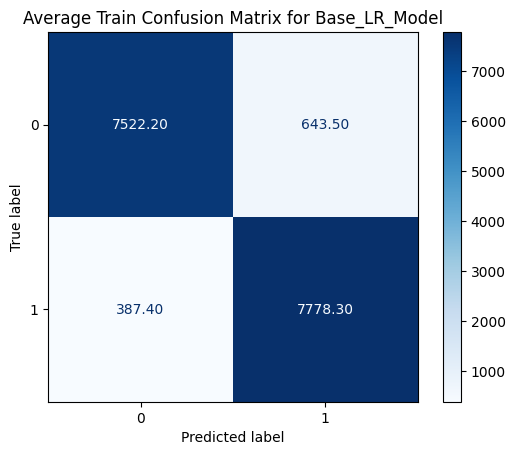

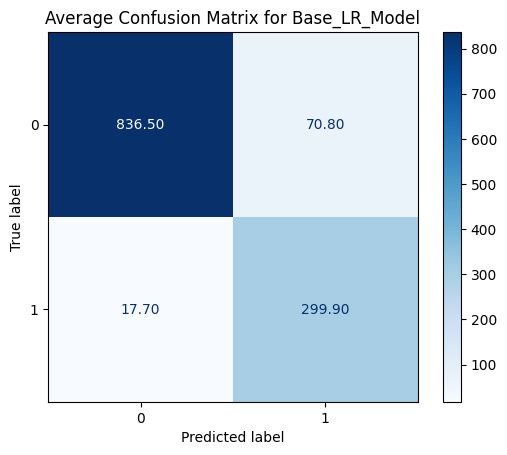

###TRAIN###
CV results for Base_LR_Model model:Average specificity: 0.92119
Average precision: 0.92359
Average recall: 0.95256
###VAL###
CV results for Base_LR_Model model:Average specificity: 0.92197
Average precision: 0.80971
Average recall: 0.94427


In [154]:
#instantiate the class
a_SMRU_Scaled_model_results= ModelWithCV(model_instantiator= LogisticRegression,
                                    model_name= 'Base_LR_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= True,
                                    smote_and_rand_und= True,
                                    model_kwargs= model_kwargs
                                   )

a_SMRU_Scaled_model_results.plot_avg_conf_matrix()

a_SMRU_Scaled_model_results.print_cv_summary()

In [166]:
metric_tracker= []

C= [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000,
                10000000, 100000000, 1000000000]
int_fit= [True, False]
solver = ['liblinear', 'saga', 'lbfgs']
smote= [True, False]
scaler= [True, False]

for fit in int_fit:
    for sm in smote:
        for sc in scaler:        
            for c in C:
                for solver in solvers:
                
                    model_kwargs= {'C': c, 'solver': solver, 'fit_intercept': fit, 'penalty': 'l2' }
                    print(model_kwargs)
                    #instantiate the class
                    temp= ModelWithCV(model_instantiator= LogisticRegression,
                                                        model_name= 'Base_LR_Model',
                                                        X= X_train,
                                                        y= y_train,
                                                        scaler= sc,
                                                        smote_and_rand_und= sm,
                                                        model_kwargs= model_kwargs
                                                       )
                    
                    #temp.plot_avg_conf_matrix()
                    
                    metric_tracker.append(temp.print_cv_summary())
                    
                    print()
                    print('#### NEXT ITERATION###')

{'C': 1, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}
Scaling
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Base_LR_Model model:Average specificity: 0.94299
Average precision: 0.94373
Average recall: 0.95610
###VAL###
CV results for Base_LR_Model model:Average specificity: 0.94258
Average precision: 0.85277
Average recall: 0.94679

#### NEXT ITERATION###
{'C': 1, 'solver': 'saga', 'fit_intercept': True, 'penalty': 'l2'}
Scaling
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Base_LR_Model model:Average specificity: 0.94315
Average precision: 0.94387
Average recall: 0.95601
###VAL###
CV results for Base_LR_Model model:Average specificity: 0.94324
Average precision: 0.85447
Average recall: 0.94804

#### NEXT ITERATION###
{'C': 1, 'solver': 'lbfgs', 'fit_intercept': True, 'penalty': 'l2'}
Scaling
SMOTEing and Randomly Undersampling
###TRAIN###
CV results for Base_LR_Model model:Average specificity: 0.94314
Average precision: 0.94386
Averag

In [26]:
#make a function to normalize the skewed data

#list of columns to transform and the redistribution methods

#columns to log transform
LogT=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
      'EquivDiameter', 'ShapeFactor2']

#columns to Box-Cox transform
BoxCoxT= ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4']

#create a function to transform the columns in a data frame accordingly, or not
def TransShift(df):
    
    Redist= pd.DataFrame()
    
    for col in df.columns:

        if col in LogT:
            Redist[col]= np.log(df[col]+1)
        elif col in BoxCoxT:
            shifted_col = df[col] + 1
            Redist[col], _ = stats.boxcox(shifted_col)
        else:
            Redist[col]= df[col]
    
    return Redist

In [ ]:
X_train

In [25]:
X_train_LogT_and_BoxCox_Trans= TransShift(X_train)
X_train_LogT_and_BoxCox_Trans

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
12871  10.499408   6.580378         5.593584         5.168053      1.533442   
3957   11.029018   6.867313         5.912508         5.374878      1.715259   
3265   11.360893   7.068324         5.987902         5.624852      1.439292   
12077  10.401137   6.527875         5.522817         5.130893      1.482679   
2292   11.024970   6.868448         5.768284         5.506389      1.300611   
...          ...        ...              ...              ...           ...   
10385  10.162461   6.421468         5.456984         4.961142      1.646409   
3473   11.958784   7.332168         6.316812         5.891564      1.531438   
8535   10.683454   6.668877         5.699764         5.239916      1.586946   
899    10.561733   6.574431         5.543276         5.271077      1.314464   
12706  10.476978   6.540737         5.557815         5.172120      1.473320   

       Eccentricity  ConvexArea  EquivDiameter    Extent      Solidity  \
12871      9.600251   10.514936       5.375113  0.730065  7.204047e+72   
3957      12.147499   11.041673       5.638846  0.719475  1.033302e+73   
3265       8.072319   11.381358       5.804242  0.800886  3.881520e+72   
12077      8.794357   10.414813       5.326210  0.786384  9.089457e+72   
2292       5.575463   11.038721       5.636829  0.803789  9.004412e+72   
...             ...         ...            ...       ...           ...   
10385     11.243614   10.176906       5.207484  0.705637  8.253840e+72   
3473       9.569224   11.970281       6.102411  0.793830  1.195225e+73   
8535      10.404099   10.694714       5.466732  0.741956  1.231437e+73   
899        5.836167   10.569546       5.406135  0.773329  1.899765e+73   
12706      8.641177   10.487183       5.363951  0.722711  1.406101e+73   

       roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  \
12871  24.349855     0.803014      0.007376      0.001890      0.644831   
3957   20.411160     0.759940      0.005981      0.001230      0.577508   
3265   15.602406     0.831797      0.004629      0.001366      0.691886   
12077  25.025952     0.820797      0.007580      0.002120      0.673708   
2292   19.917540     0.876433      0.005196      0.001889      0.768134   
...          ...          ...           ...           ...           ...   
10385  22.618720     0.778244      0.009007      0.002036      0.605664   
3473   20.355092     0.806676      0.003539      0.000924      0.650726   
8535   25.019423     0.791430      0.006826      0.001651      0.626361   
899    32.884585     0.871343      0.006589      0.002340      0.759239   
12706  30.633214     0.823087      0.007277      0.002058      0.677473   

        ShapeFactor4  
12871  3.779366e+101  
3957   5.149040e+101  
3265   1.290047e+102  
12077  2.203491e+102  
2292   2.262407e+102  
...              ...  
10385  1.631497e+102  
3473   1.462909e+102  
8535   9.377705e+101  
899    1.883345e+102  
12706  1.930543e+102  

[12249 rows x 16 columns]

In [ ]:

metric_tracker= []

C= [0.1]
int_fit= [True]
solvers = ['liblinear']
smote= [False]
scaler= [False ]
data_sets= [X_train, X_train_LogT_and_BoxCox_Trans]

for data in data_sets:
    for fit in int_fit:
        for sm in smote:
            for sc in scaler:        
                for c in C:
                    for solver in solvers:
                        model_kwargs= {'C': c, 'solver': solver, 'fit_intercept': fit, 'penalty': 'l2' }
                        print(model_kwargs)
                        #instantiate the class
                        temp= ModelWithCV(model_instantiator= LogisticRegression,
                                                            model_name= 'Base_LR_Model',
                                                            X= data,
                                                            y= y_train,
                                                            scaler= sc,
                                                            smote_and_rand_und= sm,
                                                            model_kwargs= model_kwargs
                                                           )
                        
                        #temp.plot_avg_conf_matrix()
                        
                        metric_tracker.append((temp.print_cv_summary(), data))
                        print()
                        print('#### NEXT ITERATION###')

{'C': 0.1, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}
###TRAIN###
CV results for Base_LR_Model model:Average specificity: 0.95602
Average precision: 0.86792
Average recall: 0.82522
###VAL###
CV results for Base_LR_Model model:Average specificity: 0.95404
Average precision: 0.86334
Average recall: 0.82431

#### NEXT ITERATION###
{'C': 0.1, 'solver': 'liblinear', 'fit_intercept': True, 'penalty': 'l2'}


In [164]:
pd.DataFrame(metric_tracker)

0         1         2                                  3     4     5
0  0.942580  0.852775  0.946786    {'C': 1, 'solver': 'liblinear'}  True  True
1  0.943241  0.854465  0.948044         {'C': 1, 'solver': 'saga'}  True  True
2  0.943241  0.854465  0.948044        {'C': 1, 'solver': 'lbfgs'}  True  True
3  0.948973  0.867942  0.954026   {'C': 10, 'solver': 'liblinear'}  True  True
4  0.948752  0.867398  0.953396        {'C': 10, 'solver': 'saga'}  True  True
5  0.948862  0.867589  0.953082       {'C': 10, 'solver': 'lbfgs'}  True  True
6  0.951286  0.873453  0.956863  {'C': 100, 'solver': 'liblinear'}  True  True
7  0.951617  0.874254  0.957179       {'C': 100, 'solver': 'saga'}  True  True
8  0.951507  0.873899  0.956233      {'C': 100, 'solver': 'lbfgs'}  True  True

In [170]:
lr_val_grid_search= pd.DataFrame(metric_tracker)

lr_new_col_names= ['v_avg_spec', 'v_avg_prec', 'v_avg_rec', 'v_hyp_para', 'v_MM_scaled', 'v_SM_RU']

lr_val_grid_search.columns= lr_new_col_names

lr_val_grid_search.head()

v_avg_spec  v_avg_prec  v_avg_rec  \
0    0.942580    0.852775   0.946786   
1    0.943241    0.854465   0.948044   
2    0.943241    0.854465   0.948044   
3    0.948973    0.867942   0.954026   
4    0.948752    0.867398   0.953396   

                                          v_hyp_para  v_MM_scaled  v_SM_RU  
0  {'C': 1, 'solver': 'liblinear', 'fit_intercept...         True     True  
1  {'C': 1, 'solver': 'saga', 'fit_intercept': Tr...         True     True  
2  {'C': 1, 'solver': 'lbfgs', 'fit_intercept': T...         True     True  
3  {'C': 10, 'solver': 'liblinear', 'fit_intercep...         True     True  
4  {'C': 10, 'solver': 'saga', 'fit_intercept': T...         True     True

In [176]:
lr_val_grid_search_SpecPrec_sorted = lr_val_grid_search.sort_values(\
    by=['v_avg_spec', 'v_avg_prec', 'v_avg_rec'], ascending=[False, False, False])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

lr_val_grid_search_SpecPrec_sorted

v_avg_spec  v_avg_prec  v_avg_rec  \
31     1.000000    0.900000   0.004410   
34     1.000000    0.900000   0.004410   
37     1.000000    0.900000   0.004410   
40     1.000000    0.900000   0.004410   
43     1.000000    0.900000   0.004410   
46     1.000000    0.900000   0.004410   
49     1.000000    0.900000   0.004410   
52     1.000000    0.900000   0.004410   
55     1.000000    0.900000   0.004410   
58     1.000000    0.900000   0.004410   
151    1.000000    0.900000   0.004410   
154    1.000000    0.900000   0.004410   
157    1.000000    0.900000   0.004410   
160    1.000000    0.900000   0.004410   
163    1.000000    0.900000   0.004410   
166    1.000000    0.900000   0.004410   
169    1.000000    0.900000   0.004410   
172    1.000000    0.900000   0.004410   
175    1.000000    0.900000   0.004410   
178    1.000000    0.900000   0.004410   
91     1.000000    0.000000   0.000000   
94     1.000000    0.000000   0.000000   
97     1.000000    0.000000   0.000000   
100    1.000000    0.000000   0.000000   
103    1.000000    0.000000   0.000000   
106    1.000000    0.000000   0.000000   
109    1.000000    0.000000   0.000000   
112    1.000000    0.000000   0.000000   
115    1.000000    0.000000   0.000000   
118    1.000000    0.000000   0.000000   
211    1.000000    0.000000   0.000000   
214    1.000000    0.000000   0.000000   
217    1.000000    0.000000   0.000000   
220    1.000000    0.000000   0.000000   
223    1.000000    0.000000   0.000000   
226    1.000000    0.000000   0.000000   
229    1.000000    0.000000   0.000000   
232    1.000000    0.000000   0.000000   
235    1.000000    0.000000   0.000000   
238    1.000000    0.000000   0.000000   
180    0.976966    0.929386   0.861462   
181    0.976966    0.929386   0.861462   
182    0.976855    0.929061   0.861462   
60     0.976855    0.928979   0.860518   
61     0.976745    0.928565   0.859885   
62     0.976745    0.928565   0.859885   
183    0.974981    0.926172   0.891997   
184    0.974981    0.926172   0.891997   
185    0.974981    0.926172   0.891997   
63     0.974871    0.925788   0.891682   
64     0.974871    0.925762   0.891053   
65     0.974761    0.925419   0.890739   
67     0.974431    0.925626   0.903339   
74     0.974431    0.925759   0.907116   
83     0.974431    0.925747   0.907117   
86     0.974321    0.925469   0.907431   
203    0.974321    0.925440   0.906801   
197    0.974321    0.925518   0.908060   
194    0.974210    0.925186   0.907430   
89     0.974210    0.925101   0.906487   
187    0.974210    0.925048   0.903968   
80     0.974210    0.925122   0.906800   
69     0.974100    0.924870   0.907116   
209    0.974100    0.924841   0.907116   
195    0.973990    0.924603   0.907430   
198    0.973990    0.924603   0.907430   
201    0.973990    0.924603   0.907430   
204    0.973990    0.924603   0.907430   
207    0.973990    0.924603   0.907430   
191    0.973990    0.924623   0.907746   
189    0.973990    0.924609   0.907430   
190    0.973990    0.924408   0.903969   
193    0.973990    0.924408   0.903969   
196    0.973990    0.924408   0.903969   
199    0.973990    0.924408   0.903969   
202    0.973990    0.924408   0.903969   
205    0.973990    0.924408   0.903969   
208    0.973990    0.924408   0.903969   
66     0.973990    0.924325   0.903336   
186    0.973990    0.924325   0.903336   
68     0.973990    0.924316   0.902706   
77     0.973990    0.924516   0.906170   
84     0.973990    0.924624   0.907431   
87     0.973990    0.924607   0.907116   
78     0.973990    0.924595   0.907116   
200    0.973990    0.924586   0.907116   
71     0.973990    0.924574   0.906486   
81     0.973990    0.924569   0.906801   
188    0.973990    0.924354   0.903652   
206    0.973990    0.924607   0.908061   
192    0.973880    0.924300   0.907430   
72     0.973880    0.924311   0.907116   
70     0.973880    0.924165   0.904283   
73     0.973880    0.924165   0.904283   
76     0.973880

Best validation tune for specificity:

Scaled using MinMaxScaler= True
SMOTEd and Randomly Undersampled
C= 1
solver= 'liblinear'
fit_intercept= False
pentaly= 'l2'

Specificity= 0.976966
Precision= 0.929386
recall= 0.861462

In [177]:
lr_val_grid_search_PrecSpec_sorted = lr_val_grid_search.sort_values(\
    by=['v_avg_prec', 'v_avg_spec', 'v_avg_rec'], ascending=[False, False, False])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

lr_val_grid_search_PrecSpec_sorted

v_avg_spec  v_avg_prec  v_avg_rec  \
180    0.976966    0.929386   0.861462   
181    0.976966    0.929386   0.861462   
182    0.976855    0.929061   0.861462   
60     0.976855    0.928979   0.860518   
61     0.976745    0.928565   0.859885   
62     0.976745    0.928565   0.859885   
183    0.974981    0.926172   0.891997   
184    0.974981    0.926172   0.891997   
185    0.974981    0.926172   0.891997   
63     0.974871    0.925788   0.891682   
64     0.974871    0.925762   0.891053   
74     0.974431    0.925759   0.907116   
83     0.974431    0.925747   0.907117   
67     0.974431    0.925626   0.903339   
197    0.974321    0.925518   0.908060   
86     0.974321    0.925469   0.907431   
203    0.974321    0.925440   0.906801   
65     0.974761    0.925419   0.890739   
194    0.974210    0.925186   0.907430   
80     0.974210    0.925122   0.906800   
89     0.974210    0.925101   0.906487   
187    0.974210    0.925048   0.903968   
69     0.974100    0.924870   0.907116   
209    0.974100    0.924841   0.907116   
84     0.973990    0.924624   0.907431   
191    0.973990    0.924623   0.907746   
189    0.973990    0.924609   0.907430   
87     0.973990    0.924607   0.907116   
206    0.973990    0.924607   0.908061   
195    0.973990    0.924603   0.907430   
198    0.973990    0.924603   0.907430   
201    0.973990    0.924603   0.907430   
204    0.973990    0.924603   0.907430   
207    0.973990    0.924603   0.907430   
78     0.973990    0.924595   0.907116   
200    0.973990    0.924586   0.907116   
71     0.973990    0.924574   0.906486   
81     0.973990    0.924569   0.906801   
77     0.973990    0.924516   0.906170   
190    0.973990    0.924408   0.903969   
193    0.973990    0.924408   0.903969   
196    0.973990    0.924408   0.903969   
199    0.973990    0.924408   0.903969   
202    0.973990    0.924408   0.903969   
205    0.973990    0.924408   0.903969   
208    0.973990    0.924408   0.903969   
188    0.973990    0.924354   0.903652   
66     0.973990    0.924325   0.903336   
186    0.973990    0.924325   0.903336   
68     0.973990    0.924316   0.902706   
72     0.973880    0.924311   0.907116   
192    0.973880    0.924300   0.907430   
75     0.973880    0.924296   0.907116   
70     0.973880    0.924165   0.904283   
73     0.973880    0.924165   0.904283   
76     0.973880    0.924165   0.904283   
79     0.973880    0.924165   0.904283   
82     0.973880    0.924165   0.904283   
85     0.973880    0.924165   0.904283   
88     0.973880    0.924165   0.904283   
31     1.000000    0.900000   0.004410   
34     1.000000    0.900000   0.004410   
37     1.000000    0.900000   0.004410   
40     1.000000    0.900000   0.004410   
43     1.000000    0.900000   0.004410   
46     1.000000    0.900000   0.004410   
49     1.000000    0.900000   0.004410   
52     1.000000    0.900000   0.004410   
55     1.000000    0.900000   0.004410   
58     1.000000    0.900000   0.004410   
151    1.000000    0.900000   0.004410   
154    1.000000    0.900000   0.004410   
157    1.000000    0.900000   0.004410   
160    1.000000    0.900000   0.004410   
163    1.000000    0.900000   0.004410   
166    1.000000    0.900000   0.004410   
169    1.000000    0.900000   0.004410   
172    1.000000    0.900000   0.004410   
175    1.000000    0.900000   0.004410   
178    1.000000    0.900000   0.004410   
227    0.962968    0.890428   0.853293   
95     0.962416    0.888615   0.853912   
101    0.961975    0.887731   0.855156   
110    0.962305    0.887708   0.848247   
92     0.961866    0.887694   0.856129   
215    0.961864    0.887491   0.857081   
233    0.961535    0.886767   0.856120   
239    0.961204    0.885706   0.853604   
224    0.960983    0.884666   0.850455   
104    0.960984    0.884527   0.850436   
98     0.960874    0.884394   0.851068   
107    0.961094    0.884288   0.845721   
113    0.960874    0.883963   0.846035   
230    0.960653    0.883701   0.849824   
116    0.960653

Same as the above 

Best validation tune for precision:

Scaled using MinMaxScaler= True

SMOTEd and Randomly Undersampled= False

C= 1

solver= 'liblinear'

fit_intercept= False

pentaly= 'l2'


Specificity= 0.976966
Precision= 0.929386
recall= 0.861462

In [16]:
#instantiate the class
baseline_model_results= ModelWithCV(model= lr1,
                                    model_name= 'Base_LR_Model',
                                    X= X_train,
                                    y= y_train)

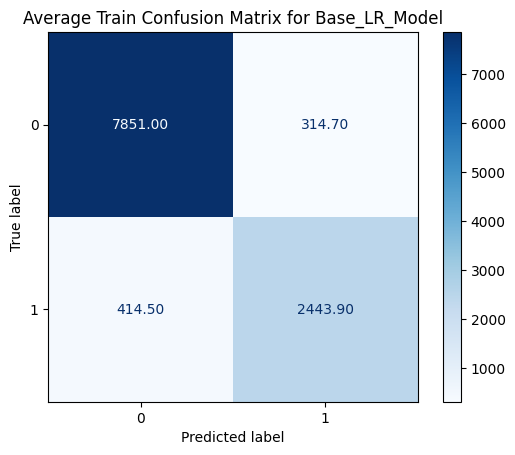

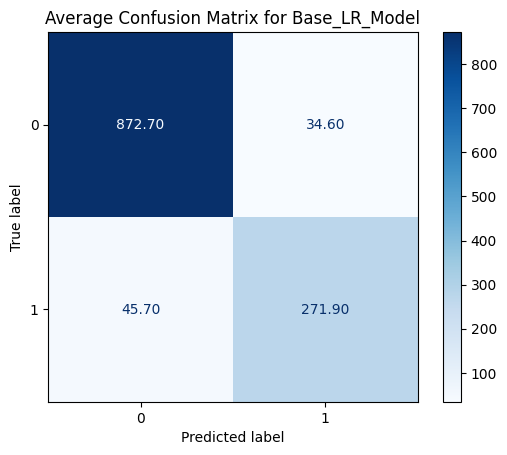

###TRAIN###
CV results for Base_LR_Model model:Average specificity: 0.96146
Average precision: 0.88582
Average recall: 0.85499
###VAL###
CV results for Base_LR_Model model:Average specificity: 0.96187
Average precision: 0.88769
Average recall: 0.85613


In [136]:
#plot the results
#fig, ax= plt.subplots()

#ax1= baseline_model_results.plot_cv(ax)
#plt.tight_layout()

ax2= baseline_model_results.plot_avg_conf_matrix()

baseline_model_results.print_cv_summary()

# Second Model Iteration Base Standardized

## standardize the training data

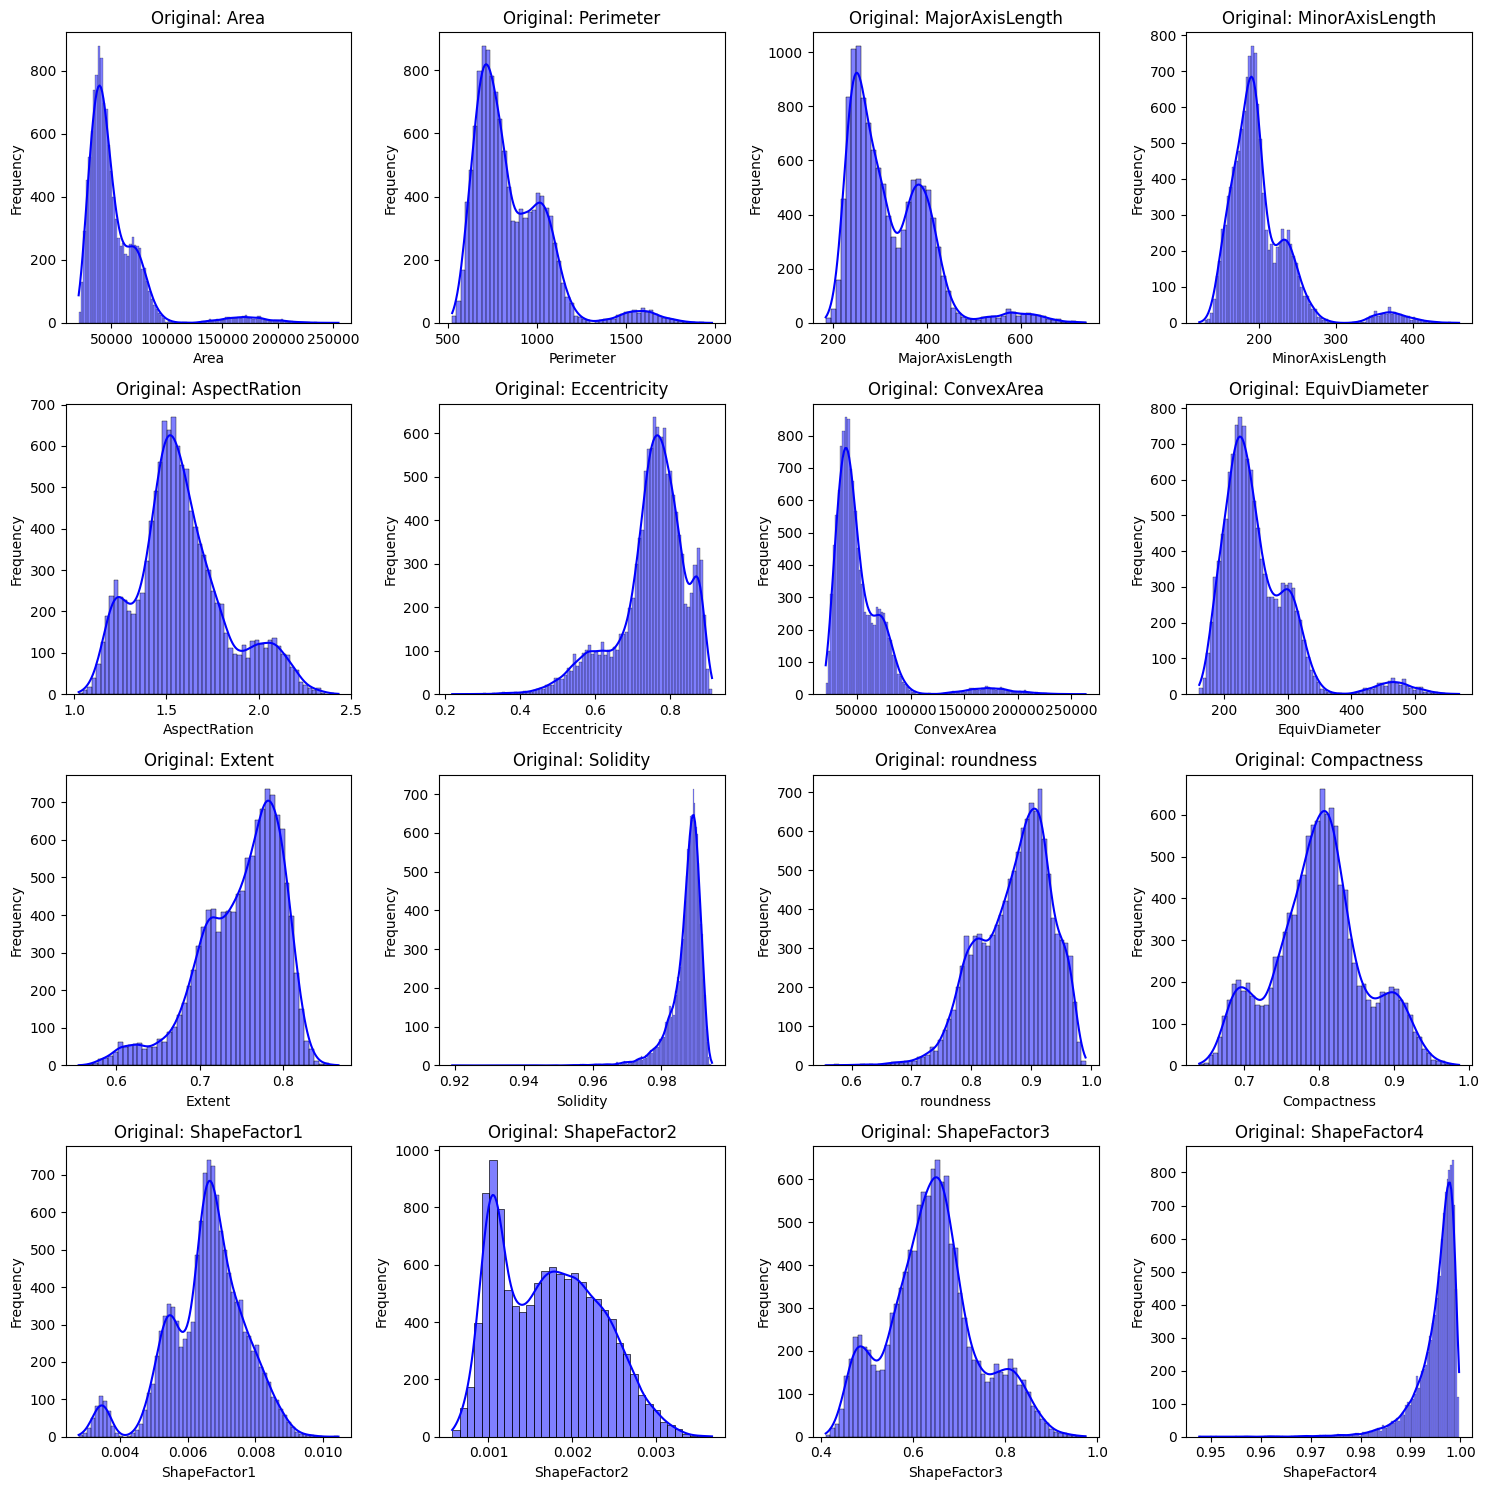

In [18]:
#check out the data distrobutions
#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
#make a function to standardize all the data
def Scale_It(df):
    #initialize the scaler
    scaler = StandardScaler()
    #fit the scaler and transform the data
    scaled_data = scaler.fit_transform(df)
    #turn the scaled data back into a dataframe
    df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

    return df_scaled

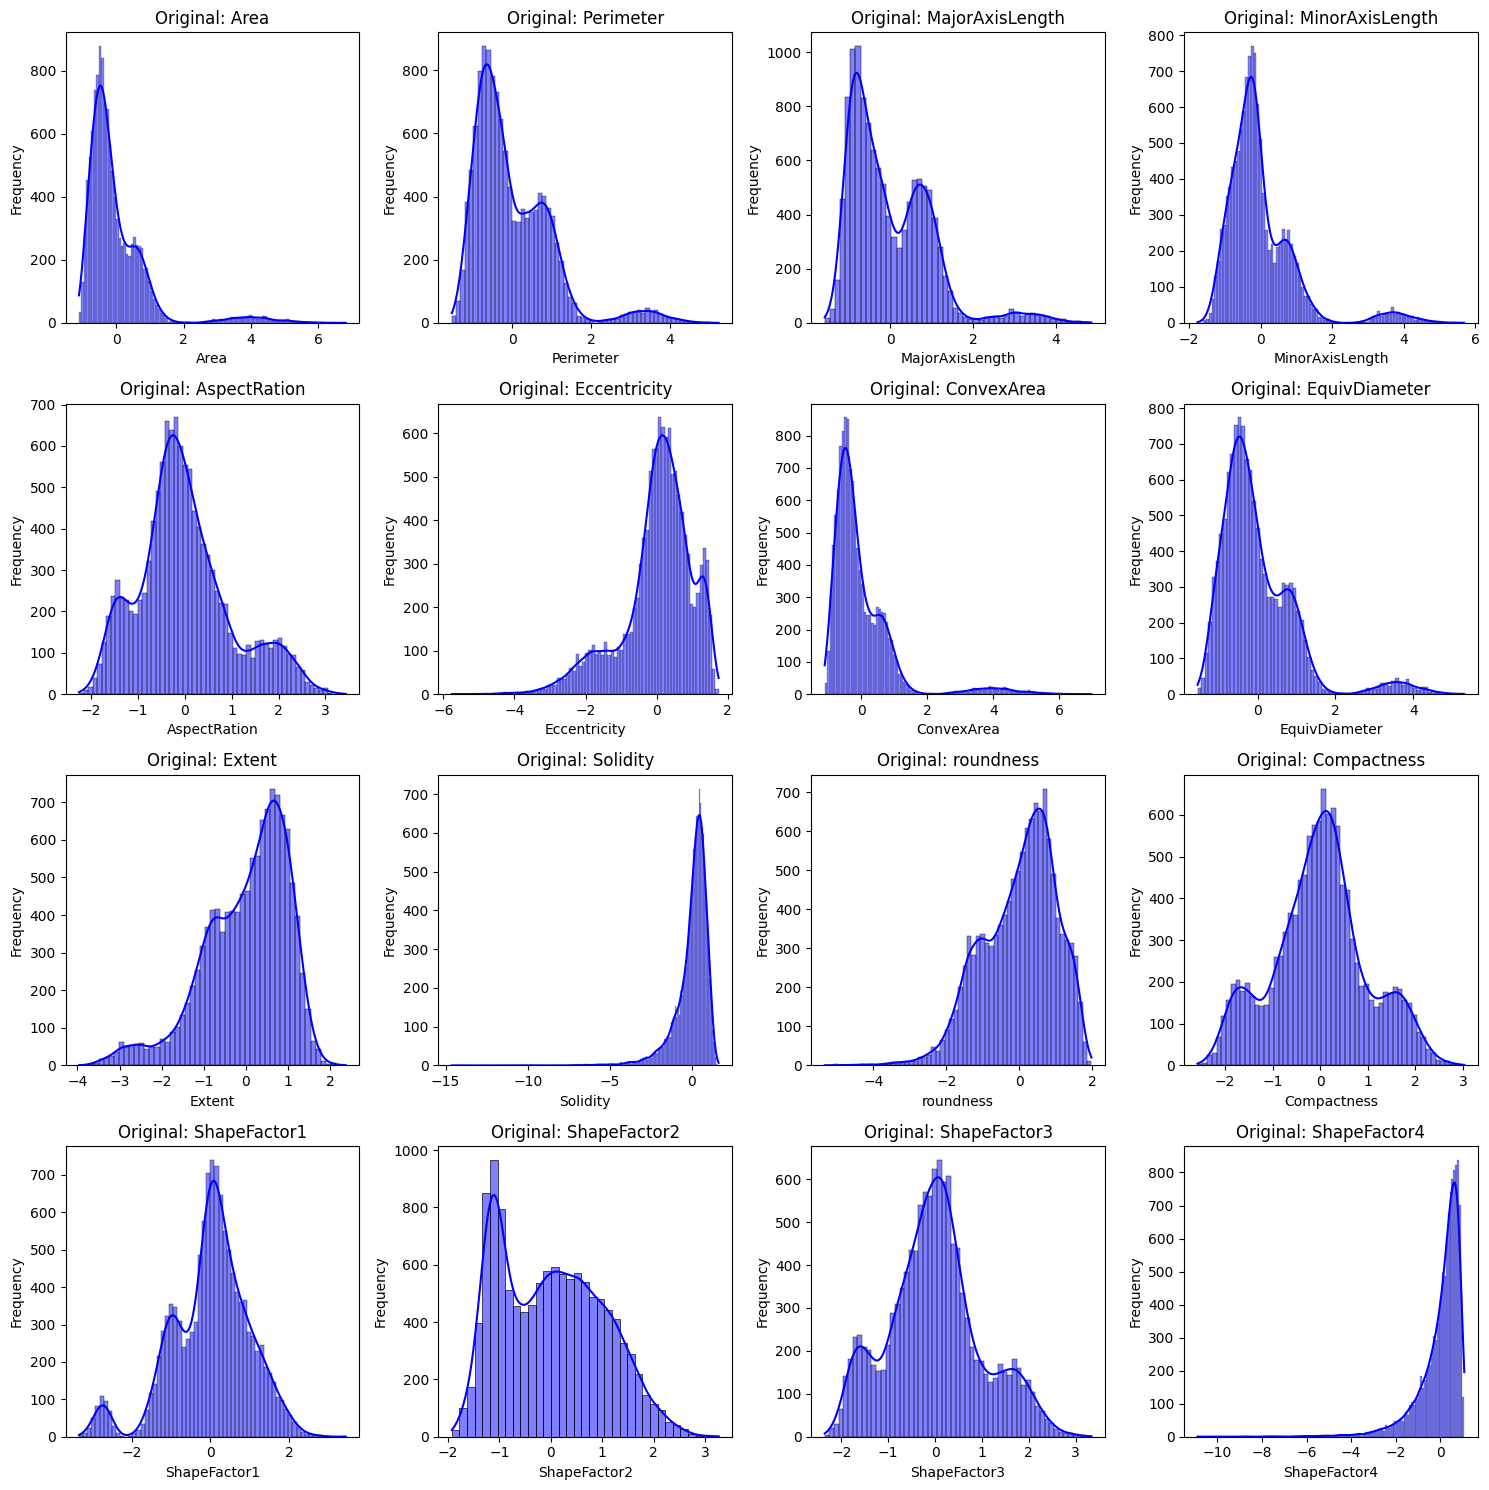

In [20]:
#scale the training data
#plot the new standardized data to check it out
X_train_Scaled= Scale_It(X_train)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_Scaled.columns):
    sns.histplot(X_train_Scaled[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## build the standardized model and evaluate

In [138]:
#instantiate the class
stand_model_results= ModelWithCV(model_instantiator= LogisticRegression,
                                    model_name= 'Standardized_LR_Model',
                                    X= X_train_Scaled,
                                    y= y_train)

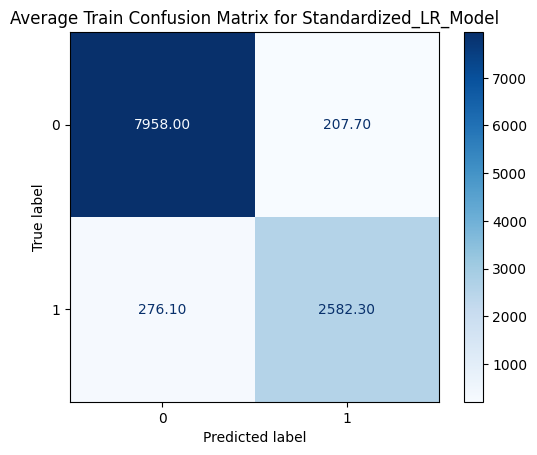

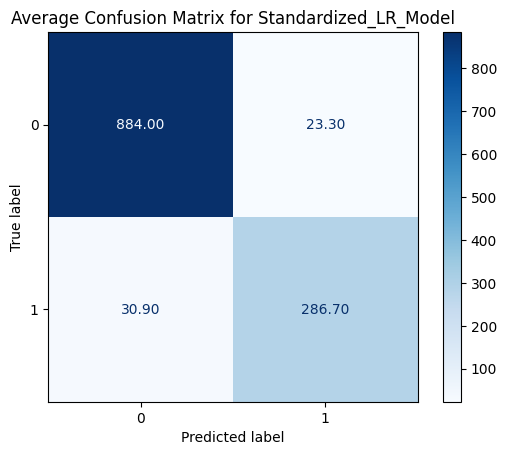

###TRAIN###
CV results for Standardized_LR_Model model:Average specificity: 0.97456
Average precision: 0.92556
Average recall: 0.90341
###VAL###
CV results for Standardized_LR_Model model:Average specificity: 0.97432
Average precision: 0.92525
Average recall: 0.90271


In [139]:
stand_model_results.plot_avg_conf_matrix()

stand_model_results.print_cv_summary()

In [21]:
#lr_stand is the standardized model
#initialize the model
lr_stand = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
#fit the model
lr_stand.fit(X_train_Scaled, y_train)
#make predictions with the model
y_pred_lr_stand= lr_stand.predict(X_train_Scaled)

#compare the classification report to the previous model
print('Base model classification report:')
print(classification_report(y_train, y_pred_lr1))
print()
print('Standardized model classification report:')
print(classification_report(y_train, y_pred_lr_stand))

Base model classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9073
           1       0.87      0.83      0.85      3176

    accuracy                           0.92     12249
   macro avg       0.91      0.89      0.90     12249
weighted avg       0.92      0.92      0.92     12249


Standardized model classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9073
           1       0.84      0.95      0.89      3176

    accuracy                           0.94     12249
   macro avg       0.91      0.94      0.93     12249
weighted avg       0.95      0.94      0.94     12249



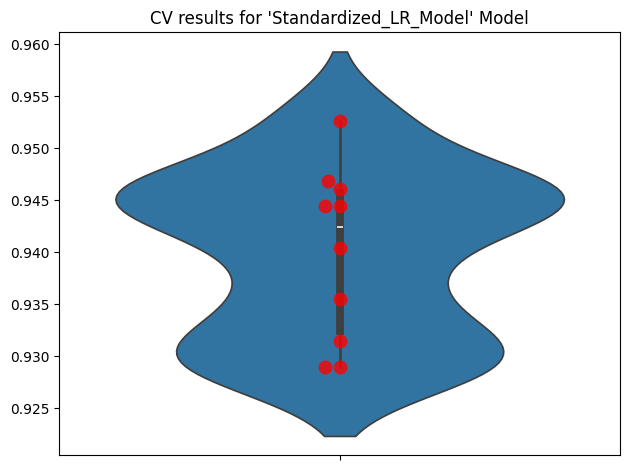

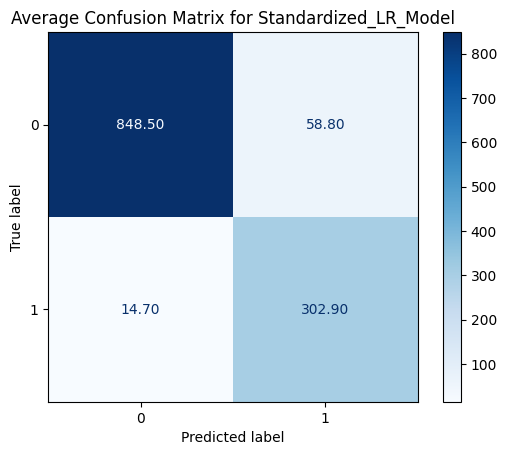

CV results for Base_LR_Model model: 0.92154 +- 0.00496 accuracy
Average specificity: 0.95580
Average precision: 0.86754
Average recall: 0.82368
CV results for Standardized_LR_Model model: 0.94000 +- 0.00789 accuracy
Average specificity: 0.93519
Average precision: 0.83792
Average recall: 0.95371


In [22]:
#instantiate the class
Stanrdardized_model_results= ModelWithCV(model= lr_stand,
                                    model_name= 'Standardized_LR_Model',
                                    X= X_train_Scaled,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= Stanrdardized_model_results.plot_cv(ax)
plt.tight_layout()

ax2= Stanrdardized_model_results.plot_avg_conf_matrix()

baseline_model_results.print_cv_summary()
Stanrdardized_model_results.print_cv_summary()

Mixed bag between improvement and not, accuracy and recal went up but precision and specificity went down. Lets see if normalization helps

# Third Model Iteration normalize the data then standardize it 

## normalize the data

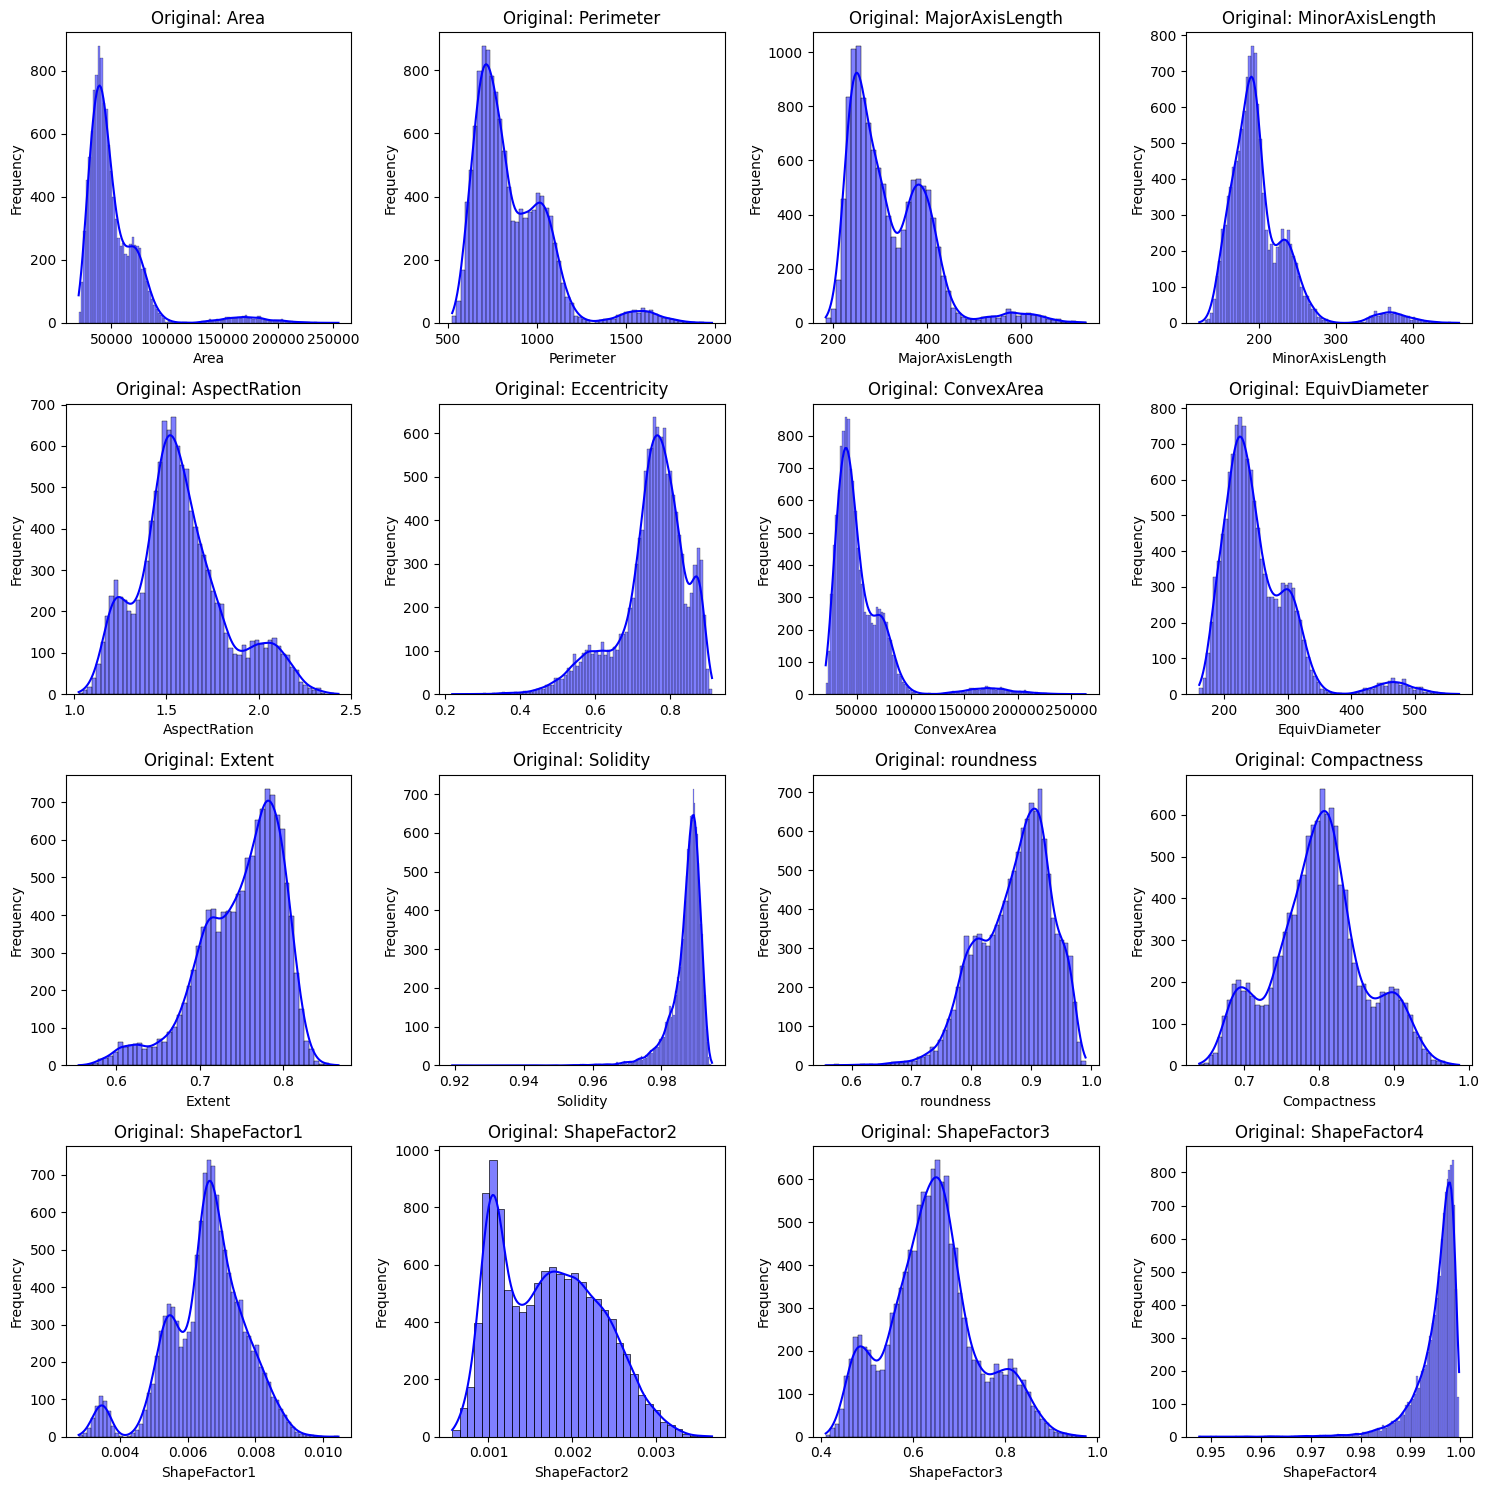

In [23]:
#check out the data distrobutions
#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
#make a function to normalize the skewed data

#list of columns to transform and the redistribution methods

#columns to log transform
LogT=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
      'EquivDiameter', 'ShapeFactor2']

#columns to Box-Cox transform
BoxCoxT= ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4']

#create a function to transform the columns in a data frame accordingly, or not
def TransShift(df):
    
    Redist= pd.DataFrame()
    
    for col in df.columns:

        if col in LogT:
            Redist[col]= np.log(df[col])
        elif col in BoxCoxT:
            shifted_col = df[col] + 1
            Redist[col], _ = stats.boxcox(shifted_col)
        else:
            Redist[col]= df[col]
    
    return Redist

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


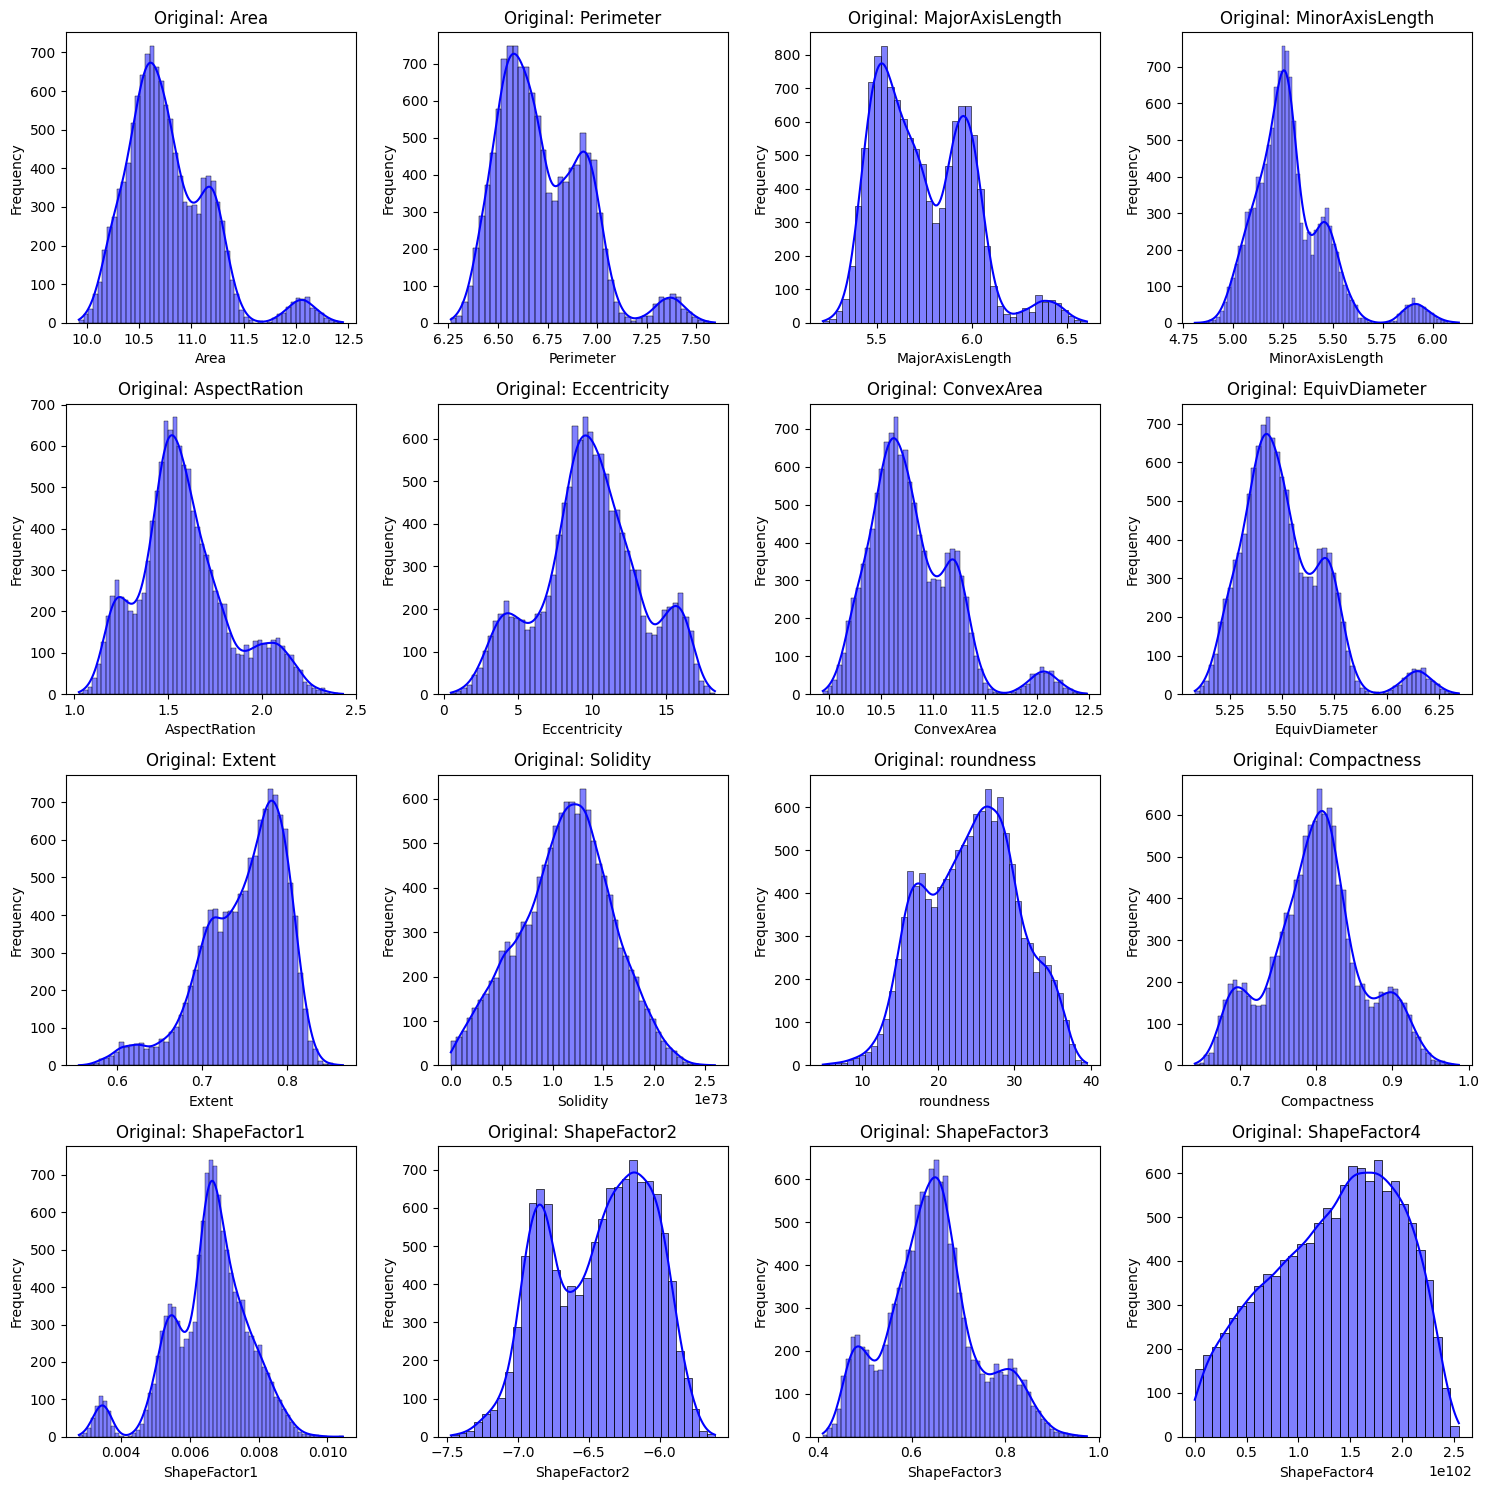

In [119]:
#normalize the training data
#plot the new normalized data distribution to check it out
X_train_Norm= TransShift(X_train)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_Norm.columns):
    sns.histplot(X_train_Norm[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Standardize the data

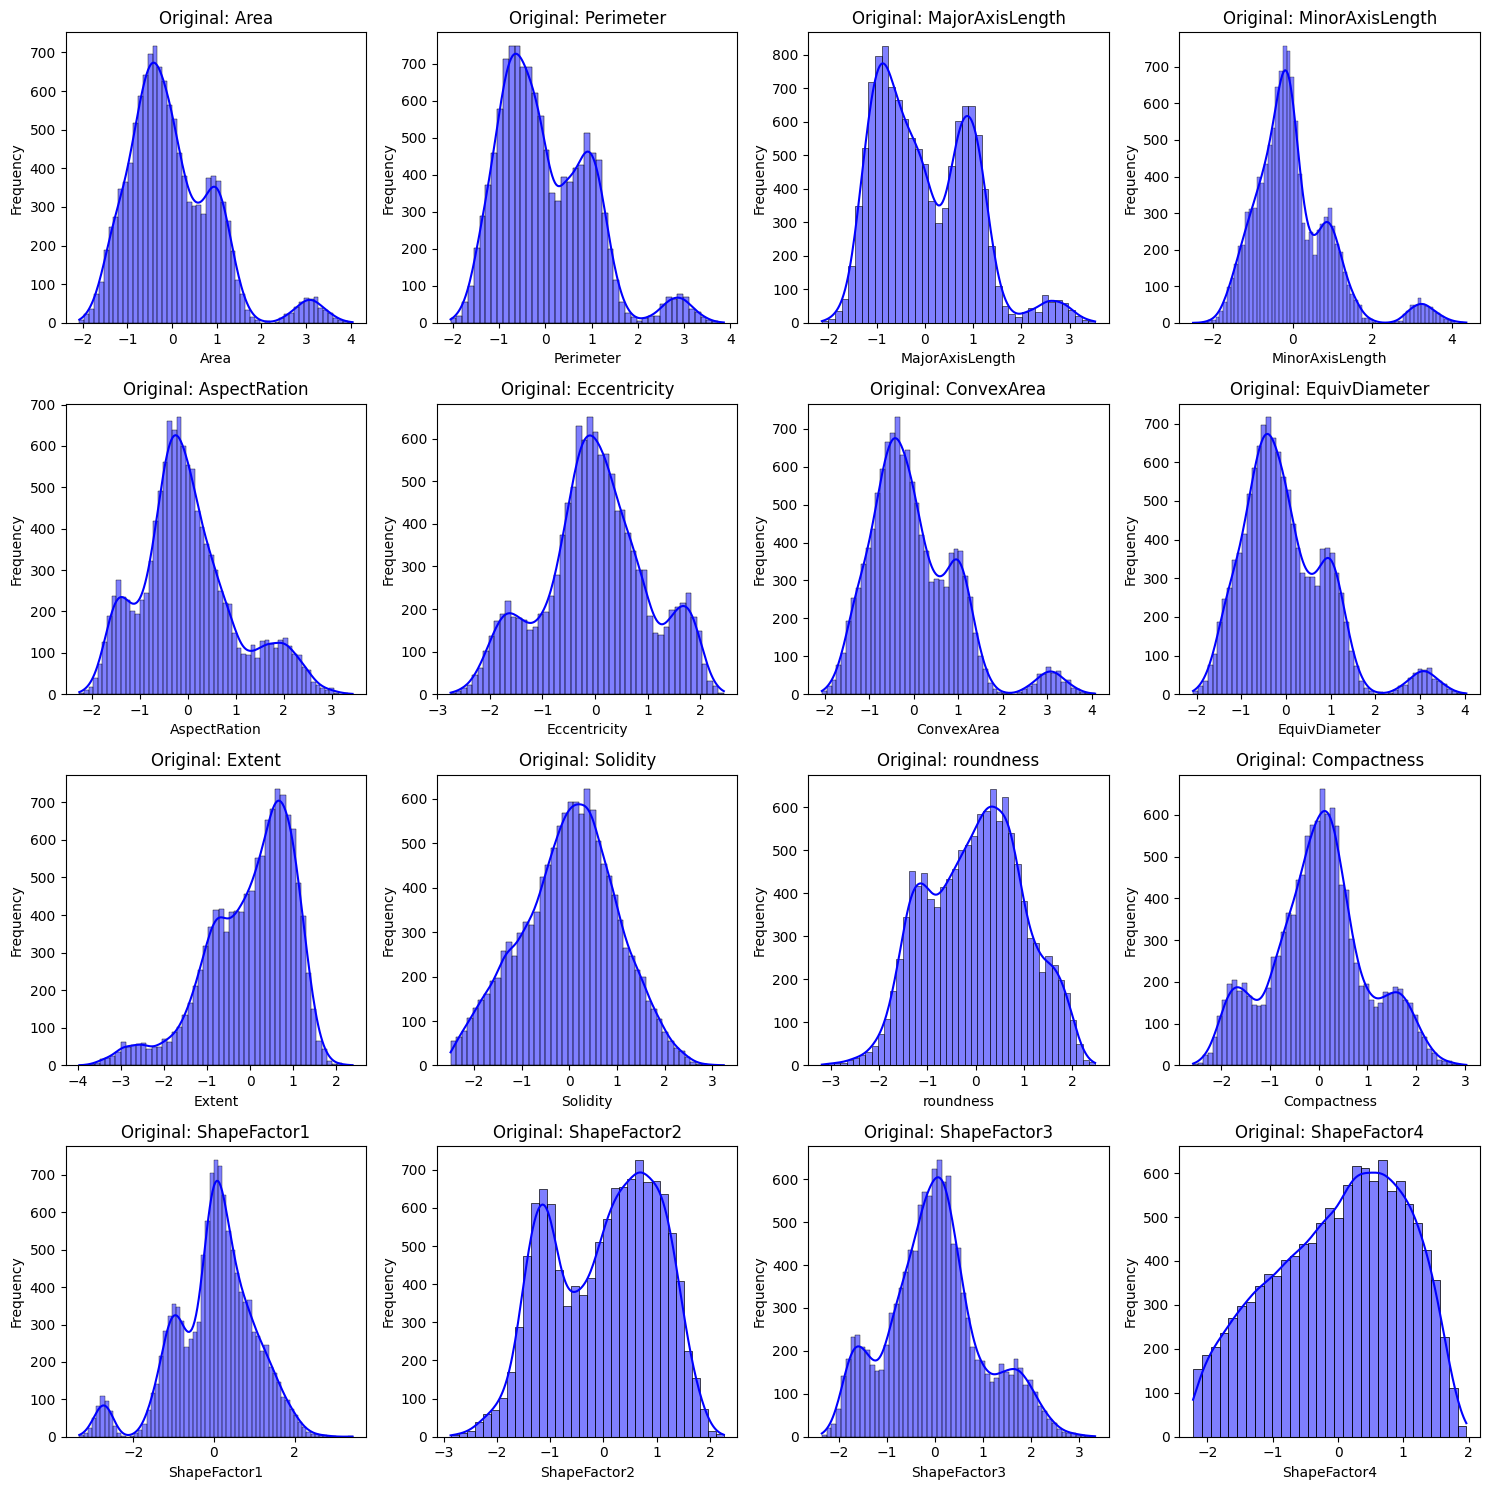

In [121]:
#scale the training data
#plot the new standardized data to check it out
X_train_Norm_Scaled= Scale_It(X_train_Norm)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_Norm_Scaled.columns):
    sns.histplot(X_train_Norm_Scaled[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## build the normalized scaled model and evaluate

In [27]:
#lr_stand is the standardized model
#initialize the model
lr_norm_scaled = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
#fit the model
lr_norm_scaled.fit(X_train_Norm_Scaled, y_train)
#make predictions with the model
y_pred_lr_norm_scaled= lr_norm_scaled.predict(X_train_Norm_Scaled)

#compare the classification report to the previous models
print('Base model classification report:')
print(classification_report(y_train, y_pred_lr1))
print()
print('Standardized model classification report:')
print(classification_report(y_train, y_pred_lr_stand))
print()
print('Normalized and Standardized model classification report:')
print(classification_report(y_train, y_pred_lr_norm_scaled))

Base model classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9073
           1       0.87      0.83      0.85      3176

    accuracy                           0.92     12249
   macro avg       0.91      0.89      0.90     12249
weighted avg       0.92      0.92      0.92     12249


Standardized model classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9073
           1       0.84      0.95      0.89      3176

    accuracy                           0.94     12249
   macro avg       0.91      0.94      0.93     12249
weighted avg       0.95      0.94      0.94     12249


Normalized and Standardized model classification report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      9073
           1       0.64      0.99      0.78      3176

    accuracy                           0.86    

I believe this is hurting the model

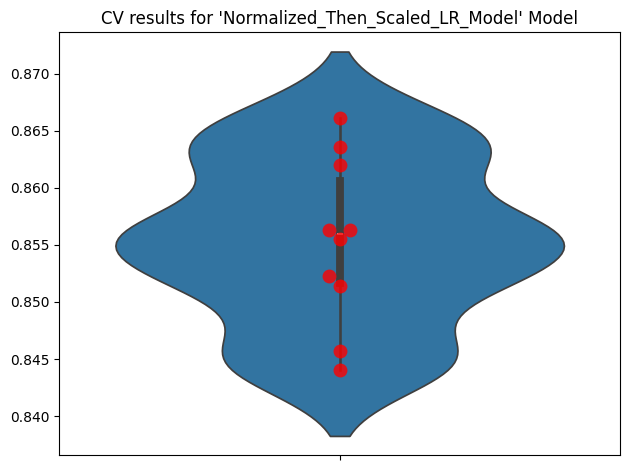

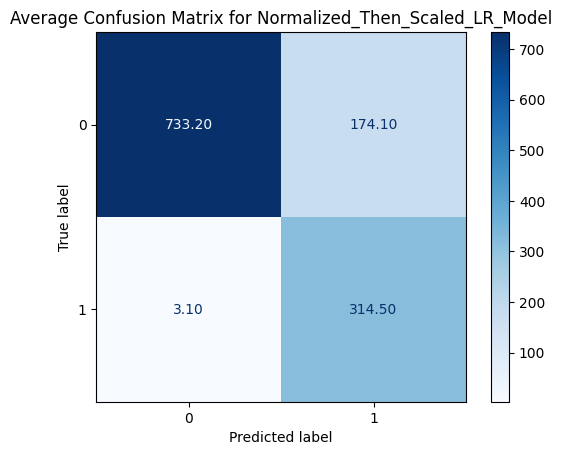

CV results for Base_LR_Model model: 0.92154 +- 0.00496 accuracy
Average specificity: 0.95580
Average precision: 0.86754
Average recall: 0.82368
CV results for Standardized_LR_Model model: 0.94000 +- 0.00789 accuracy
Average specificity: 0.93519
Average precision: 0.83792
Average recall: 0.95371
CV results for Normalized_Then_Scaled_LR_Model model: 0.85534 +- 0.00689 accuracy
Average specificity: 0.80811
Average precision: 0.64380
Average recall: 0.99024


In [28]:
#instantiate the class
Norm_Scaled_model_results= ModelWithCV(model= lr_norm_scaled,
                                    model_name= 'Normalized_Then_Scaled_LR_Model',
                                    X= X_train_Norm_Scaled,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= Norm_Scaled_model_results.plot_cv(ax)
plt.tight_layout()

ax2= Norm_Scaled_model_results.plot_avg_conf_matrix()

baseline_model_results.print_cv_summary()
Stanrdardized_model_results.print_cv_summary()
Norm_Scaled_model_results.print_cv_summary()

All Went down except for recal which went up. A lot of beans that aren't really dermason beans are being categorized as them. 

# Fourth Model using min max scaler on Base model 

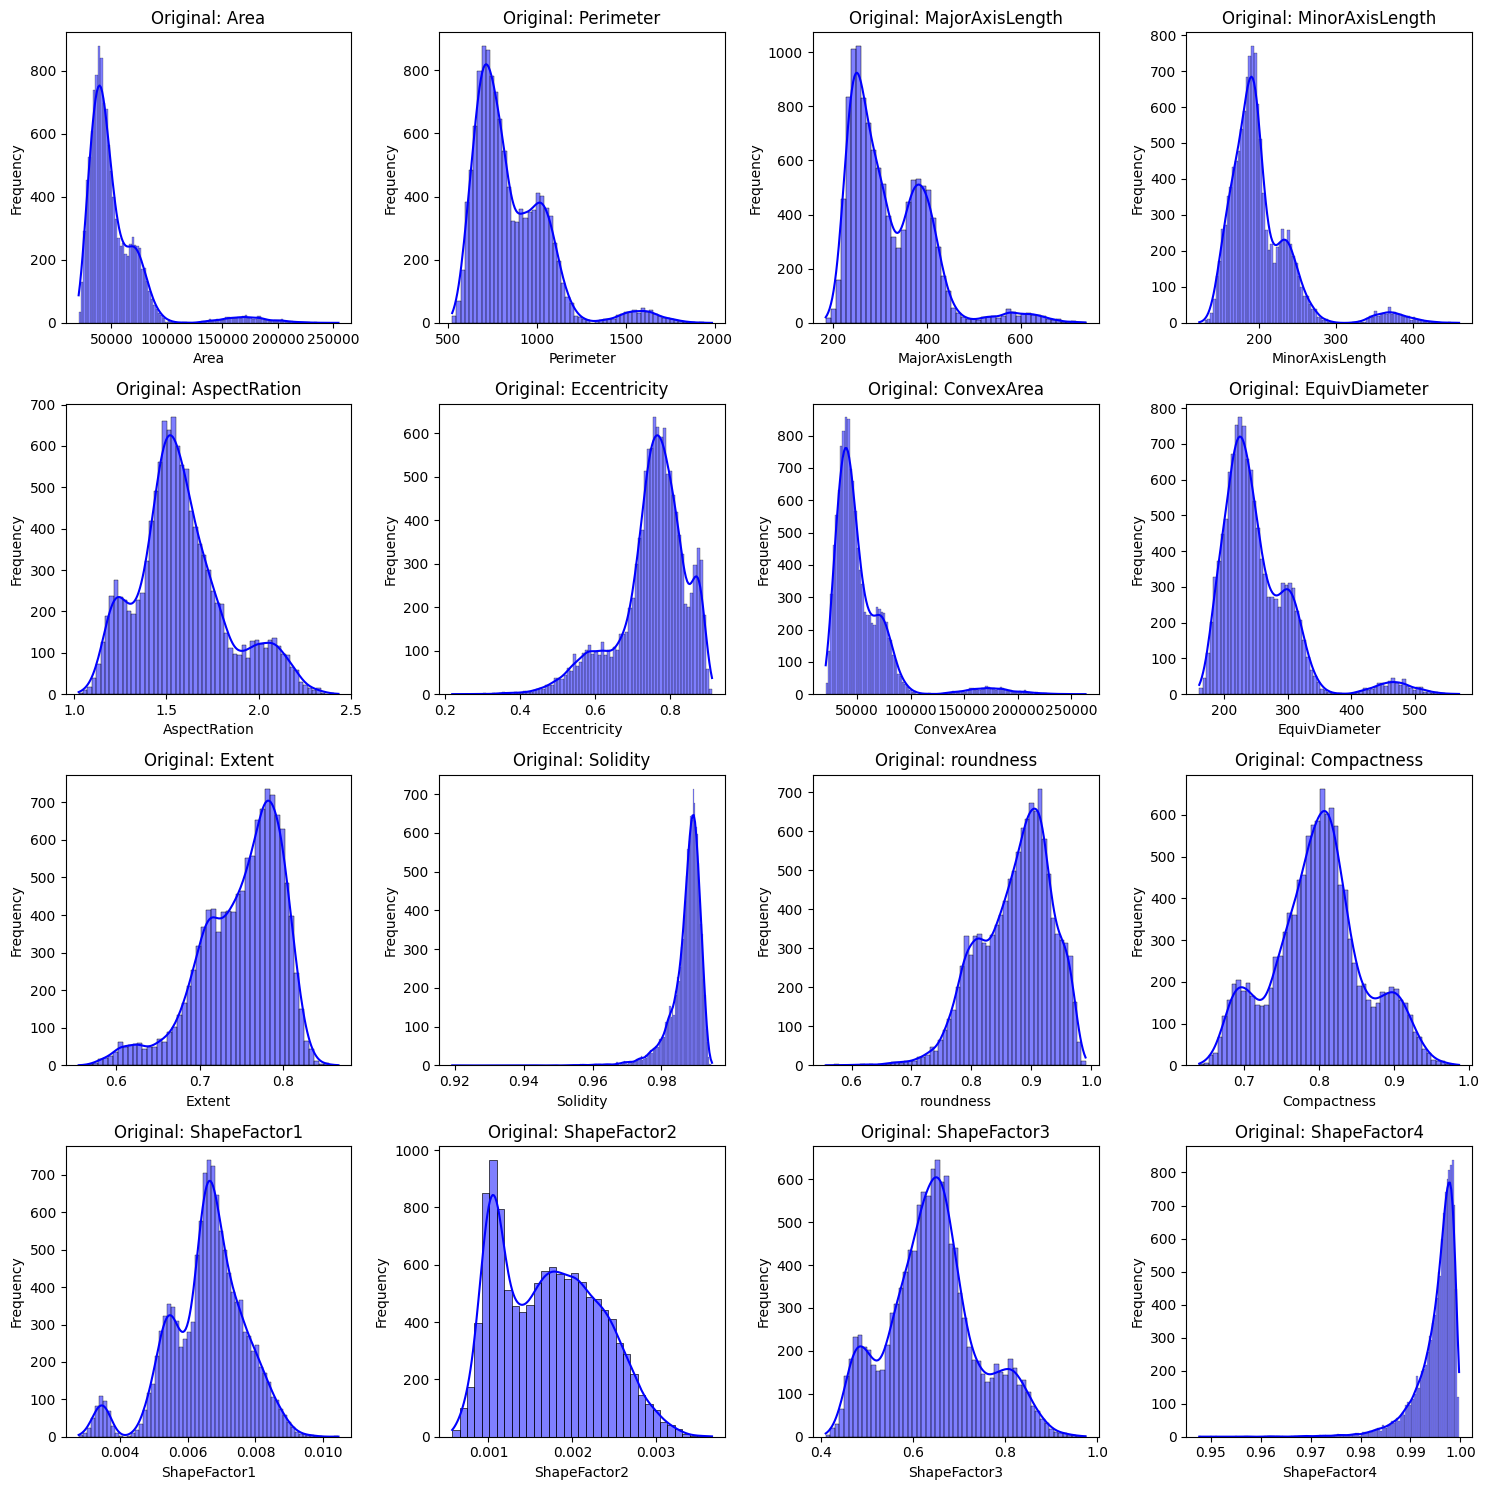

In [29]:
#check out the data distrobutions
#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [30]:
#make a function to normalize the data using min_max_scaler
def Min_Max_It(df):
    #initialize the scaler
    scaler = MinMaxScaler()
    #fit the scaler and transform the data
    normed_data = scaler.fit_transform(df)
    #turn the scaled data back into a dataframe
    df_normed = pd.DataFrame(normed_data, columns=df.columns)

    return df_normed

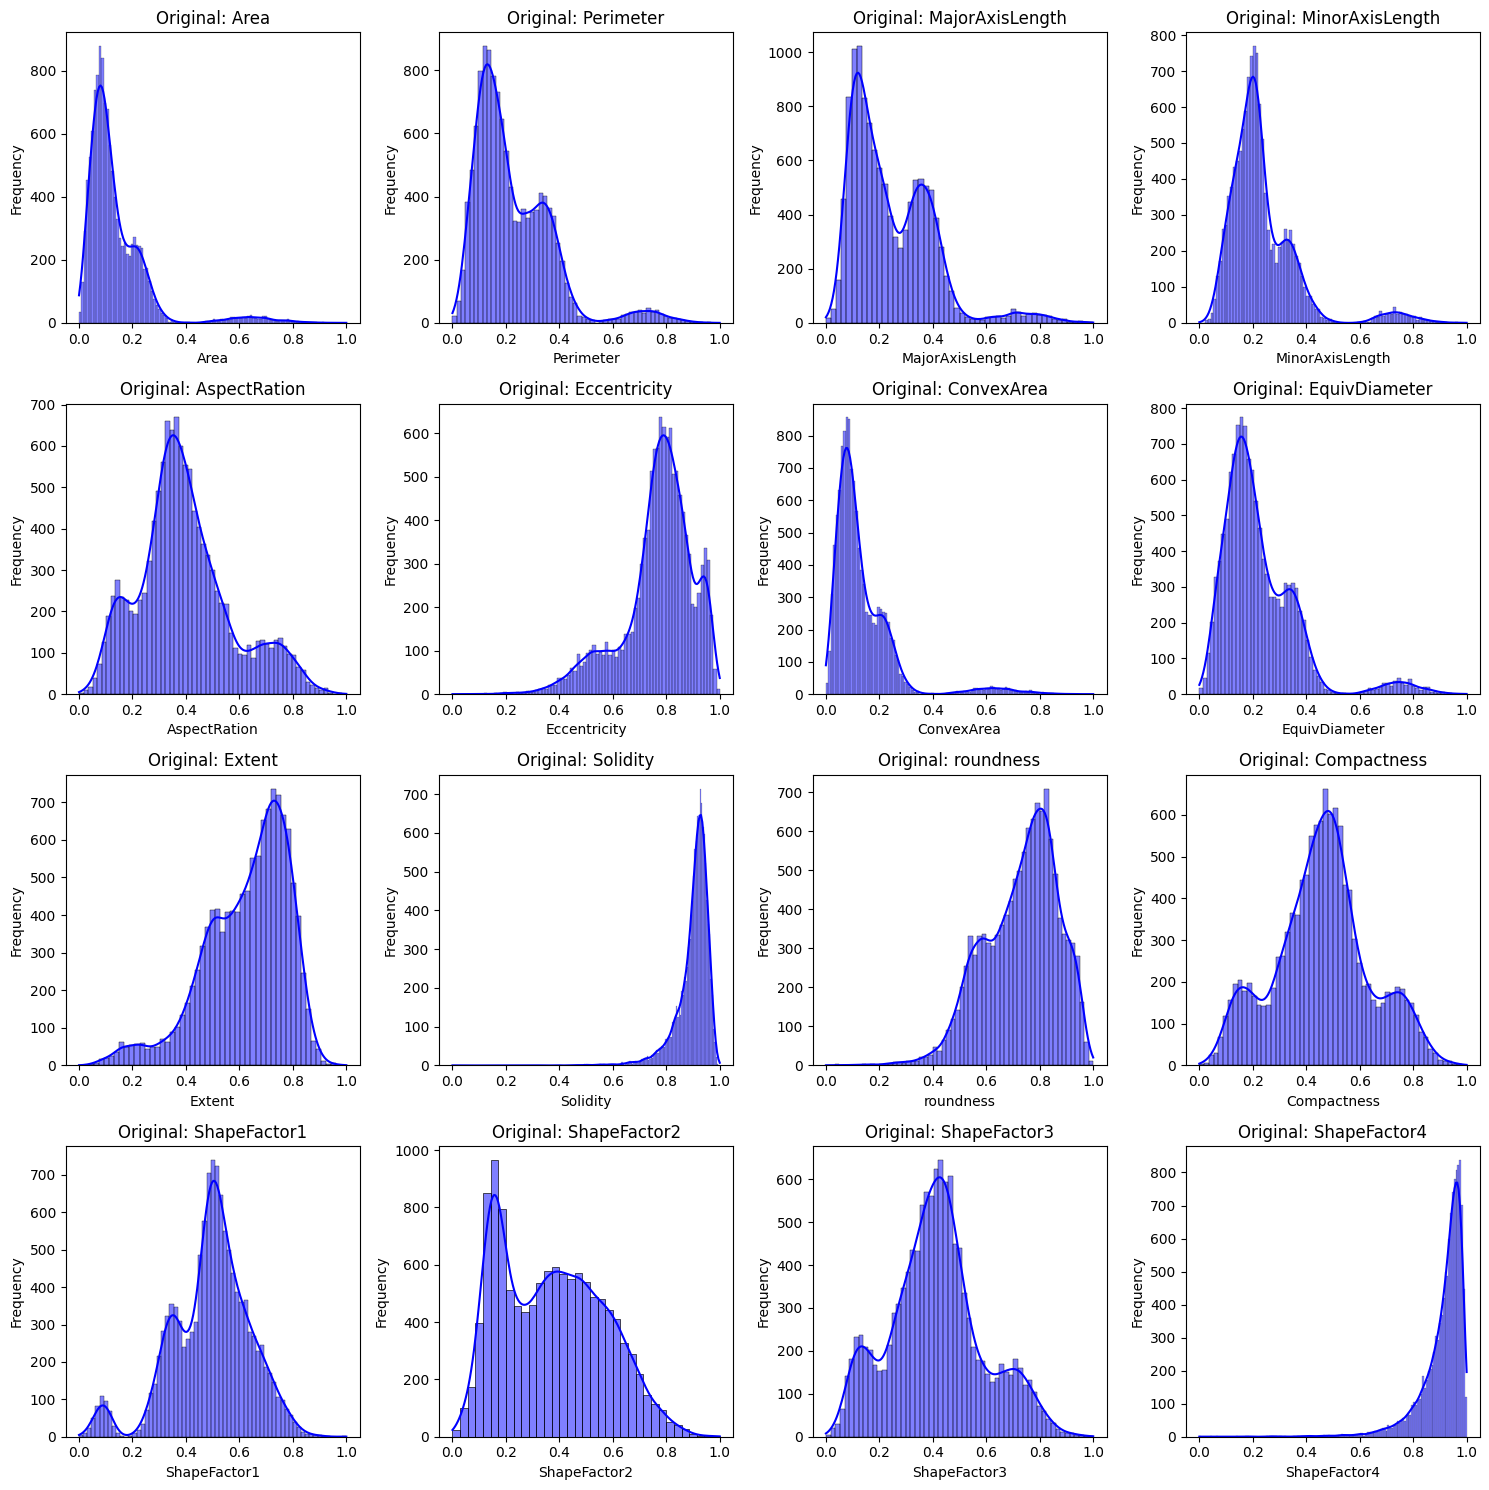

In [31]:
#normalize the training data via min max scaler
#plot the new normalized data distribution to check it out
X_train_MM= Min_Max_It(X_train)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_MM.columns):
    sns.histplot(X_train_MM[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## build the model and evaluate

In [32]:
#initialize the model
lr_MM = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
#fit the model
lr_MM.fit(X_train_MM, y_train)
#make predictions with the model
y_pred_lr_MM= lr_MM.predict(X_train_MM)

#compare the classification report to the previous models
print('Base model classification report:')
print(classification_report(y_train, y_pred_lr1))
print()
print('Standardized model classification report:')
print(classification_report(y_train, y_pred_lr_stand))
print()
print('Min_Max Normalized model classification report:')
print(classification_report(y_train, y_pred_lr_MM))

Base model classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9073
           1       0.87      0.83      0.85      3176

    accuracy                           0.92     12249
   macro avg       0.91      0.89      0.90     12249
weighted avg       0.92      0.92      0.92     12249


Standardized model classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9073
           1       0.84      0.95      0.89      3176

    accuracy                           0.94     12249
   macro avg       0.91      0.94      0.93     12249
weighted avg       0.95      0.94      0.94     12249


Min_Max Normalized model classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9073
           1       0.93      0.91      0.92      3176

    accuracy                           0.96     12249
  

This min max normalization results in an almost across the board imporvement

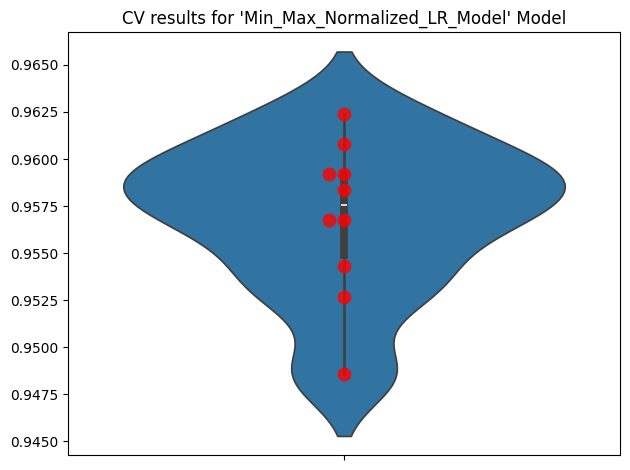

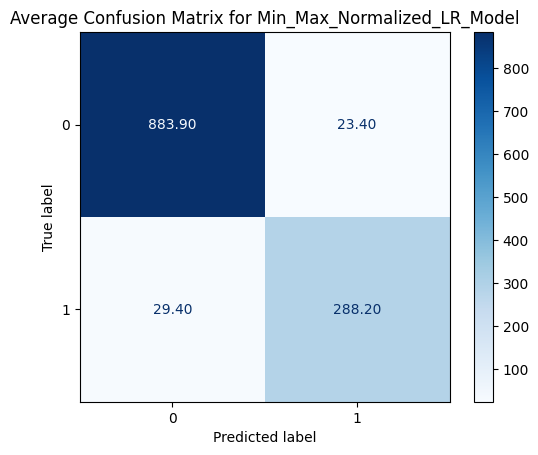

CV results for Base_LR_Model model: 0.92154 +- 0.00496 accuracy
Average specificity: 0.95580
Average precision: 0.86754
Average recall: 0.82368
CV results for Standardized_LR_Model model: 0.94000 +- 0.00789 accuracy
Average specificity: 0.93519
Average precision: 0.83792
Average recall: 0.95371
CV results for Min_Max_Normalized_LR_Model model: 0.95689 +- 0.00391 accuracy
Average specificity: 0.97421
Average precision: 0.92517
Average recall: 0.90743


In [33]:
#instantiate the class
MM_Norm_model_results= ModelWithCV(model= lr_MM,
                                    model_name= 'Min_Max_Normalized_LR_Model',
                                    X= X_train_MM,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= MM_Norm_model_results.plot_cv(ax)
plt.tight_layout()

ax2= MM_Norm_model_results.plot_avg_conf_matrix()

baseline_model_results.print_cv_summary()
Stanrdardized_model_results.print_cv_summary()
MM_Norm_model_results.print_cv_summary()

This min max normalized model is now the best performing model so far. Accuracy Precision and specificity have improved from the base model and recal is still an imporvement from the base, but not yet the out of all the models. 

# Sixth Model: Using Smote and Random Undersampling On Min Max Model

In [37]:
#create a function to SMOTE and Randomly undersample the dataset
def Smote_and_RandUndS(X, y):

        #resamplingby by applying SMOTE and random undersampling to balance the training data
        smote = SMOTE(sampling_strategy='auto', random_state=24)  
        undersample = RandomUnderSampler(sampling_strategy='auto', random_state=24)

        # Create a pipeline that applies SMOTE and undersampling
        pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

        # Apply the resampling on the passed in data
        X_resampled, y_resampled = pipeline.fit_resample(X, y)

        return X_resampled, y_resampled

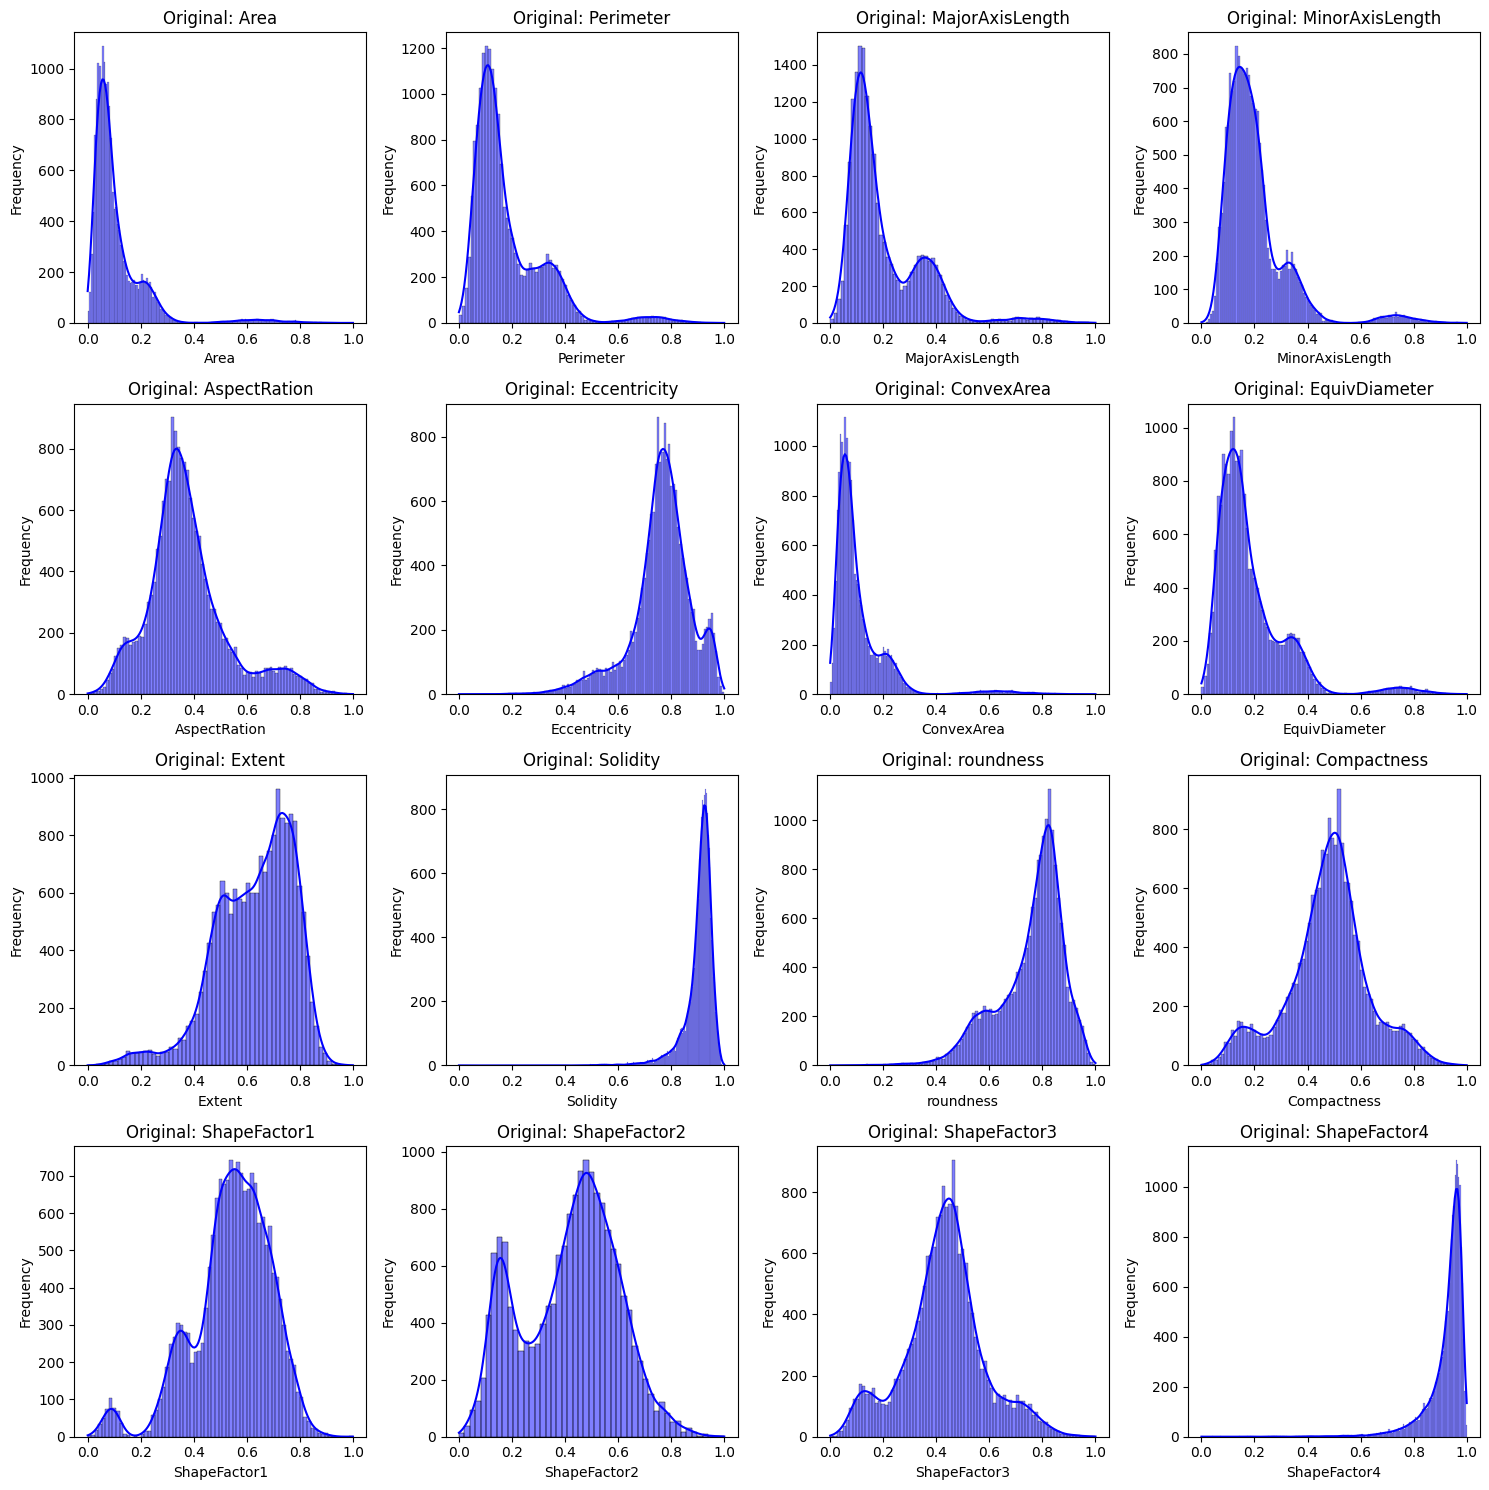

In [38]:
#Smote and Randomly undersample the training data
#plot the new  data distribution to check it out
X_train_MM_SR, y_train_SR= Smote_and_RandUndS(X_train_MM, y_train)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_MM_SR.columns):
    sns.histplot(X_train_MM_SR[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Build model and evaluate

In [39]:
#initialize the model
lr_MM_SR = LogisticRegression(fit_intercept=False, random_state= 24, C=1e16, solver='liblinear')
#fit the model
lr_MM_SR.fit(X_train_MM_SR, y_train_SR)
#make predictions with the model
y_pred_lr_MM_SR= lr_MM_SR.predict(X_train_MM_SR)

#compare the classification report to the previous models
print('Min_Max Normalized model classification report (Previous Best):')
print(classification_report(y_train, y_pred_lr_MM))
print()
print('Min_Max Normalized and Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_SR))

Min_Max Normalized model classification report (Previous Best):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9073
           1       0.93      0.91      0.92      3176

    accuracy                           0.96     12249
   macro avg       0.95      0.94      0.94     12249
weighted avg       0.96      0.96      0.96     12249


Min_Max Normalized and Smoted/Randomly Undersampled model classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9073
           1       0.95      0.96      0.96      9073

    accuracy                           0.96     18146
   macro avg       0.96      0.96      0.96     18146
weighted avg       0.96      0.96      0.96     18146



Mixed bag, more exploration is needed.

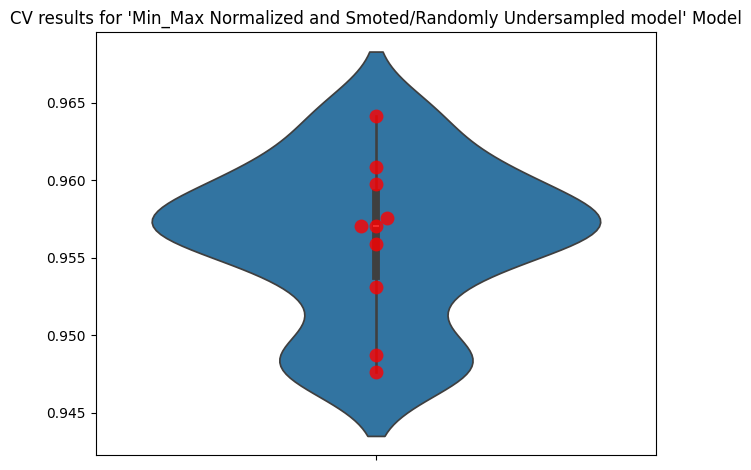

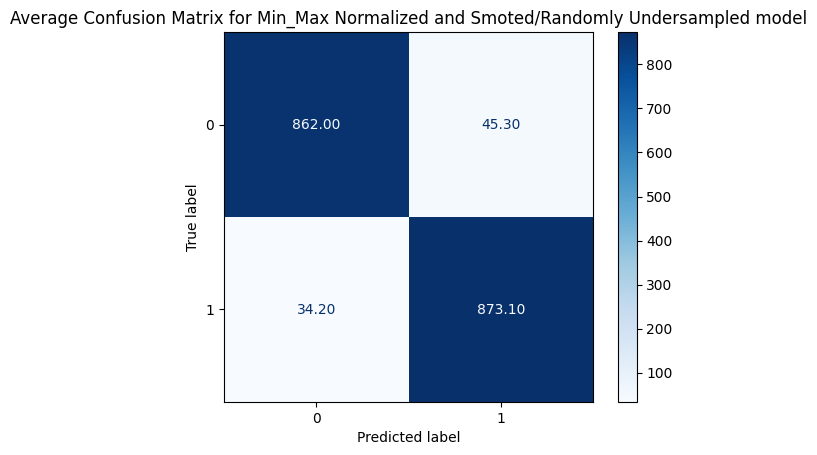

CV results for Min_Max_Normalized_LR_Model model: 0.95689 +- 0.00391 accuracy
Average specificity: 0.97421
Average precision: 0.92517
Average recall: 0.90743
CV results for Min_Max Normalized and Smoted/Randomly Undersampled model model: 0.95619 +- 0.00490 accuracy
Average specificity: 0.95007
Average precision: 0.95076
Average recall: 0.96231


In [40]:
#instantiate the class
lr_MM_SR_model_results= ModelWithCV(model= lr_MM_SR,
                                    model_name= 'Min_Max Normalized and Smoted/Randomly Undersampled model',
                                    X= X_train_MM_SR,
                                    y= y_train_SR)
#plot the results
fig, ax= plt.subplots()

ax1= lr_MM_SR_model_results.plot_cv(ax)
plt.tight_layout()

ax2= lr_MM_SR_model_results.plot_avg_conf_matrix()


MM_Norm_model_results.print_cv_summary()
lr_MM_SR_model_results.print_cv_summary()

Both accuracy and specificity decreased, but the class imbalance was fixed, and both precision/recal increased. This model could be considered better than the normal min max normalized model. We will keep this option around for the moment and see which of the models hyper parameter tuning works better on. 

# hpyer parameter tuning by iterating through C

## tune the min max normalized and Smote/randomly undersampled model

In [41]:
C_param_range= [.001, 0.01, .1, 1, 10, 100, 1000, 10000, 100000, 1000000,
                10000000, 100000000, 1000000000, 10000000000, 100000000000,
                1000000000000, 10000000000000, 100000000000000, 1000000000000000,
                10000000000000000, 100000000000000000, 1000000000000000000]

int_fit= [True, False]

for n1, int in enumerate(int_fit):
    for n2, c in enumerate(C_param_range):
        lr_MM_SR_Cs = LogisticRegression(fit_intercept=int, C=c, solver='liblinear',
                                penalty='l2', random_state=24)
        #fit
        lr_MM_SR_Cs.fit(X_train_MM_SR, y_train_SR)
        #make predictions with the model
        y_pred_lr_MM_SC_Cs= lr_MM_SR_Cs.predict(X_train_MM_SR)

        lr_MM_SR_Cs_model_results= ModelWithCV(model= lr_MM_SR_Cs,
                                    model_name= f'int:{int}, Min_Max Normalized and Smoted/Randomly Undersampled C{c} model',
                                    X= X_train_MM_SR,
                                    y= y_train_SR)
    
        lr_MM_SR_Cs_model_results.print_cv_summary()

CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C0.001 model model: 0.85049 +- 0.01083 accuracy
Average specificity: 0.70407
Average precision: 0.77133
Average recall: 0.99691
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C0.01 model model: 0.89965 +- 0.00849 accuracy
Average specificity: 0.81671
Average precision: 0.84295
Average recall: 0.98259
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C0.1 model model: 0.93657 +- 0.00769 accuracy
Average specificity: 0.91976
Average precision: 0.92248
Average recall: 0.95338
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C1 model model: 0.94897 +- 0.00667 accuracy
Average specificity: 0.94236
Average precision: 0.94316
Average recall: 0.95558
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C10 model model: 0.95487 +- 0.00643 accuracy
Average specificity: 0.94820
Average precision: 0.94895
Average r

Current best it int= True, C= 10000000

try tuning solver

In [42]:
C_param_range= [1000000, 10000000,
                100000000]

int_fit= [True]

pens= ['l2']

solvers= ['liblinear', 'saga', 'lbfgs']

for n3, solvern in enumerate(solvers):
    for n1, int in enumerate(int_fit):
        for n2, c in enumerate(C_param_range):
            lr_MM_SR_Cs = LogisticRegression(fit_intercept=int, C=c, solver= solvern,
                                             random_state=24, max_iter= 10000)
            #fit
            lr_MM_SR_Cs.fit(X_train_MM_SR, y_train_SR)
            #make predictions with the model
            y_pred_lr_MM_SC_Cs= lr_MM_SR_Cs.predict(X_train_MM_SR)

            lr_MM_SR_Cs_model_results= ModelWithCV(model= lr_MM_SR_Cs,
                                    model_name= f'solver:{solvern}, int:{int}, MMN and S/RU, C{c} model',
                                    X= X_train_MM_SR,
                                    y= y_train_SR)
    
            lr_MM_SR_Cs_model_results.print_cv_summary()
    

CV results for solver:liblinear, int:True, MMN and S/RU, C1000000 model model: 0.95674 +- 0.00516 accuracy
Average specificity: 0.95095
Average precision: 0.95161
Average recall: 0.96253
CV results for solver:liblinear, int:True, MMN and S/RU, C10000000 model model: 0.95685 +- 0.00518 accuracy
Average specificity: 0.95095
Average precision: 0.95162
Average recall: 0.96275
CV results for solver:liblinear, int:True, MMN and S/RU, C100000000 model model: 0.95652 +- 0.00542 accuracy
Average specificity: 0.95062
Average precision: 0.95130
Average recall: 0.96242
CV results for solver:saga, int:True, MMN and S/RU, C1000000 model model: 0.95597 +- 0.00514 accuracy
Average specificity: 0.95062
Average precision: 0.95124
Average recall: 0.96131
CV results for solver:saga, int:True, MMN and S/RU, C10000000 model model: 0.95597 +- 0.00514 accuracy
Average specificity: 0.95062
Average precision: 0.95124
Average recall: 0.96131
CV results for solver:saga, int:True, MMN and S/RU, C100000000 model mo

It seems for the Min Max normalized and Smote randomly undersampled model the best hyper parameters are a toss up between solver= liblinear, fit_intercept = True, and C=10000000, and solver= lbfgs, fit_intercept = True, and C=10000000,

In [43]:
#initialize the model
lr_MM_SR_tuned = LogisticRegression(fit_intercept=True, random_state= 24, C=10000000, penalty='l2', solver='liblinear')
#fit the model
lr_MM_SR_tuned.fit(X_train_MM_SR, y_train_SR)
#make predictions with the model
y_pred_lr_MM_SR_tuned= lr_MM_SR_tuned.predict(X_train_MM_SR)

#compare the classification report to the previous models
print('Min_Max Normalized model classification report (Previous Best):')
print(classification_report(y_train, y_pred_lr_MM))
print()
print('Min_Max Normalized and Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_SR_tuned))

Min_Max Normalized model classification report (Previous Best):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9073
           1       0.93      0.91      0.92      3176

    accuracy                           0.96     12249
   macro avg       0.95      0.94      0.94     12249
weighted avg       0.96      0.96      0.96     12249


Min_Max Normalized and Smoted/Randomly Undersampled model classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9073
           1       0.95      0.96      0.96      9073

    accuracy                           0.96     18146
   macro avg       0.96      0.96      0.96     18146
weighted avg       0.96      0.96      0.96     18146



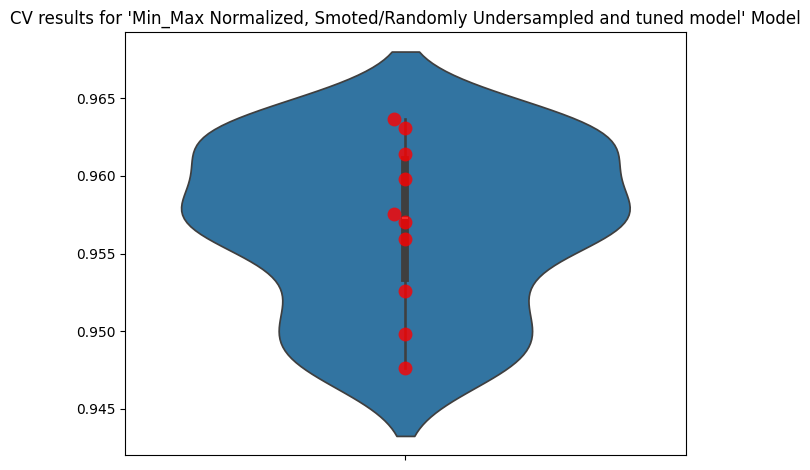

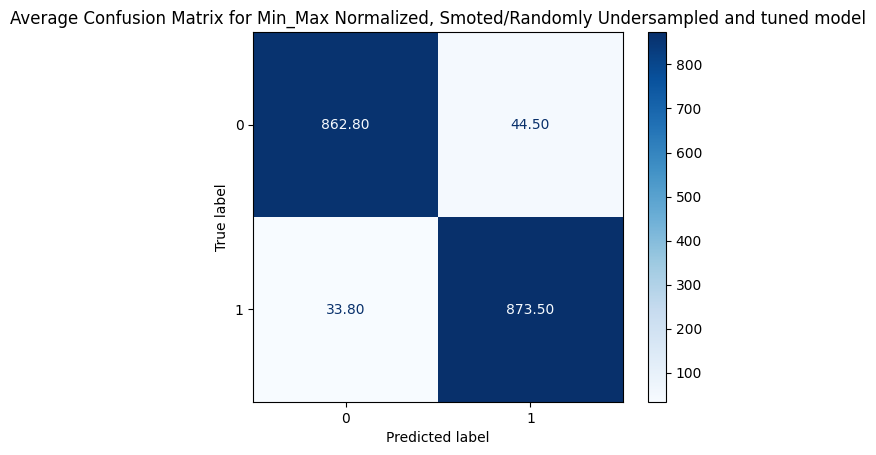

CV results for Min_Max_Normalized_LR_Model model: 0.95689 +- 0.00391 accuracy
Average specificity: 0.97421
Average precision: 0.92517
Average recall: 0.90743
CV results for Min_Max Normalized and Smoted/Randomly Undersampled model model: 0.95619 +- 0.00490 accuracy
Average specificity: 0.95007
Average precision: 0.95076
Average recall: 0.96231
CV results for Min_Max Normalized, Smoted/Randomly Undersampled and tuned model model: 0.95685 +- 0.00518 accuracy
Average specificity: 0.95095
Average precision: 0.95162
Average recall: 0.96275


In [44]:
#instantiate the class
lr_MM_SR_tuned_model_results= ModelWithCV(model= lr_MM_SR_tuned,
                                    model_name= 'Min_Max Normalized, Smoted/Randomly Undersampled and tuned model',
                                    X= X_train_MM_SR,
                                    y= y_train_SR)
#plot the results
fig, ax= plt.subplots()

ax1= lr_MM_SR_tuned_model_results.plot_cv(ax)
plt.tight_layout()

ax2= lr_MM_SR_tuned_model_results.plot_avg_conf_matrix()


MM_Norm_model_results.print_cv_summary()
lr_MM_SR_model_results.print_cv_summary()
lr_MM_SR_tuned_model_results.print_cv_summary()

although the tuned version of this model outperforms the untuned version, it still does not perform better than the min max normalized model that did not use smote or random undersampling. Due to this, lets go back and tune the hyper parameters of the min max normalized model that did not use smote or random undersampling.

## Tune the hyper parameters of the min max normalized model

In [45]:
C_param_range= [.001, 0.01, .1, 1, 10, 100, 1000, 10000, 100000, 1000000,
                10000000, 100000000, 1000000000, 10000000000, 100000000000,
                1000000000000, 10000000000000, 100000000000000, 1000000000000000,
                10000000000000000, 100000000000000000, 1000000000000000000]

int_fit= [True, False]

for n1, int in enumerate(int_fit):
    for n2, c in enumerate(C_param_range):
        lr_MM_Cs = LogisticRegression(fit_intercept=int, C=c, solver='liblinear',
                                penalty='l2', random_state=24)
        #fit
        lr_MM_Cs.fit(X_train_MM, y_train)
        #make predictions with the model
        y_pred_lr_MM_Cs= lr_MM_Cs.predict(X_train_MM)

        lr_MM_Cs_model_results= ModelWithCV(model= lr_MM_Cs,
                                    model_name= f'int:{int}, Min_Max Normalized and Smoted/Randomly Undersampled C{c} model',
                                    X= X_train_MM,
                                    y= y_train)
    
        lr_MM_Cs_model_results.print_cv_summary()

CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C0.001 model model: 0.74071 +- 0.00038 accuracy
Average specificity: 1.00000
Average precision: 0.00000
Average recall: 0.00000

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-


CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C0.01 model model: 0.84880 +- 0.00903 accuracy
Average specificity: 0.99868
Average precision: 0.99097
Average recall: 0.42065
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C0.1 model model: 0.93216 +- 0.00599 accuracy
Average specificity: 0.98523
Average precision: 0.94906
Average recall: 0.78055
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C1 model model: 0.94669 +- 0.00479 accuracy
Average specificity: 0.97686
Average precision: 0.92897
Average recall: 0.86052
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C10 model model: 0.95322 +- 0.00386 accuracy
Average specificity: 0.97487
Average precision: 0.92576
Average recall: 0.89137
CV results for int:True, Min_Max Normalized and Smoted/Randomly Undersampled C100 model model: 0.95559 +- 0.00339 accuracy
Average specificity: 0.97399
Average precision: 0.92431
Average re

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-

CV results for int:False, Min_Max Normalized and Smoted/Randomly Undersampled C0.01 model model: 0.84888 +- 0.00847 accuracy
Average specificity: 0.99835
Average precision: 0.98891
Average recall: 0.42191
CV results for int:False, Min_Max Normalized and Smoted/Randomly Undersampled C0.1 model model: 0.93150 +- 0.00627 accuracy
Average specificity: 0.98468
Average precision: 0.94718
Average recall: 0.77961
CV results for int:False, Min_Max Normalized and Smoted/Randomly Undersampled C1 model model: 0.94702 +- 0.00498 accuracy
Average specificity: 0.97686
Average precision: 0.92909
Average recall: 0.86178
CV results for int:False, Min_Max Normalized and Smoted/Randomly Undersampled C10 model model: 0.95347 +- 0.00402 accuracy
Average specificity: 0.97498
Average precision: 0.92617
Average recall: 0.89200
CV results for int:False, Min_Max Normalized and Smoted/Randomly Undersampled C100 model model: 0.95575 +- 0.00338 accuracy
Average specificity: 0.97399
Average precision: 0.92435
Averag

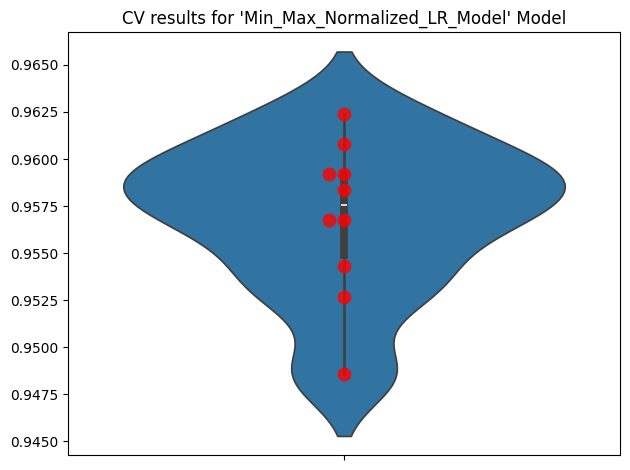

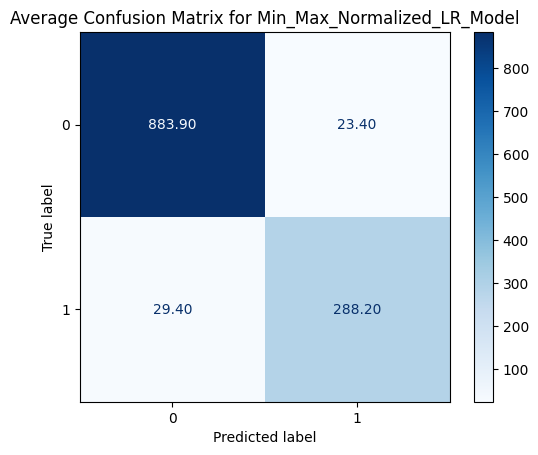

CV results for Base_LR_Model model: 0.92154 +- 0.00496 accuracy
Average specificity: 0.95580
Average precision: 0.86754
Average recall: 0.82368
CV results for Standardized_LR_Model model: 0.94000 +- 0.00789 accuracy
Average specificity: 0.93519
Average precision: 0.83792
Average recall: 0.95371
CV results for Min_Max_Normalized_LR_Model model: 0.95689 +- 0.00391 accuracy
Average specificity: 0.97421
Average precision: 0.92517
Average recall: 0.90743


In [46]:
#instantiate the class
MM_Norm_model_results= ModelWithCV(model= lr_MM,
                                    model_name= 'Min_Max_Normalized_LR_Model',
                                    X= X_train_MM,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= MM_Norm_model_results.plot_cv(ax)
plt.tight_layout()

ax2= MM_Norm_model_results.plot_avg_conf_matrix()

baseline_model_results.print_cv_summary()
Stanrdardized_model_results.print_cv_summary()
MM_Norm_model_results.print_cv_summary()

none of these are as good as the smoted and randomly undersampled models. Go back to those and tune for max iteration to see if that has any affect.

# The best Logistic regression model for our situation.

In [47]:

    #initialize the model
lr_MM_SR_tuned = LogisticRegression(fit_intercept=True, random_state= 24, C=10000000, penalty='l2', solver='liblinear')
#fit the model
lr_MM_SR_tuned.fit(X_train_MM_SR, y_train_SR)
#make predictions with the model
y_pred_lr_MM_SR_tuned= lr_MM_SR_tuned.predict(X_train_MM_SR)

#compare the classification report to the previous models
print('Min_Max Normalized and Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_SR_tuned))

Min_Max Normalized and Smoted/Randomly Undersampled model classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9073
           1       0.95      0.96      0.96      9073

    accuracy                           0.96     18146
   macro avg       0.96      0.96      0.96     18146
weighted avg       0.96      0.96      0.96     18146



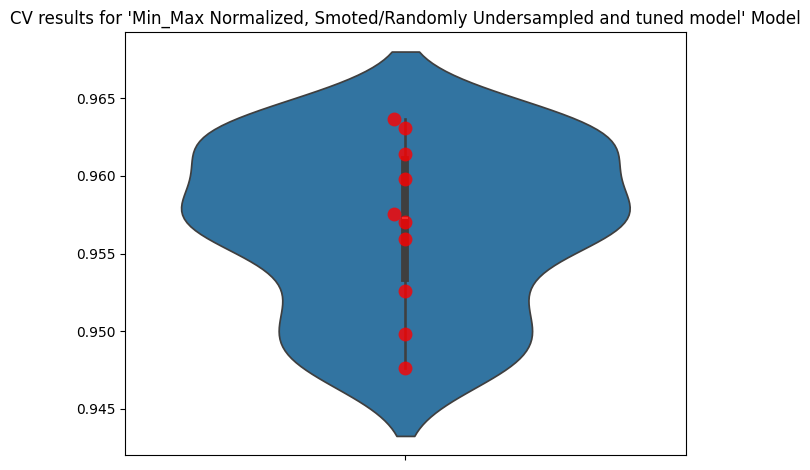

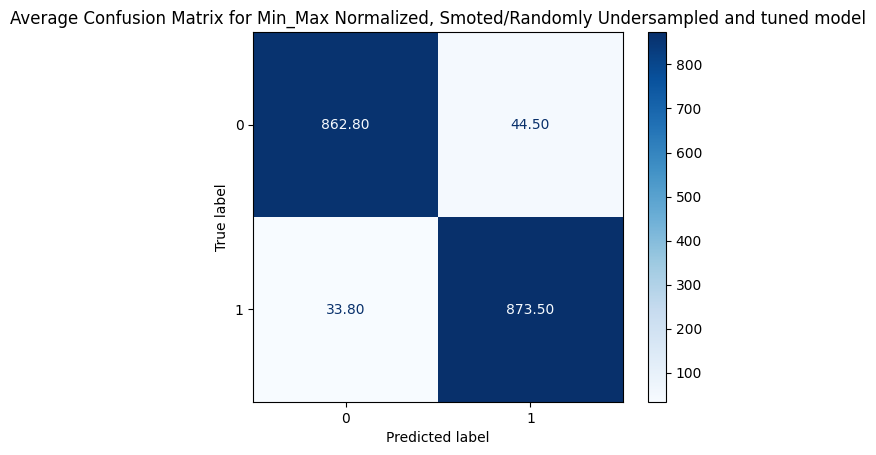

CV results for Min_Max Normalized, Smoted/Randomly Undersampled and tuned model model: 0.95685 +- 0.00518 accuracy
Average specificity: 0.95095
Average precision: 0.95162
Average recall: 0.96275


In [48]:
#instantiate the class
lr_MM_SR_tuned_model_results= ModelWithCV(model= lr_MM_SR_tuned,
                                    model_name= 'Min_Max Normalized, Smoted/Randomly Undersampled and tuned model',
                                    X= X_train_MM_SR,
                                    y= y_train_SR)
#plot the results
fig, ax= plt.subplots()

ax1= lr_MM_SR_tuned_model_results.plot_cv(ax)
plt.tight_layout()

ax2= lr_MM_SR_tuned_model_results.plot_avg_conf_matrix()

lr_MM_SR_tuned_model_results.print_cv_summary()

# lets compare this to Decision tree models

In [ ]:
#works
class ModelDTWithCV():
    def __init__(self, model_instantiator, model_name, X, y, model_kwargs = {}, scaler=False, smote_and_rand_und= False, cv_now=True):
        self.model_instatiator = model_instantiator
        self.model = None
        self.model_kwargs = model_kwargs
        self.name = model_name
        self.scaler= scaler
        self.smote_and_rand_und= smote_and_rand_und
        self.X = X
        self.y = y
        self.cv_specificity_mean = None
        self.cv_precision_mean = None
        self.cv_recall_mean = None
        self.avg_conf_matrix = None
       
        self.cv_specificity_mean_train = None
        self.cv_precision_mean_train = None
        self.cv_recall_mean_train = None
        self.avg_conf_matrix_train = None
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=10):
  
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # Convert to numpy arrays to avoid indexing issues with pandas
        cv_X = cv_X.values if isinstance(cv_X, pd.DataFrame) else cv_X
        cv_y = cv_y.values if isinstance(cv_y, pd.Series) else cv_y

        # Initialize variables for metrics accumulation
        cv_splits = StratifiedKFold(n_splits=kfolds)
        specificity_scores_train = []
        precision_scores_train = []
        recall_scores_train = []
       
        specificity_scores = []
        precision_scores = []
        recall_scores = []
        total_conf_matrix = np.zeros((2, 2))  # Initialize a 2x2 matrix for binary classification
        total_conf_matrix_train = np.zeros((2, 2))  # Initialize a 2x2 matrix for binary classification

        if self.scaler:
            print('Scaling')

        if self.smote_and_rand_und:
            print('SMOTEing and Randomly Undersampling')
        
        for train_idx, test_idx in cv_splits.split(cv_X, cv_y):
            # Split data into training and test sets
            X_train, X_test = cv_X[train_idx], cv_X[test_idx]
            y_train, y_test = cv_y[train_idx], cv_y[test_idx]
                    
            self.model = self.model_instatiator(random_state= 24, **self.model_kwargs)
            
            if self.scaler:
                cv_scaler= MinMaxScaler()
                X_train = cv_scaler.fit_transform(X_train)
                X_test = cv_scaler.transform(X_test)

            if self.smote_and_rand_und:
                #resamplingby by applying SMOTE and random undersampling to balance the training data
                smote = SMOTE(sampling_strategy='auto', random_state=24)  
                undersample = RandomUnderSampler(sampling_strategy='auto', random_state=24)

                # Create a pipeline that applies SMOTE and undersampling
                pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
        
                # Apply the resampling on the passed in data
                X_train, y_train = pipeline.fit_resample(X_train, y_train)
        
            # Fit model and make predictions
            self.model.fit(X_train, y_train)
           
            y_train_pred = self.model.predict(X_train)
            y_pred = self.model.predict(X_test)

            # Compute confusion matrix for the fold
            TN_train, FP_train, FN_train, TP_train = confusion_matrix(y_train, y_train_pred).ravel()
            total_conf_matrix_train += confusion_matrix(y_train, y_train_pred)
            # Compute specificity
            specificity_train = TN_train / (TN_train + FP_train)  # Specificity calculation
            specificity_scores_train.append(specificity_train)

            # Compute precision and recall for this fold
            precision_train = precision_score(y_train, y_train_pred)
            recall_train = recall_score(y_train, y_train_pred)
            precision_scores_train.append(precision_train)
            recall_scores_train.append(recall_train)
           
            # VAL      
            # Compute confusion matrix for the fold

            TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
            total_conf_matrix += confusion_matrix(y_test, y_pred)

            # Compute specificity
            specificity = TN / (TN + FP)  # Specificity calculation
            specificity_scores.append(specificity)

            # Compute precision and recall for this fold
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision_scores.append(precision)
            recall_scores.append(recall)

        # Store the average scores
        self.cv_specificity_mean_train = np.mean(specificity_scores_train)
        self.cv_precision_mean_train = np.mean(precision_scores_train)
        self.cv_recall_mean_train = np.mean(recall_scores_train)

        # Average confusion matrix (normalize if desired)
        self.avg_conf_matrix_train = total_conf_matrix_train / kfolds
              
        # Store the average scores
        self.cv_specificity_mean = np.mean(specificity_scores)
        self.cv_precision_mean = np.mean(precision_scores)
        self.cv_recall_mean = np.mean(recall_scores)

        # Average confusion matrix (normalize if desired)
        self.avg_conf_matrix = total_conf_matrix / kfolds

    def print_cv_summary(self):
        cv_summary_train = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean_train:.5f}\n"
            f"Average precision: {self.cv_precision_mean_train:.5f}\n"
            f"Average recall: {self.cv_recall_mean_train:.5f}")
        print('###TRAIN###')
        print(cv_summary_train)
       
        cv_summary_val = (
            f"CV results for {self.name} model:"
            f"Average specificity: {self.cv_specificity_mean:.5f}\n"
            f"Average precision: {self.cv_precision_mean:.5f}\n"
            f"Average recall: {self.cv_recall_mean:.5f}")
        print('###VAL###')
        print(cv_summary_val)

        return self.cv_specificity_mean, self.cv_precision_mean, self.cv_recall_mean, \
        self.model_kwargs, self.scaler, self.smote_and_rand_und
    

    def plot_avg_conf_matrix(self):
        """
        Plot the average confusion matrix using ConfusionMatrixDisplay.
        """
        if self.avg_conf_matrix is not None:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix_train)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Train Confusion Matrix for {self.name}")
            plt.show()
           
            disp = ConfusionMatrixDisplay(confusion_matrix=self.avg_conf_matrix)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Average Confusion Matrix for {self.name}")
            plt.show()
        else:
            print("Confusion matrix is not available. Please run cross-validation first.")

In [192]:
#instantiate the class
baseline_DT_model_results= ModelWithCV(model_instantiator= DecisionTreeClassifier,
                                    model_name= 'Base_DT_Model',
                                    X= X_train,
                                    y= y_train,
                                    scaler= False,
                                    smote_and_rand_und= False
                                   )

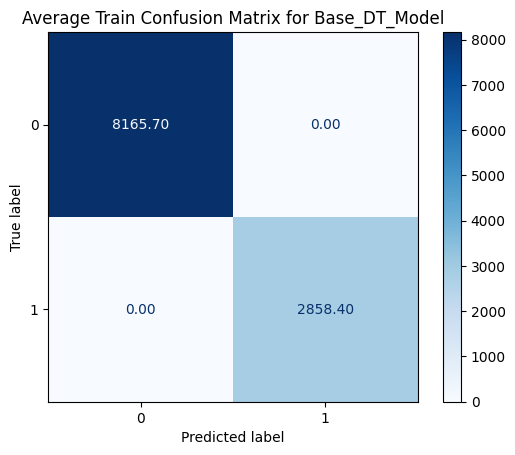

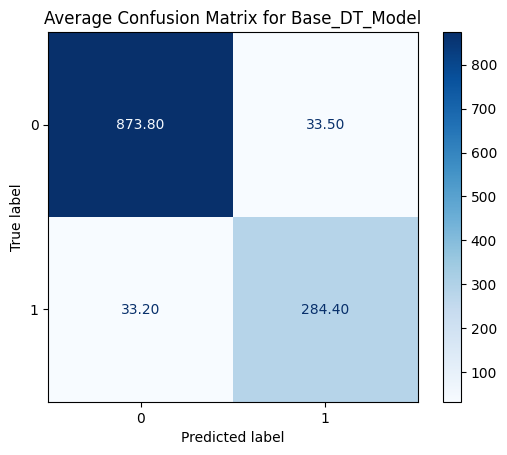

###TRAIN###
CV results for Base_DT_Model model:Average specificity: 1.00000
Average precision: 1.00000
Average recall: 1.00000
###VAL###
CV results for Base_DT_Model model:Average specificity: 0.96308
Average precision: 0.89476
Average recall: 0.89546


(0.9630782849010874, 0.8947636683015476, 0.8954595956589886, {}, False, False)

In [193]:
baseline_DT_model_results.plot_avg_conf_matrix()

baseline_DT_model_results.print_cv_summary()

## make a baseline decision tree

get the raw split data

In [49]:
#assign the independent variable columns
X= bean_df.drop(['Dermason','Class'], axis = 1)
#assign the dependant variable columns
y= bean_df['Dermason']

#split up the data into train and test subsets
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 24, test_size= 0.1)

make the vanilla base decision tree model

In [50]:
#dt1 is decision tree #1
#initialize the model
dt1 = DecisionTreeClassifier(random_state= 24)
#fit the model
dt1.fit(X_train, y_train)
#make predictions with the model
y_pred_dt1= dt1.predict(X_train)

print(classification_report(y_train, y_pred_dt1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9073
           1       1.00      1.00      1.00      3176

    accuracy                           1.00     12249
   macro avg       1.00      1.00      1.00     12249
weighted avg       1.00      1.00      1.00     12249



the classification report shows perfect, but I have hunch that the model is over fit. Let's check out these classifcations over some cross validation.

In [51]:
#do some cross-validation to see how the model reacts to data it has not been trained on
cv_results = cross_val_score(dt1, X_train, y_train, cv= 6)
print('An array of baseline model accuracy results across (6) cross Validations:')
print(cv_results)
print()
print('The average accuracy score of those 6 cross-validations:')
print(cv_results.mean())

An array of baseline model accuracy results across (6) cross Validations:
[0.9417238  0.93927522 0.94711068 0.9421852  0.94120529 0.9500245 ]

The average accuracy score of those 6 cross-validations:
0.9435874481711273


I was correct, the model was overfitting to the training data.

print the baseline cross validation model results

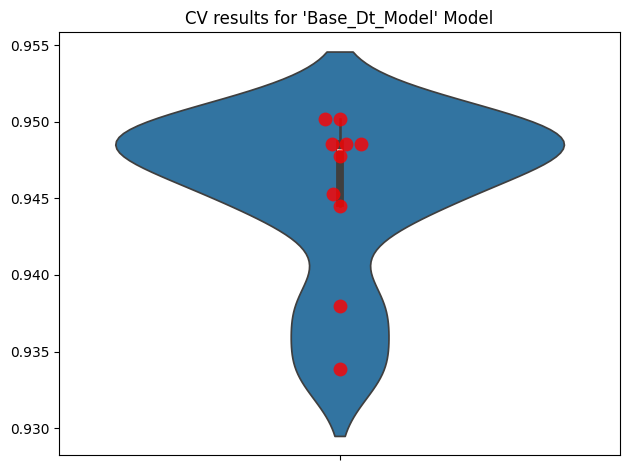

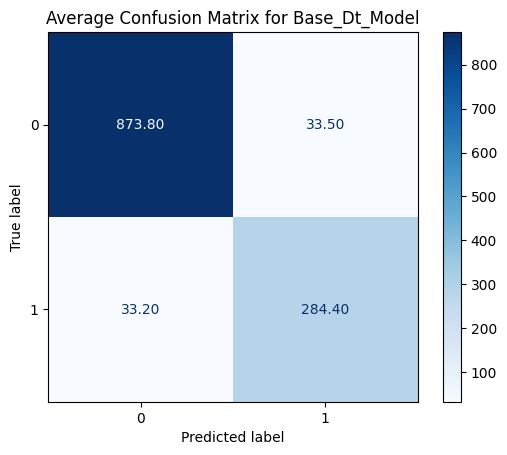

CV results for Min_Max Normalized, Smoted/Randomly Undersampled and tuned model model: 0.95685 +- 0.00518 accuracy
Average specificity: 0.95095
Average precision: 0.95162
Average recall: 0.96275
CV results for Base_Dt_Model model: 0.94555 +- 0.00520 accuracy
Average specificity: 0.96308
Average precision: 0.89476
Average recall: 0.89546


In [52]:
#instantiate the class
dt_baseline_model_results= ModelWithCV(model= dt1,
                                    model_name= 'Base_Dt_Model',
                                    X= X_train,
                                    y= y_train)

#plot the results
fig, ax= plt.subplots()

ax1= dt_baseline_model_results.plot_cv(ax)
plt.tight_layout()

ax2= dt_baseline_model_results.plot_avg_conf_matrix()

lr_MM_SR_tuned_model_results.print_cv_summary()
dt_baseline_model_results.print_cv_summary()

not off to a bad start. already the specificity is higher for the decision tree base model than the final logistic regression model. All the other success rates are lower than the final log reg model, but Lets do some preprecessing to see if we can get these crossvalidation scores to improve

## second DT model: standardize the base model

check the data distrobution

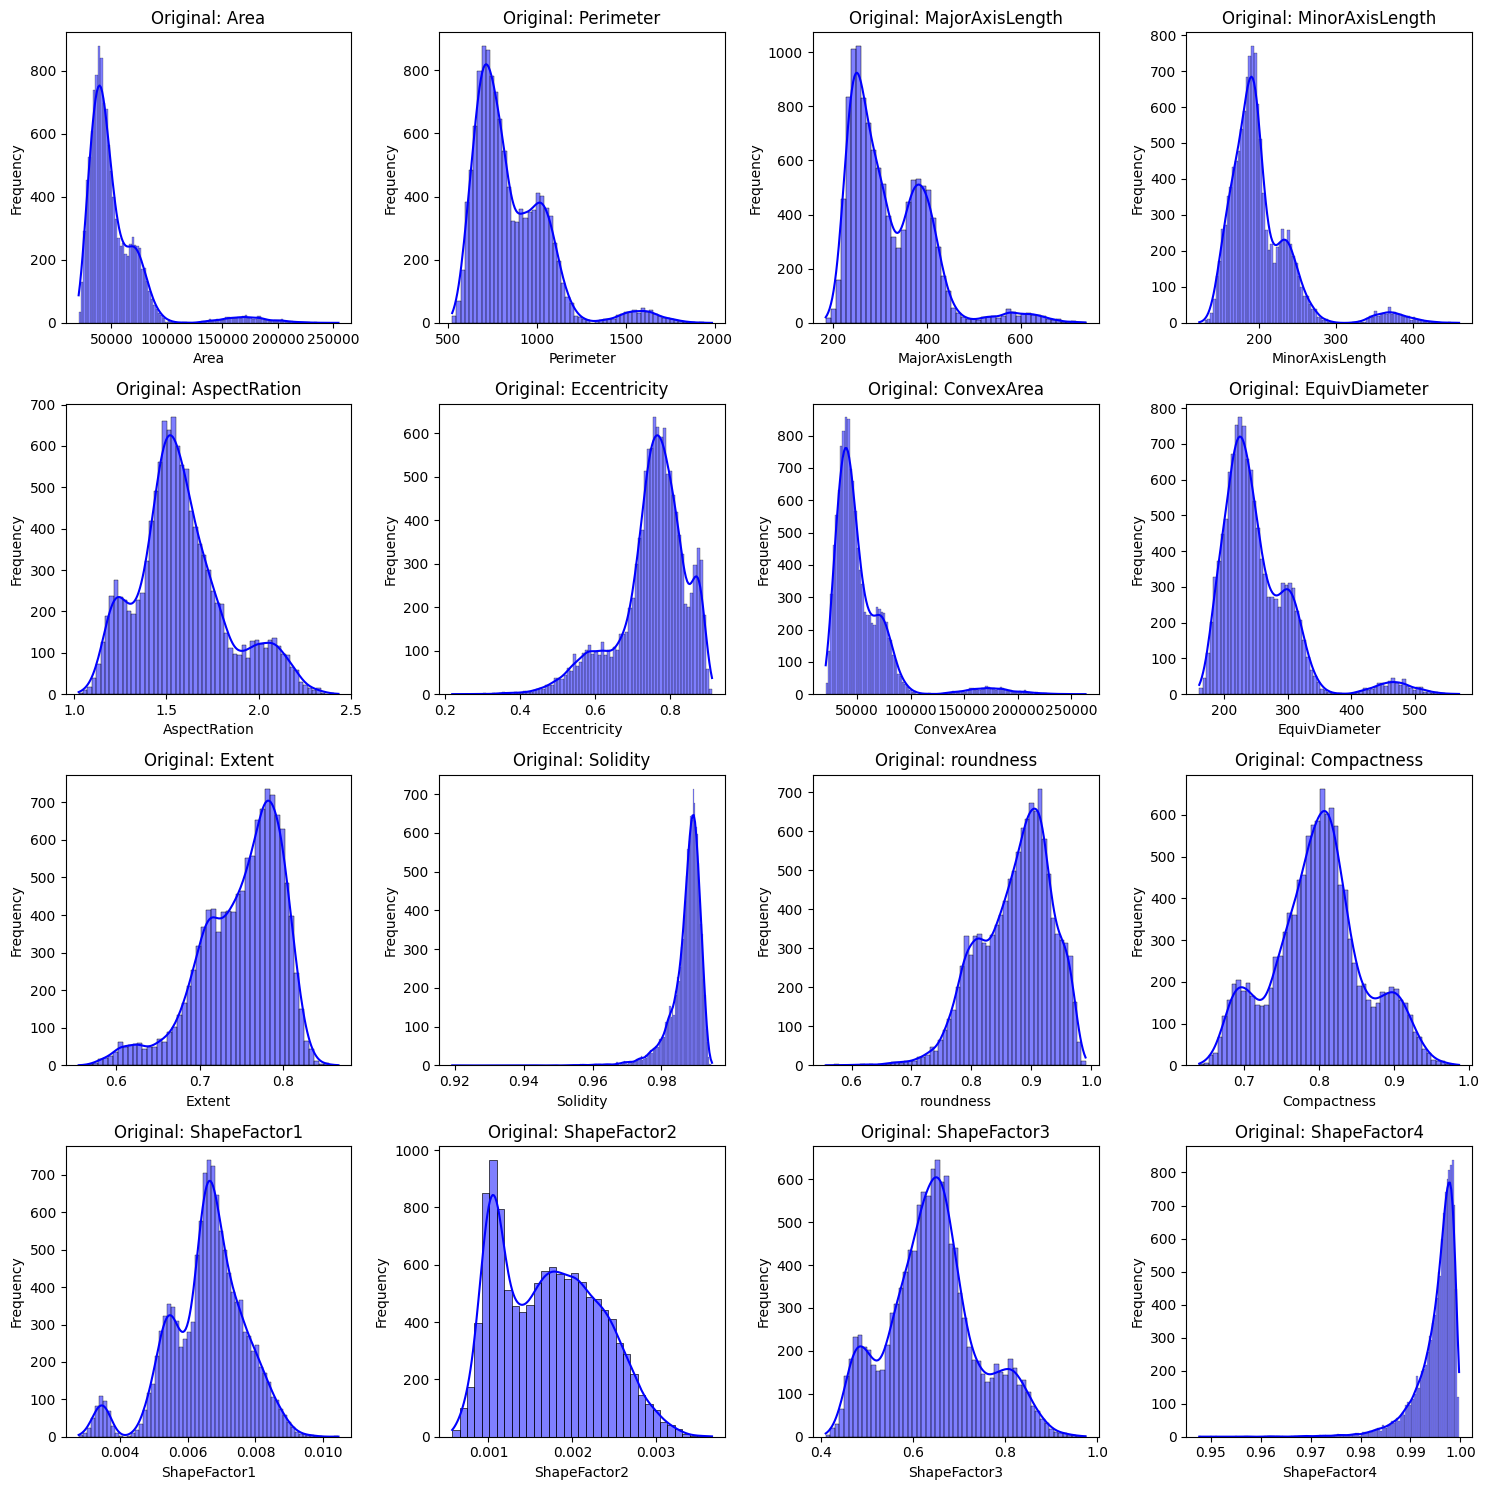

In [53]:
#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

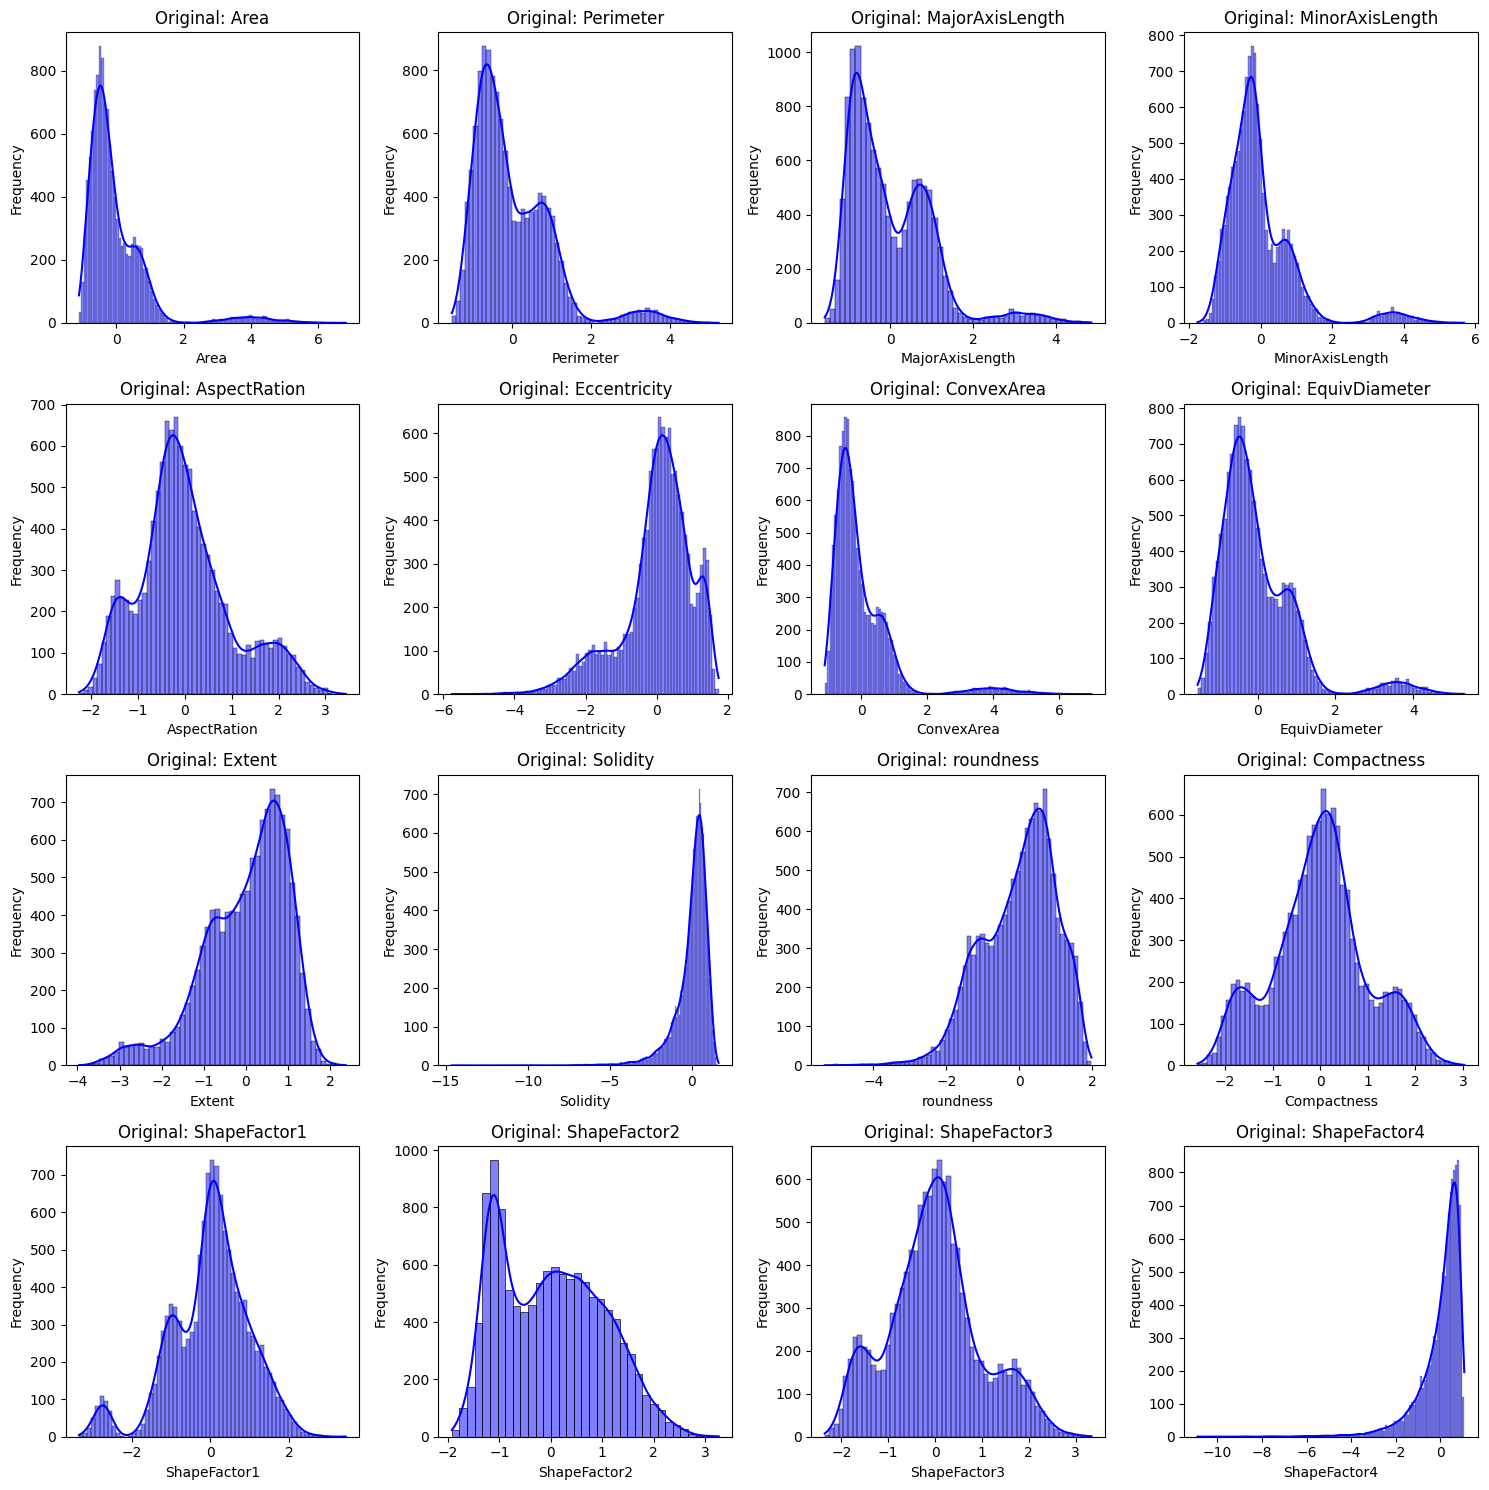

In [54]:
#scale the training data
#plot the new standardized data to check it out
X_train_Scaled= Scale_It(X_train)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_Scaled.columns):
    sns.histplot(X_train_Scaled[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [55]:
#dt_stand is the standardized model
#initialize the model
dt_stand = DecisionTreeClassifier(random_state= 24)
#fit the model
dt_stand.fit(X_train_Scaled, y_train)
#make predictions with the model
y_pred_dt_stand= dt_stand.predict(X_train_Scaled)

#compare the classification report to the previous model
print('Base model classification report:')
print(classification_report(y_train, y_pred_dt1))
print()
print('Standardized model classification report:')
print(classification_report(y_train, y_pred_dt_stand))

Base model classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9073
           1       1.00      1.00      1.00      3176

    accuracy                           1.00     12249
   macro avg       1.00      1.00      1.00     12249
weighted avg       1.00      1.00      1.00     12249


Standardized model classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9073
           1       1.00      1.00      1.00      3176

    accuracy                           1.00     12249
   macro avg       1.00      1.00      1.00     12249
weighted avg       1.00      1.00      1.00     12249



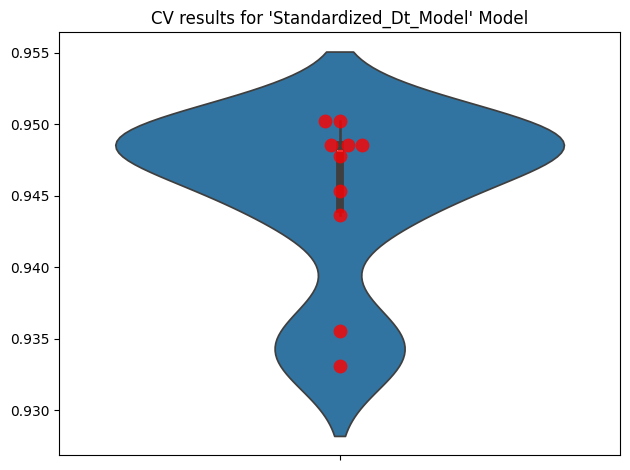

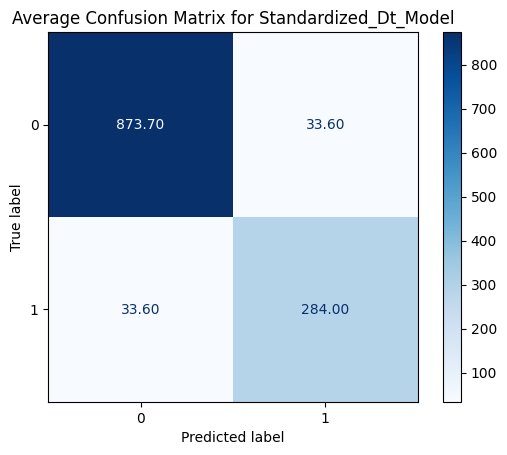

CV results for Min_Max Normalized, Smoted/Randomly Undersampled and tuned model model: 0.95685 +- 0.00518 accuracy
Average specificity: 0.95095
Average precision: 0.95162
Average recall: 0.96275
CV results for Base_Dt_Model model: 0.94555 +- 0.00520 accuracy
Average specificity: 0.96308
Average precision: 0.89476
Average recall: 0.89546
CV results for Standardized_Dt_Model model: 0.94514 +- 0.00578 accuracy
Average specificity: 0.96297
Average precision: 0.89437
Average recall: 0.89420


In [56]:
#instantiate the class
dt_Stand_results= ModelWithCV(model= dt_stand,
                                    model_name= 'Standardized_Dt_Model',
                                    X= X_train_Scaled,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= dt_Stand_results.plot_cv(ax)
plt.tight_layout()

ax2= dt_Stand_results.plot_avg_conf_matrix()

lr_MM_SR_tuned_model_results.print_cv_summary()
dt_baseline_model_results.print_cv_summary()
dt_Stand_results.print_cv_summary()

this did not help

## Third DT model: normalize then standardize the data

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


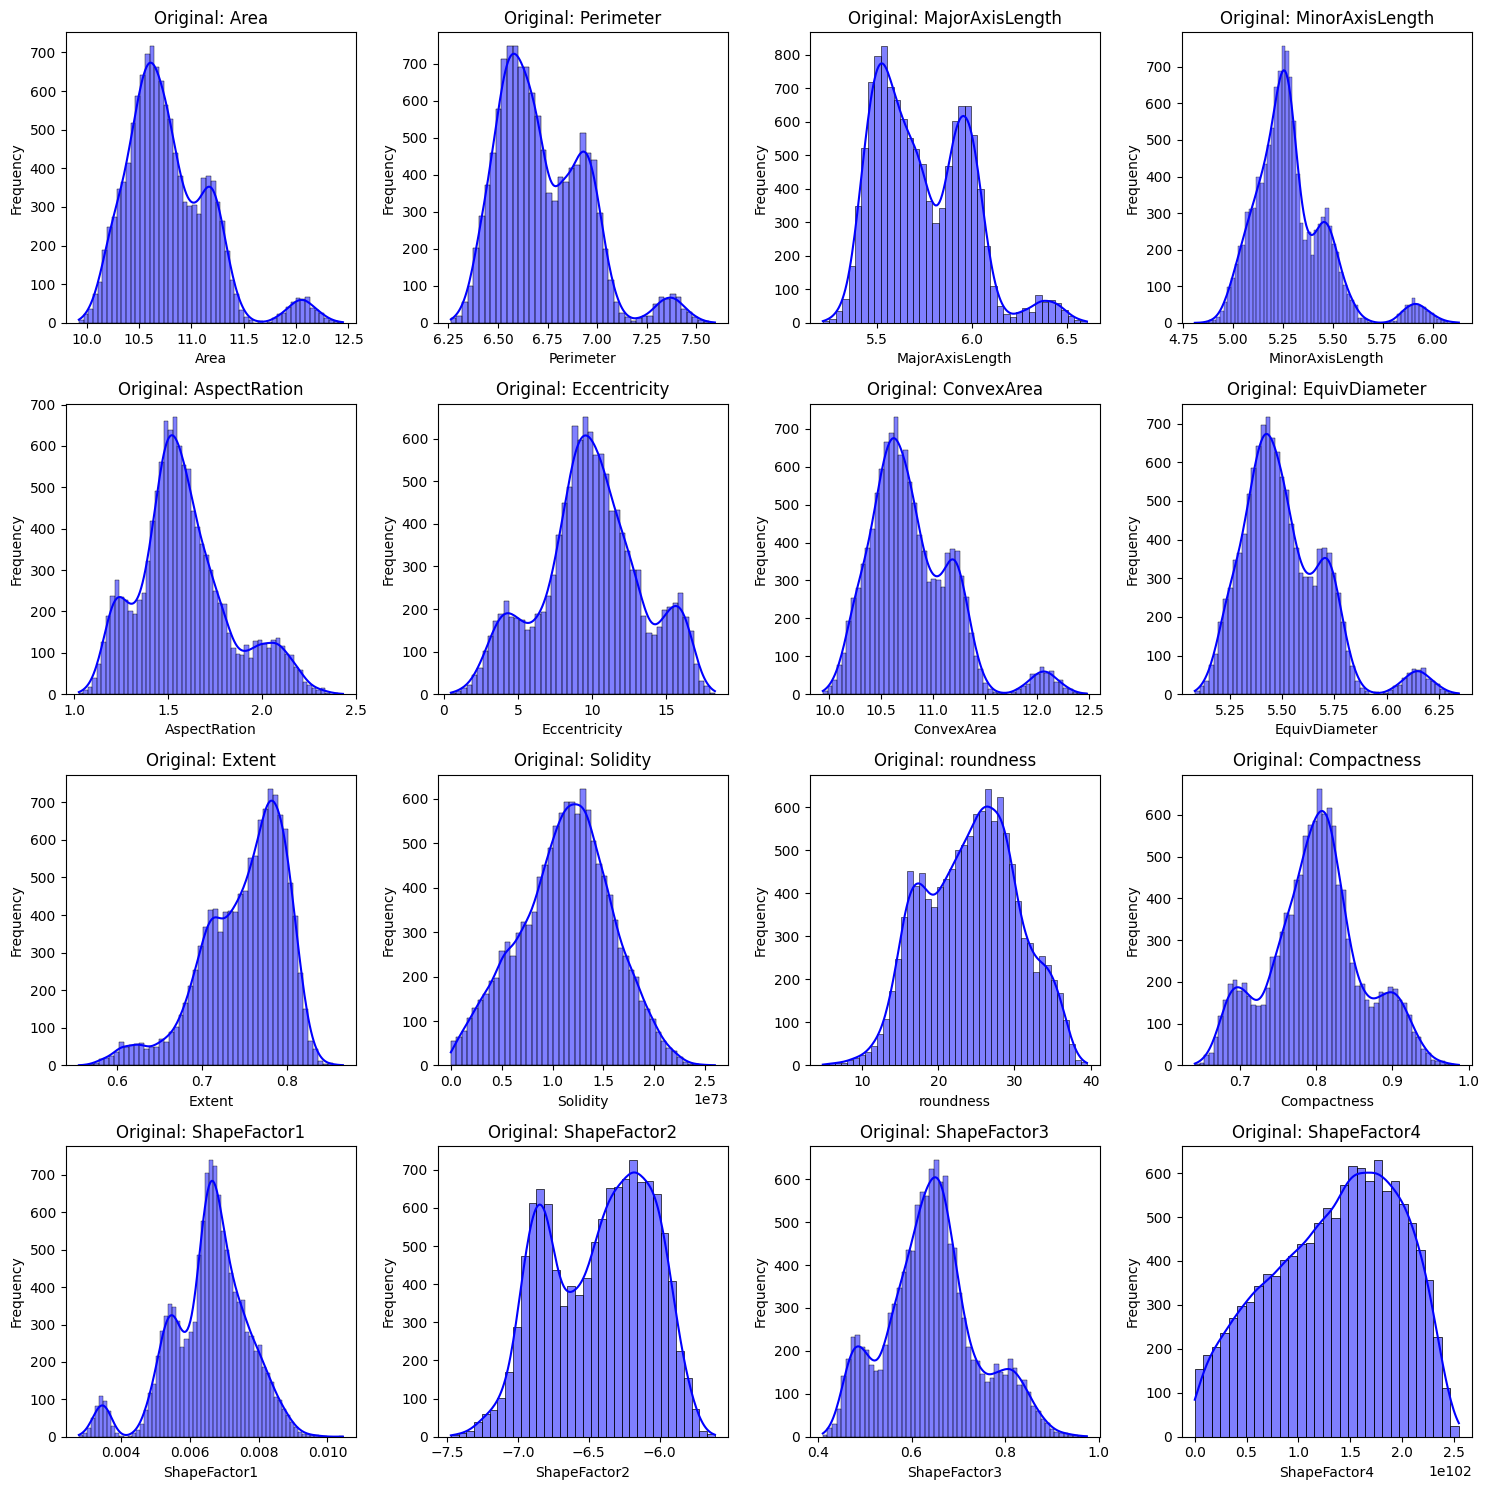

In [57]:
#normalize the training data
#plot the new normalized data distribution to check it out
X_train_Norm= TransShift(X_train)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_Norm.columns):
    sns.histplot(X_train_Norm[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

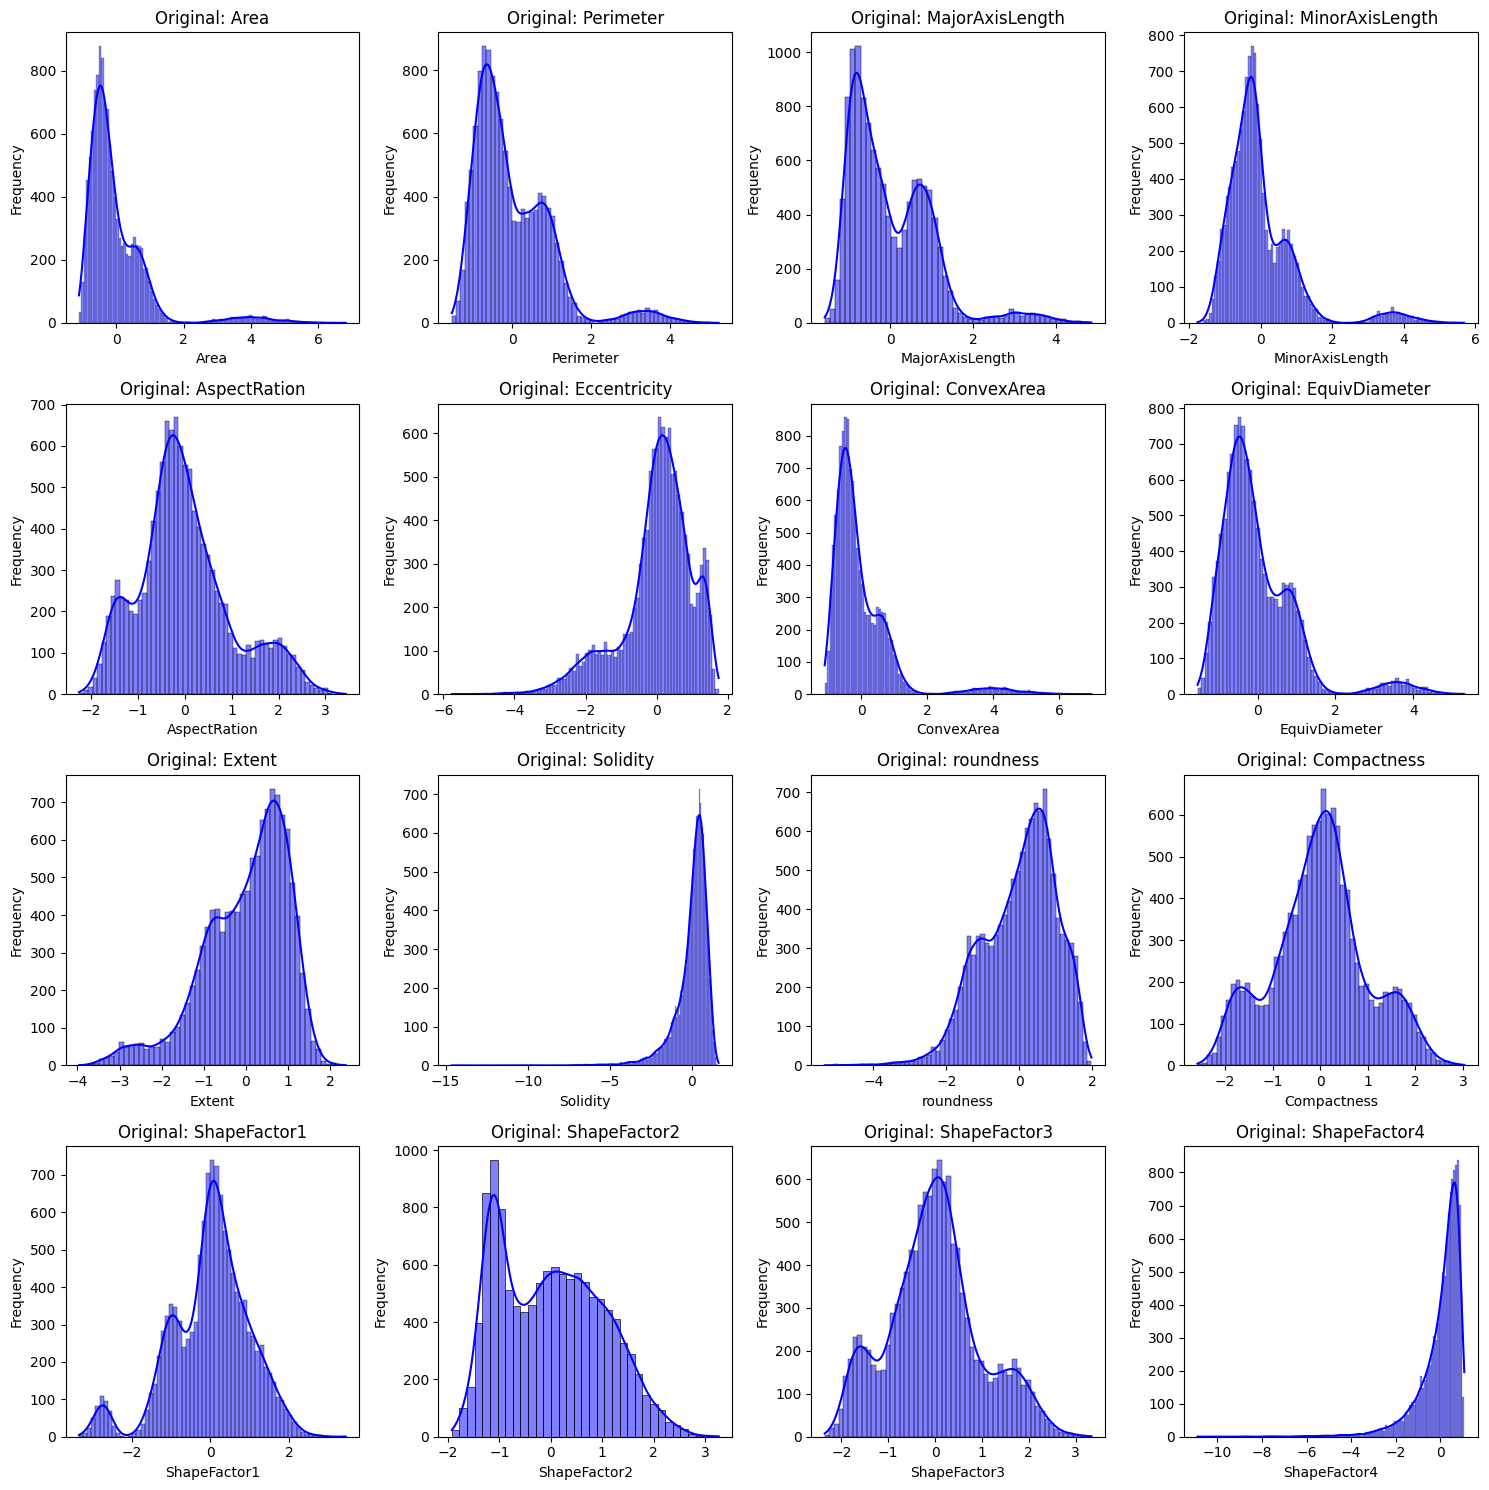

In [58]:
#scale the training data
#plot the new standardized data to check it out
X_train_Norm_Scaled= Scale_It(X_train_Norm)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_Scaled.columns):
    sns.histplot(X_train_Scaled[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [59]:
#initialize the model
dt_norm_scaled = DecisionTreeClassifier(random_state= 24)
#fit the model
dt_norm_scaled.fit(X_train_Norm_Scaled, y_train)
#make predictions with the model
y_pred_dt_norm_scaled= dt_norm_scaled.predict(X_train_Norm_Scaled)

#compare the classification report to the previous models
print('Base model classification report:')
print(classification_report(y_train, y_pred_dt1))
print()
print('Standardized model classification report:')
print(classification_report(y_train, y_pred_dt_stand))
print()
print('Normalized and Standardized model classification report:')
print(classification_report(y_train, y_pred_dt_norm_scaled))

Base model classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9073
           1       1.00      1.00      1.00      3176

    accuracy                           1.00     12249
   macro avg       1.00      1.00      1.00     12249
weighted avg       1.00      1.00      1.00     12249


Standardized model classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9073
           1       1.00      1.00      1.00      3176

    accuracy                           1.00     12249
   macro avg       1.00      1.00      1.00     12249
weighted avg       1.00      1.00      1.00     12249


Normalized and Standardized model classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9073
           1       1.00      1.00      1.00      3176

    accuracy                           1.00    

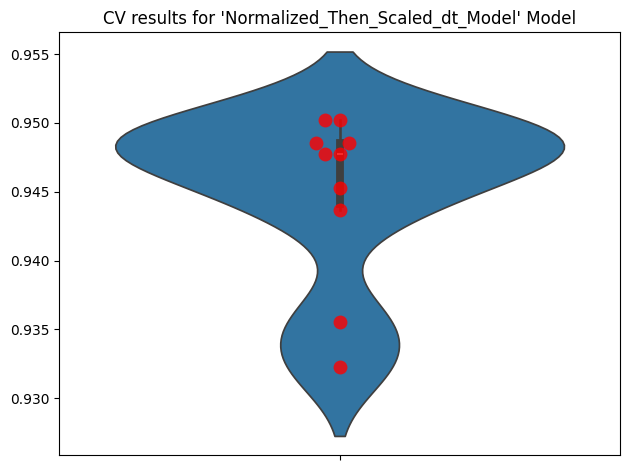

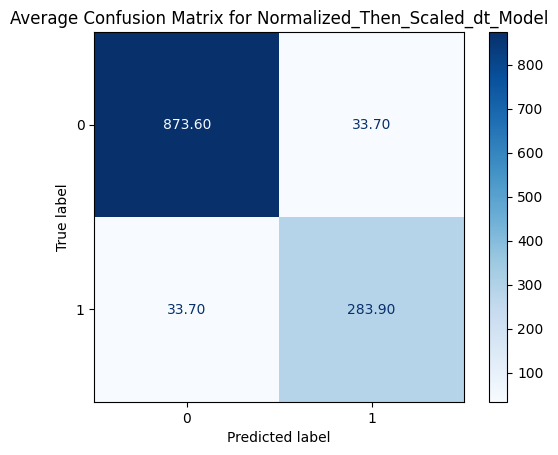

CV results for Min_Max Normalized, Smoted/Randomly Undersampled and tuned model model: 0.95685 +- 0.00518 accuracy
Average specificity: 0.95095
Average precision: 0.95162
Average recall: 0.96275
CV results for Base_Dt_Model model: 0.94555 +- 0.00520 accuracy
Average specificity: 0.96308
Average precision: 0.89476
Average recall: 0.89546
CV results for Normalized_Then_Scaled_dt_Model model: 0.94498 +- 0.00591 accuracy
Average specificity: 0.96286
Average precision: 0.89406
Average recall: 0.89389


In [60]:
#instantiate the class
Dt_Norm_Scaled_model_results= ModelWithCV(model= dt_norm_scaled,
                                    model_name= 'Normalized_Then_Scaled_dt_Model',
                                    X= X_train_Norm_Scaled,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= Dt_Norm_Scaled_model_results.plot_cv(ax)
plt.tight_layout()

ax2= Dt_Norm_Scaled_model_results.plot_avg_conf_matrix()

lr_MM_SR_tuned_model_results.print_cv_summary()
dt_baseline_model_results.print_cv_summary()
Dt_Norm_Scaled_model_results.print_cv_summary()

This does not help either

## Forth DT model: Min_Max_Scaler() to normalize the data

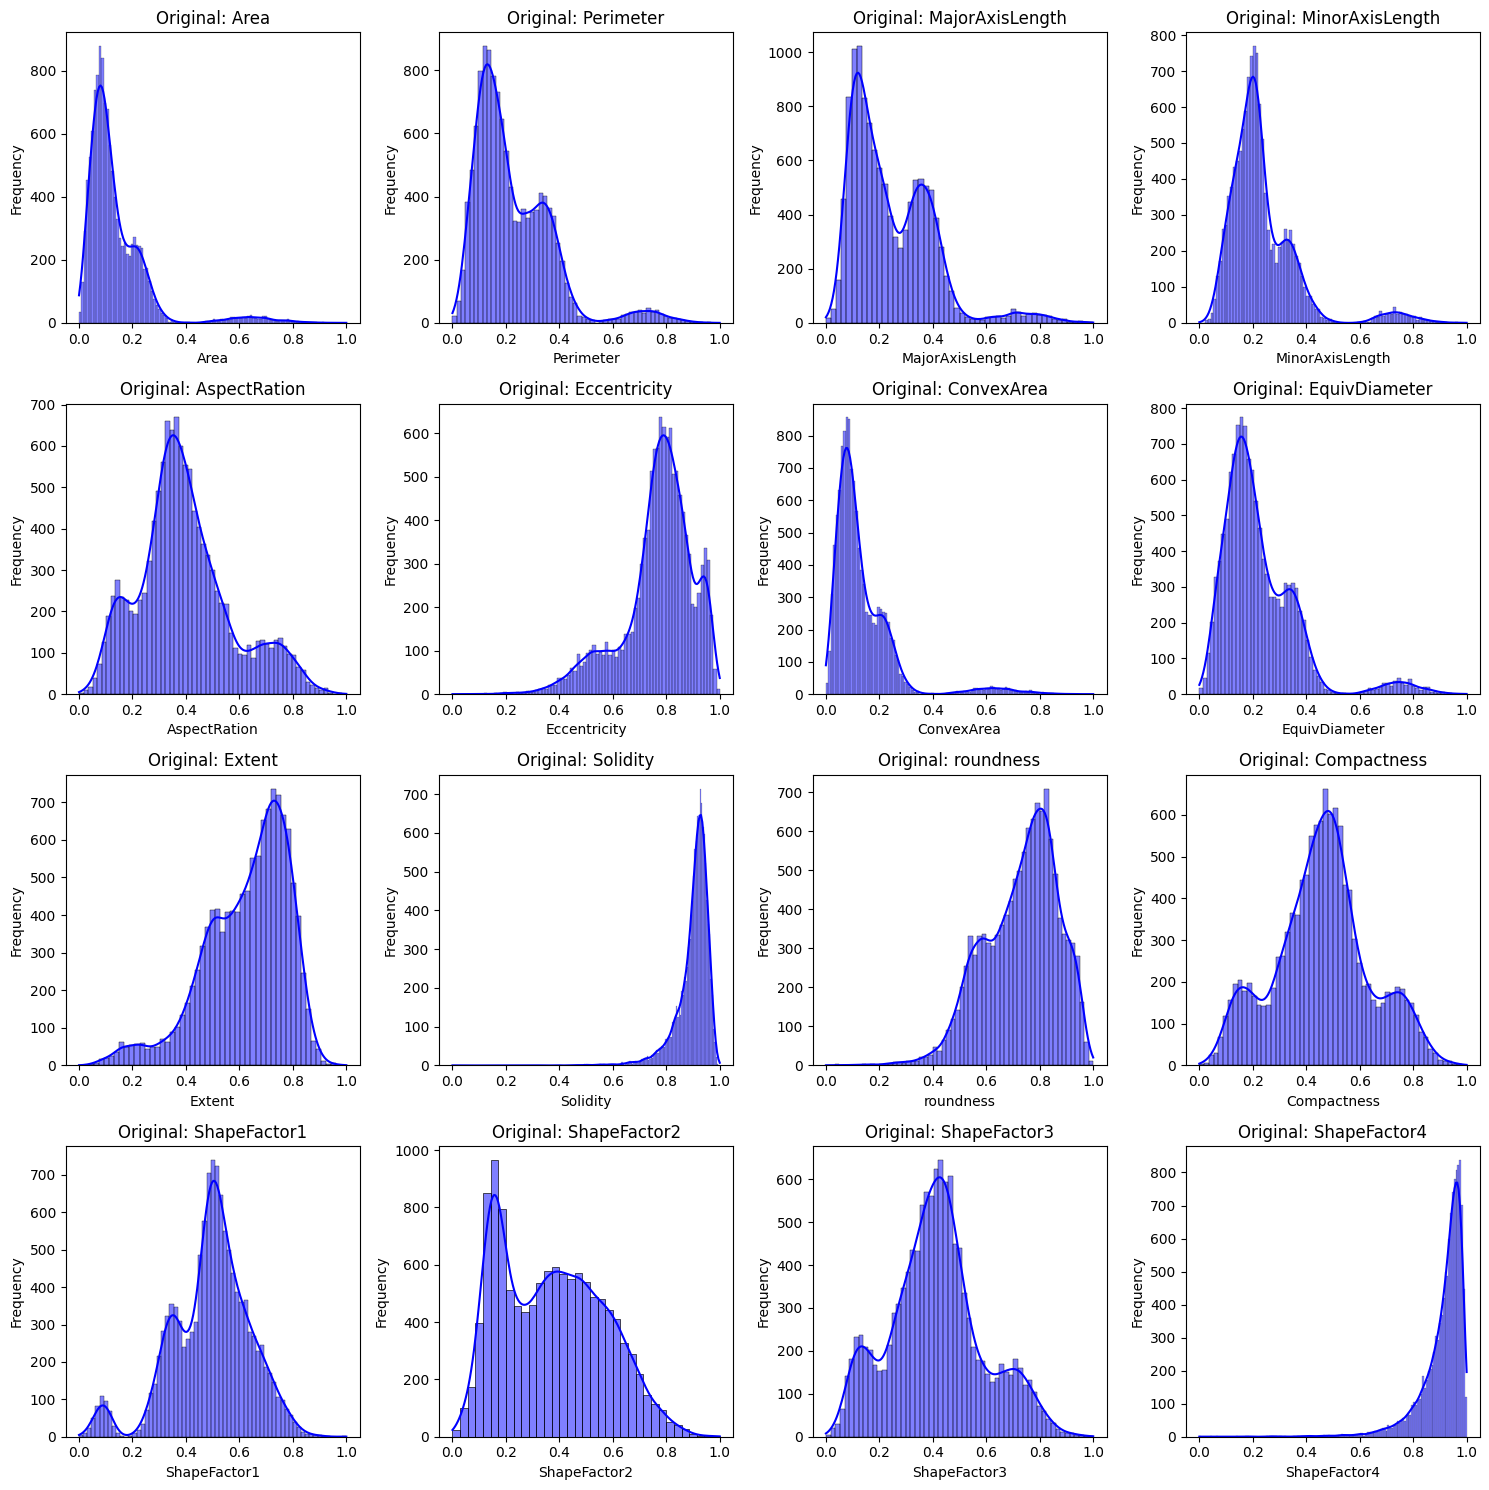

In [61]:
#normalize the training data via min max scaler
#plot the new normalized data distribution to check it out
X_train_MM= Min_Max_It(X_train)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_MM.columns):
    sns.histplot(X_train_MM[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [62]:
#initialize the model
dt_MM = DecisionTreeClassifier(random_state= 24)
#fit the model
dt_MM.fit(X_train_MM, y_train)
#make predictions with the model
y_pred_dt_MM= dt_MM.predict(X_train_MM)

#compare the classification report to the previous models
#compare the classification report to the previous models
print('Base model classification report:')
print(classification_report(y_train, y_pred_dt1))
print()
print('Min_Max Normalized model classification report:')
print(classification_report(y_train, y_pred_dt_MM))

Base model classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9073
           1       1.00      1.00      1.00      3176

    accuracy                           1.00     12249
   macro avg       1.00      1.00      1.00     12249
weighted avg       1.00      1.00      1.00     12249


Min_Max Normalized model classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9073
           1       1.00      1.00      1.00      3176

    accuracy                           1.00     12249
   macro avg       1.00      1.00      1.00     12249
weighted avg       1.00      1.00      1.00     12249



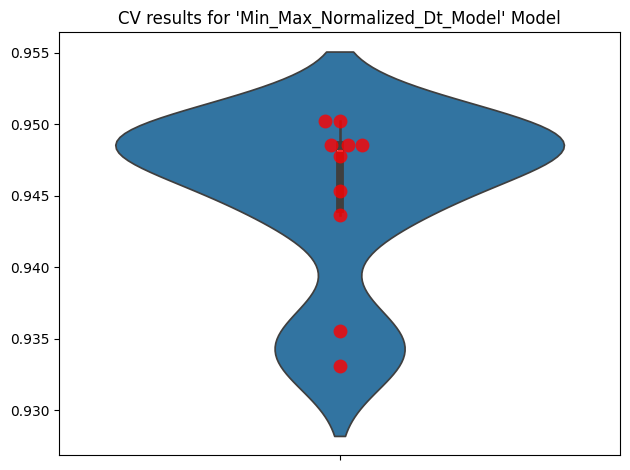

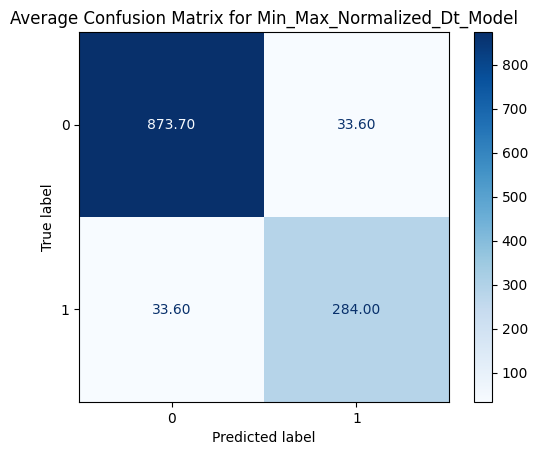

CV results for Min_Max Normalized, Smoted/Randomly Undersampled and tuned model model: 0.95685 +- 0.00518 accuracy
Average specificity: 0.95095
Average precision: 0.95162
Average recall: 0.96275
CV results for Base_Dt_Model model: 0.94555 +- 0.00520 accuracy
Average specificity: 0.96308
Average precision: 0.89476
Average recall: 0.89546
CV results for Min_Max_Normalized_Dt_Model model: 0.94514 +- 0.00578 accuracy
Average specificity: 0.96297
Average precision: 0.89437
Average recall: 0.89420


In [63]:
#instantiate the class
Dt_MM_Norm_model_results= ModelWithCV(model= dt_MM,
                                    model_name= 'Min_Max_Normalized_Dt_Model',
                                    X= X_train_MM,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= Dt_MM_Norm_model_results.plot_cv(ax)
plt.tight_layout()

ax2= Dt_MM_Norm_model_results.plot_avg_conf_matrix()

lr_MM_SR_tuned_model_results.print_cv_summary()
dt_baseline_model_results.print_cv_summary()
Dt_MM_Norm_model_results.print_cv_summary()

this did not help as much as it did with the logistic regression. The DT base is still the best out of the decision trees.

## Fifth DT model: using standard scaler on min max model

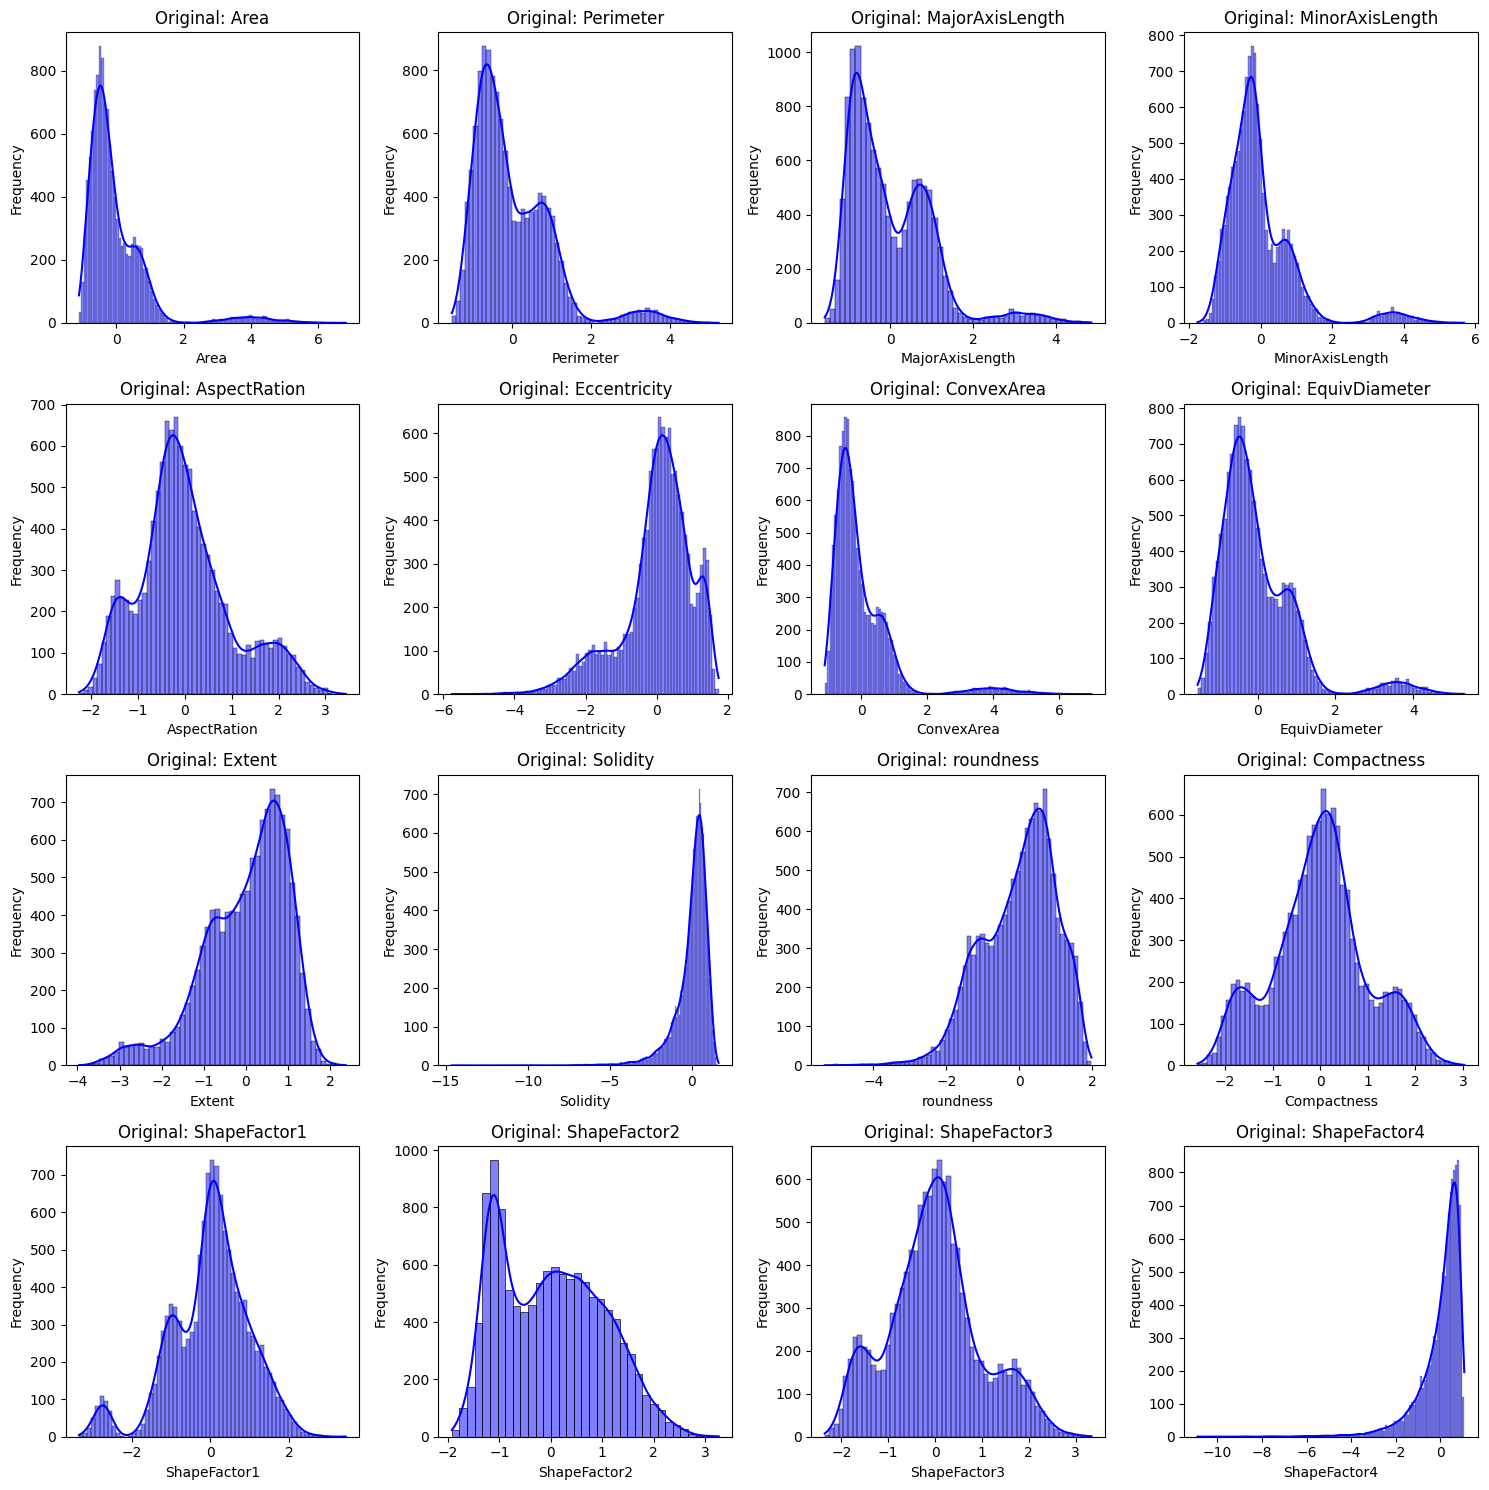

In [64]:
#scale the training data
#plot the new standardized data to check it out
X_train_MM_SC= Scale_It(X_train_MM)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_MM_SC.columns):
    sns.histplot(X_train_MM_SC[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [65]:
#initialize the model
dt_MM_SC = DecisionTreeClassifier(random_state= 24)
#fit the model
dt_MM_SC.fit(X_train_MM_SC, y_train)
#make predictions with the model
y_pred_dt_MM_SC= dt_MM_SC.predict(X_train_MM_SC)

#compare the classification report to the previous models
print('Min_Max Normalized and Scaled model classification report:')
print(classification_report(y_train, y_pred_dt_MM_SC))

Min_Max Normalized and Scaled model classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9073
           1       1.00      1.00      1.00      3176

    accuracy                           1.00     12249
   macro avg       1.00      1.00      1.00     12249
weighted avg       1.00      1.00      1.00     12249



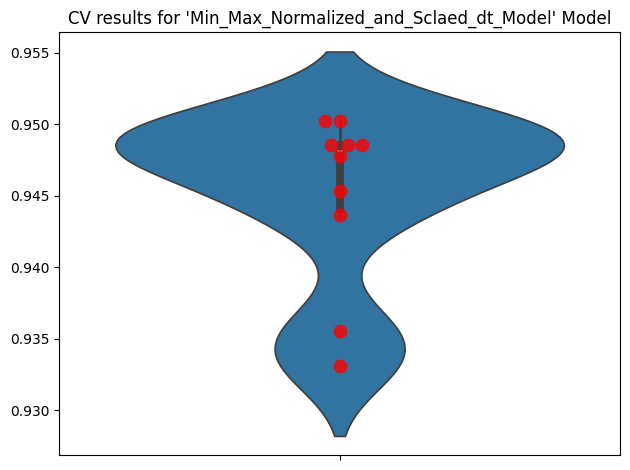

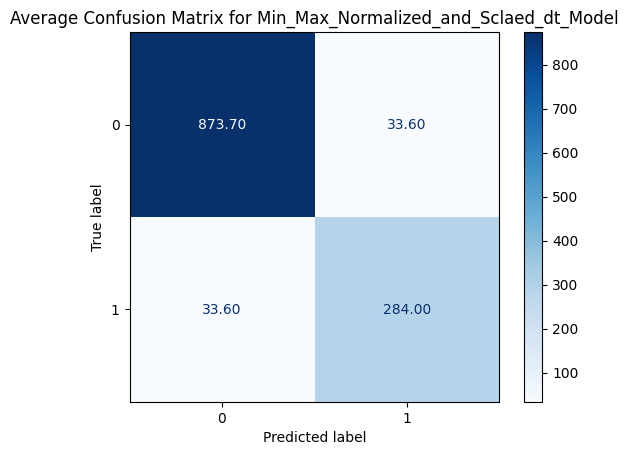

CV results for Min_Max Normalized, Smoted/Randomly Undersampled and tuned model model: 0.95685 +- 0.00518 accuracy
Average specificity: 0.95095
Average precision: 0.95162
Average recall: 0.96275
CV results for Base_Dt_Model model: 0.94555 +- 0.00520 accuracy
Average specificity: 0.96308
Average precision: 0.89476
Average recall: 0.89546
CV results for Min_Max_Normalized_and_Sclaed_dt_Model model: 0.94514 +- 0.00578 accuracy
Average specificity: 0.96297
Average precision: 0.89437
Average recall: 0.89420


In [66]:
#instantiate the class
Dt_SC_MM_Norm_model_results= ModelWithCV(model= dt_MM_SC,
                                    model_name= 'Min_Max_Normalized_and_Sclaed_dt_Model',
                                    X= X_train_MM_SC,
                                    y= y_train)
#plot the results
fig, ax= plt.subplots()

ax1= Dt_SC_MM_Norm_model_results.plot_cv(ax)
plt.tight_layout()

ax2= Dt_SC_MM_Norm_model_results.plot_avg_conf_matrix()

lr_MM_SR_tuned_model_results.print_cv_summary()
dt_baseline_model_results.print_cv_summary()
Dt_SC_MM_Norm_model_results.print_cv_summary()

baseline dt is still the best of the DT

Lets try balancing the classes using smote and Random undersampling

## Sixth DT Model: Smote and Random undersampling of base dt model

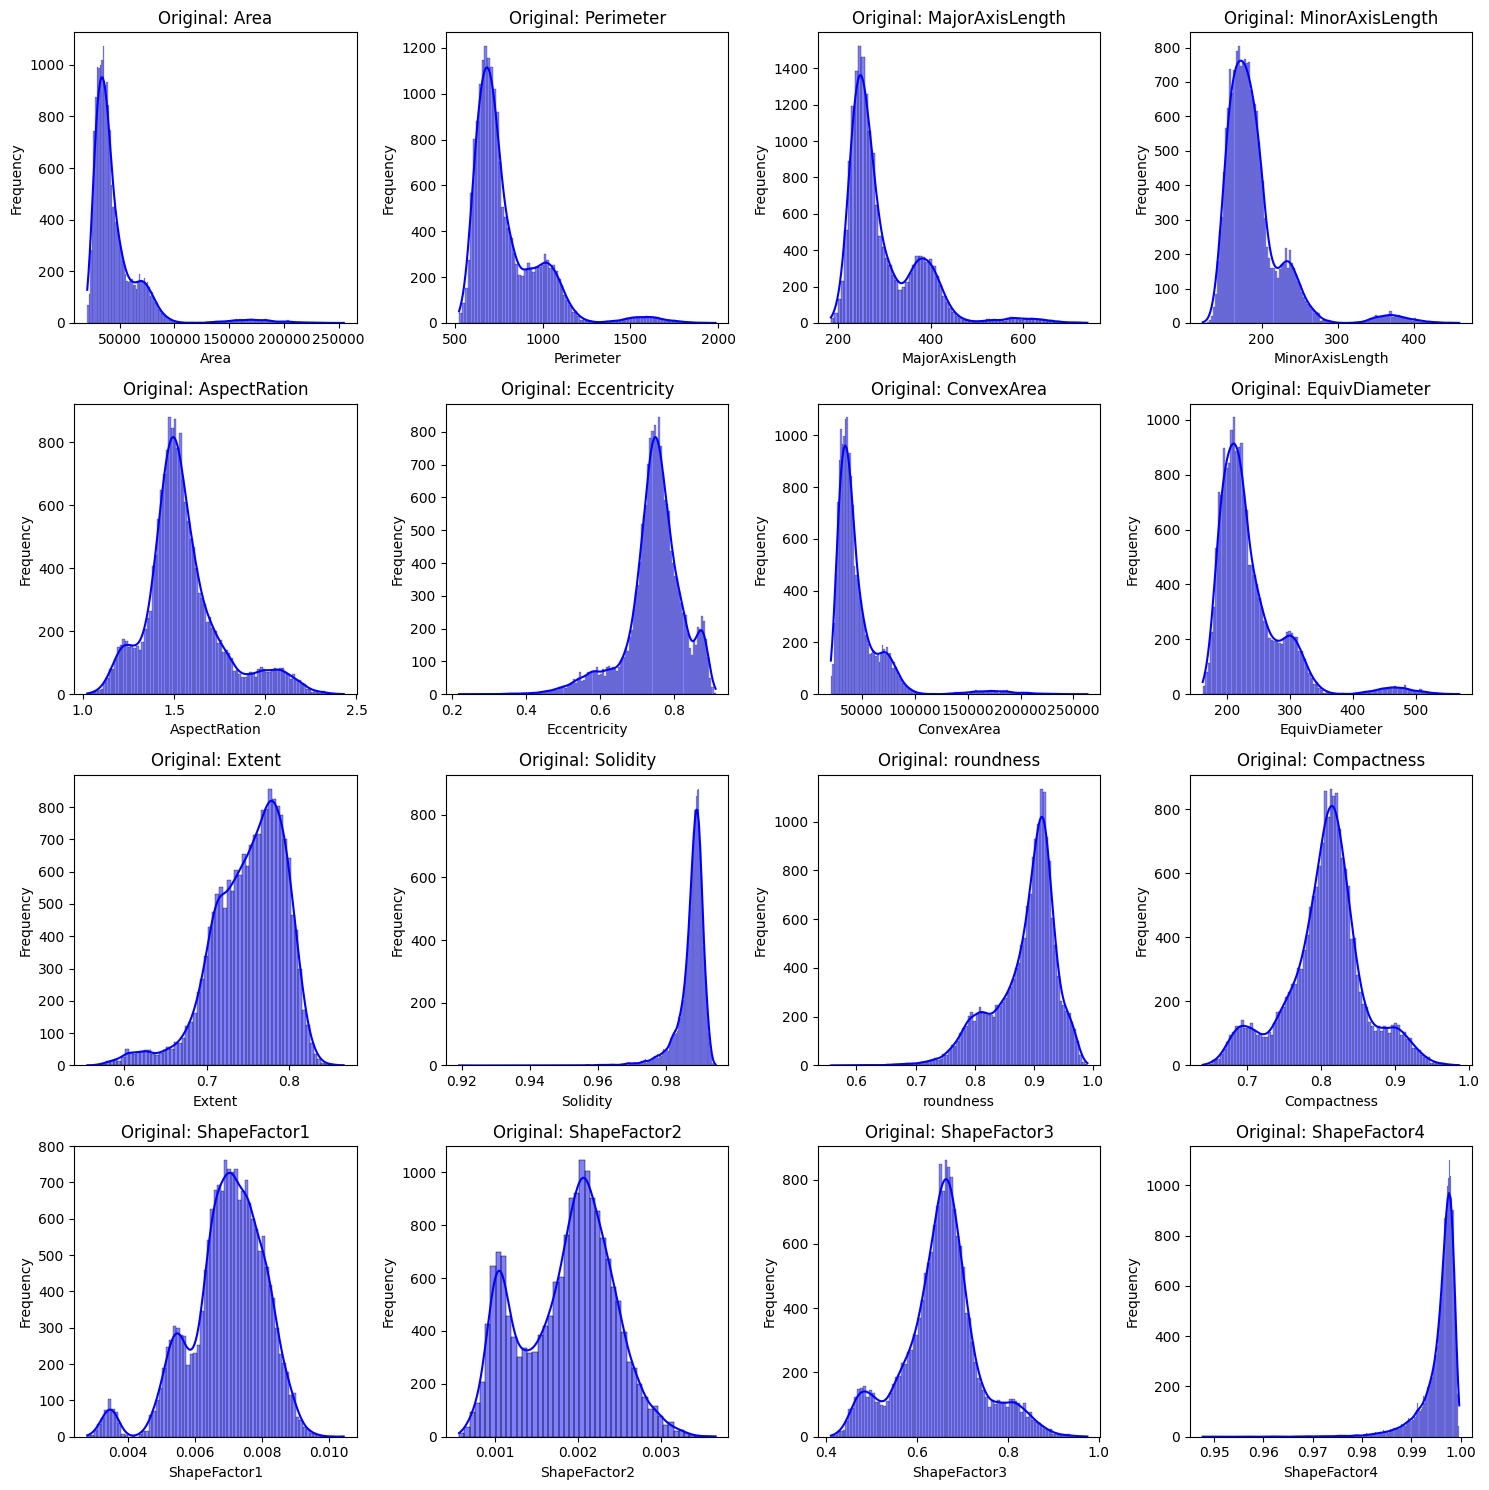

In [67]:
#Smote and Randomly undersample the training data
#plot the new  data distribution to check it out
X_train_SR, y_train_SR= Smote_and_RandUndS(X_train, y_train)

#Create a figure to hold all subplots
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
ax = ax.flatten()

#Plot the original data
for i, col in enumerate(X_train_SR.columns):
    sns.histplot(X_train_SR[col], kde=True, color='blue', ax=ax[i])
    ax[i].set_title(f'Original: {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [68]:
#initialize the model
dt_SR = DecisionTreeClassifier(random_state= 24)
#fit the model
dt_SR.fit(X_train_SR, y_train_SR)
#make predictions with the model
y_pred_dt_SR= dt_SR.predict(X_train_SR)


print('Baseline Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_dt_SR))

Baseline Smoted/Randomly Undersampled model classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9073
           1       1.00      1.00      1.00      9073

    accuracy                           1.00     18146
   macro avg       1.00      1.00      1.00     18146
weighted avg       1.00      1.00      1.00     18146



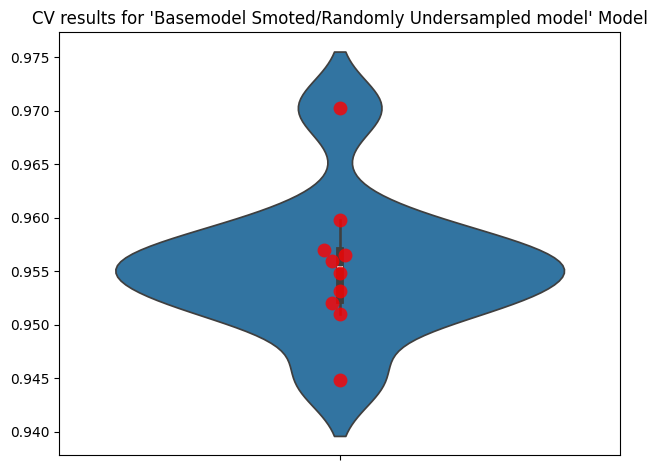

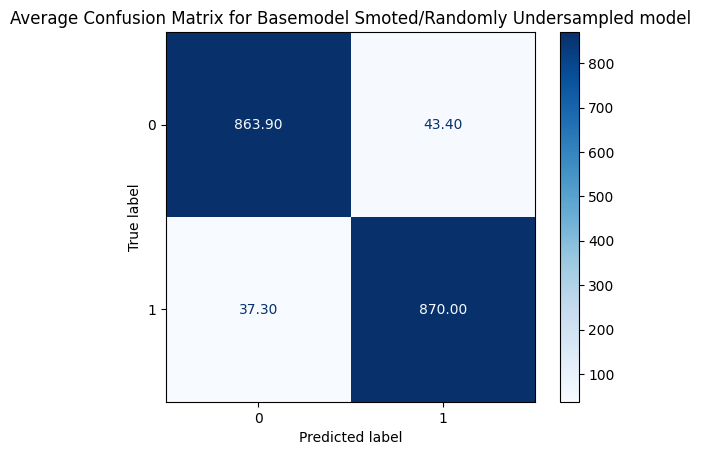

CV results for Min_Max Normalized, Smoted/Randomly Undersampled and tuned model model: 0.95685 +- 0.00518 accuracy
Average specificity: 0.95095
Average precision: 0.95162
Average recall: 0.96275
CV results for Base_Dt_Model model: 0.94555 +- 0.00520 accuracy
Average specificity: 0.96308
Average precision: 0.89476
Average recall: 0.89546
CV results for Basemodel Smoted/Randomly Undersampled model model: 0.95553 +- 0.00625 accuracy
Average specificity: 0.95217
Average precision: 0.95256
Average recall: 0.95889


In [69]:
#instantiate the class
Dt_SR_model_results= ModelWithCV(model= dt_SR,
                                    model_name= 'Basemodel Smoted/Randomly Undersampled model',
                                    X= X_train_SR,
                                    y= y_train_SR)
#plot the results
fig, ax= plt.subplots()

ax1= Dt_SR_model_results.plot_cv(ax)
plt.tight_layout()

ax2= Dt_SR_model_results.plot_avg_conf_matrix()

lr_MM_SR_tuned_model_results.print_cv_summary()
dt_baseline_model_results.print_cv_summary()
Dt_SR_model_results.print_cv_summary()

In [70]:
dt_SR.get_depth()

26

Smoting and randomly undersampling has improved the decision tree model performance to a degree where it is fully outperforming the decision tree baseline model and is outperforming the final tuned logistic regression model in all called metrics minus the recall, but even then it is within roughly 0.004.

the next step to see if we can impove this decision tree model is tuning the hyper parameters. 

## hyper parameter tuning of the smoted and randomly undersampled decision tree model 

### tune the max depth of the tree

In [71]:
max_depths= list(range(1,33))

for n, depth in enumerate(max_depths):
    #instantiate
    Dt_SR_mds = DecisionTreeClassifier(random_state= 24, max_depth=depth)
    #fit
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    #make predictions with the model
    y_pred_Dt_SR_mds= Dt_SR_mds.predict(X_train_SR)

    Dt_SR_mds_model_results= ModelWithCV(model= Dt_SR_mds,
                                model_name= f'max_depth:{depth}, Smoted/Randomly Undersampled DT model',
                                X= X_train_SR,
                                y= y_train_SR)
    
    Dt_SR_mds_model_results.print_cv_summary()

CV results for max_depth:1, Smoted/Randomly Undersampled DT model model: 0.89634 +- 0.00607 accuracy
Average specificity: 0.83148
Average precision: 0.85094
Average recall: 0.96120
CV results for max_depth:2, Smoted/Randomly Undersampled DT model model: 0.94649 +- 0.00463 accuracy
Average specificity: 0.94489
Average precision: 0.94514
Average recall: 0.94809
CV results for max_depth:3, Smoted/Randomly Undersampled DT model model: 0.94770 +- 0.00423 accuracy
Average specificity: 0.93673
Average precision: 0.93816
Average recall: 0.95867
CV results for max_depth:4, Smoted/Randomly Undersampled DT model model: 0.95542 +- 0.00458 accuracy
Average specificity: 0.92814
Average precision: 0.93199
Average recall: 0.98270
CV results for max_depth:5, Smoted/Randomly Undersampled DT model model: 0.95867 +- 0.00428 accuracy
Average specificity: 0.93608
Average precision: 0.93896
Average recall: 0.98126
CV results for max_depth:6, Smoted/Randomly Undersampled DT model model: 0.95790 +- 0.00514 acc

out of these the best performing max depth is 22 with a ACC= .95663 +- .00625, Spec= .95360, prec= .95395, recal= .95966

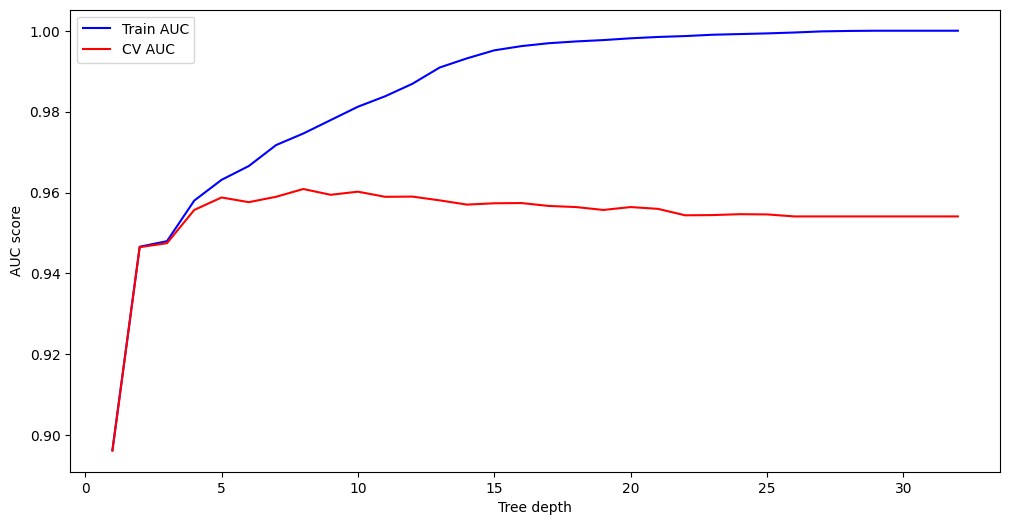

In [74]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

max_depths = list(range(1, 33))
train_results = []
cv_results = []

for max_depth in max_depths:
    Dt_SR_mds = DecisionTreeClassifier(max_depth=max_depth, random_state=24)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_SR, y_pred_train)
    train_roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(train_roc_auc)

    # Now use StratifiedKFold for validation set instead of test set
    cv_roc_aucs = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute AUC for this fold
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val_fold, y_pred_val)
        fold_roc_auc = auc(false_positive_rate, true_positive_rate)
        cv_roc_aucs.append(fold_roc_auc)

    # Compute the average AUC across all folds for the current max_depth
    avg_cv_roc_auc = np.mean(cv_roc_aucs)
    cv_results.append(avg_cv_roc_auc)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, cv_results, 'r', label='CV AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()


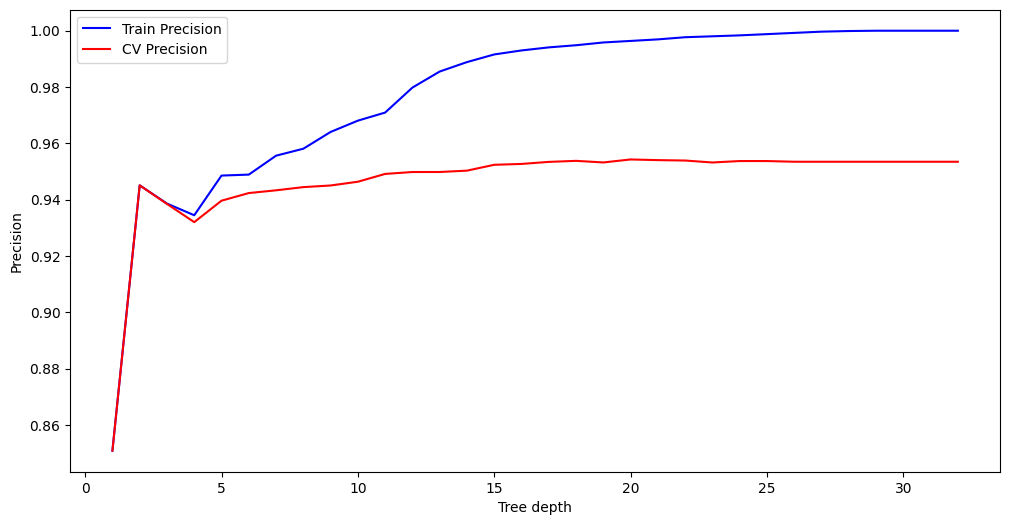

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import numpy as np

# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

max_depths = list(range(1, 33))
train_results = []
cv_results = []

for max_depth in max_depths:
    Dt_SR_mds = DecisionTreeClassifier(max_depth=max_depth, random_state=24)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train Precision')
plt.plot(max_depths, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('Tree depth')
plt.legend()
plt.show()


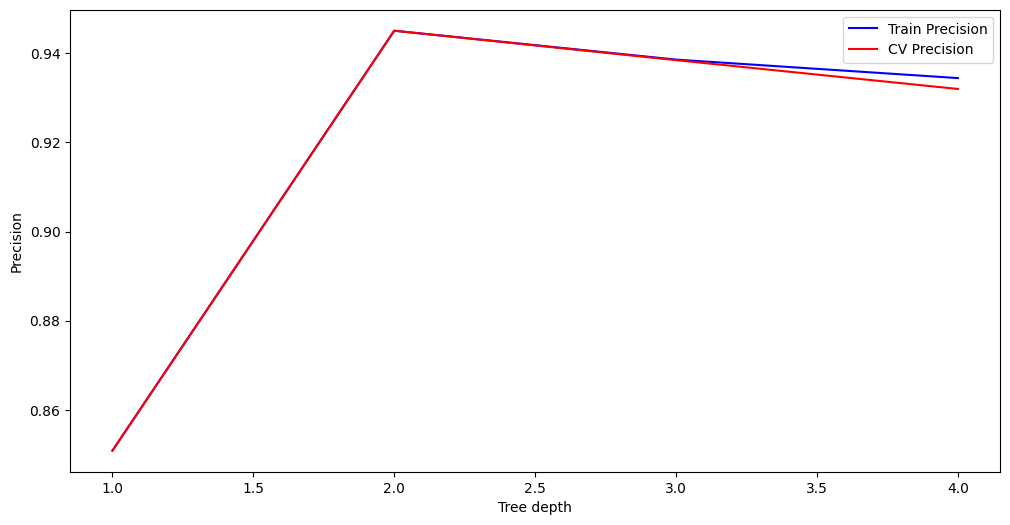

In [76]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

max_depths = list(range(1, 5))
train_results = []
cv_results = []

for max_depth in max_depths:
    Dt_SR_mds = DecisionTreeClassifier(max_depth=max_depth, random_state=24)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train Precision')
plt.plot(max_depths, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

### tune min_samples_split

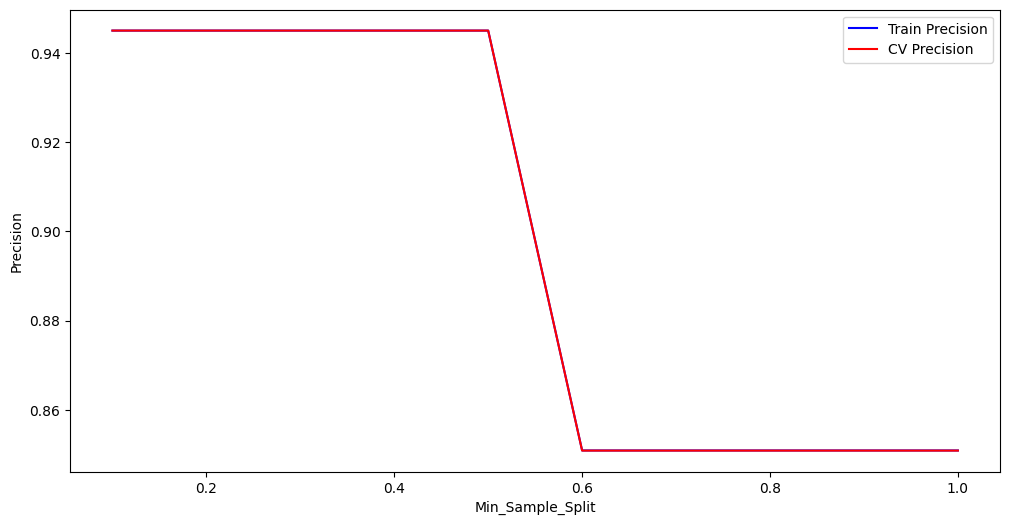

In [77]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
cv_results = []

for samp_split in min_samples_splits:
    Dt_SR_mds = DecisionTreeClassifier(max_depth=2, random_state=24, min_samples_split=samp_split)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train Precision')
plt.plot(min_samples_splits, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('Min_Sample_Split')
plt.legend()
plt.show()

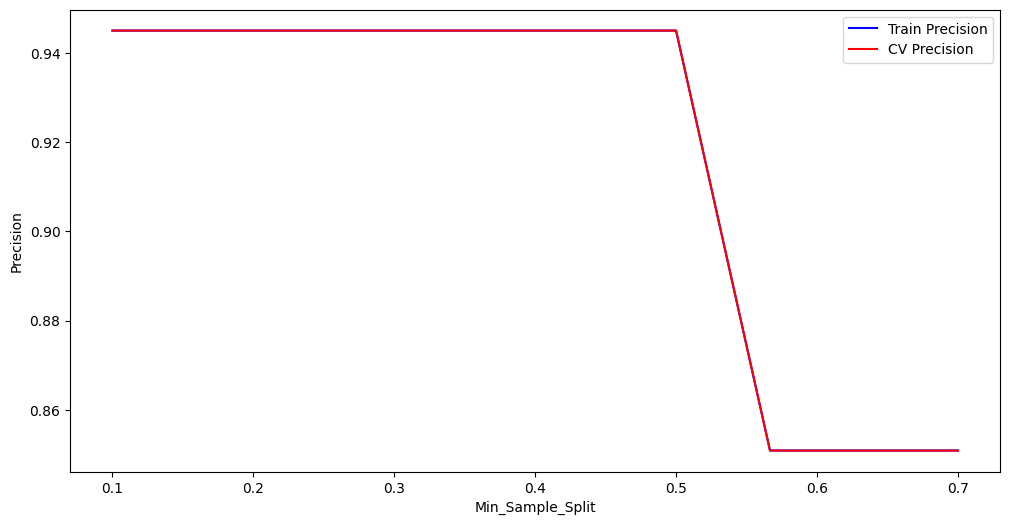

In [78]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

min_samples_splits = np.linspace(0.1, 0.7, 10, endpoint=True)
train_results = []
cv_results = []

for samp_split in min_samples_splits:
    Dt_SR_mds = DecisionTreeClassifier(max_depth=2, random_state=24, min_samples_split=samp_split)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train Precision')
plt.plot(min_samples_splits, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('Min_Sample_Split')
plt.legend()
plt.show()

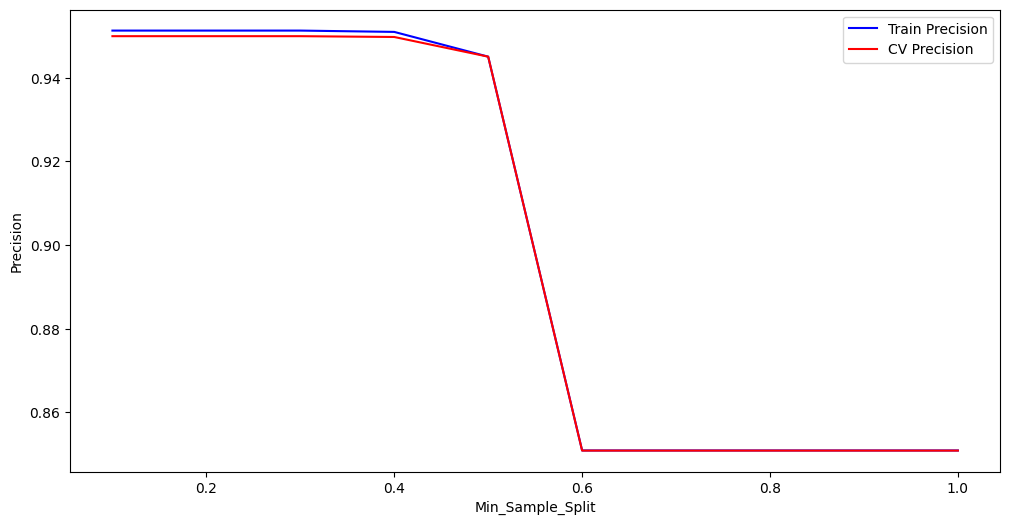

In [79]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
cv_results = []

for samp_split in min_samples_splits:
    Dt_SR_mds = DecisionTreeClassifier(max_depth=22, random_state=24, min_samples_split=samp_split)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train Precision')
plt.plot(min_samples_splits, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('Min_Sample_Split')
plt.legend()
plt.show()

### tune criterion

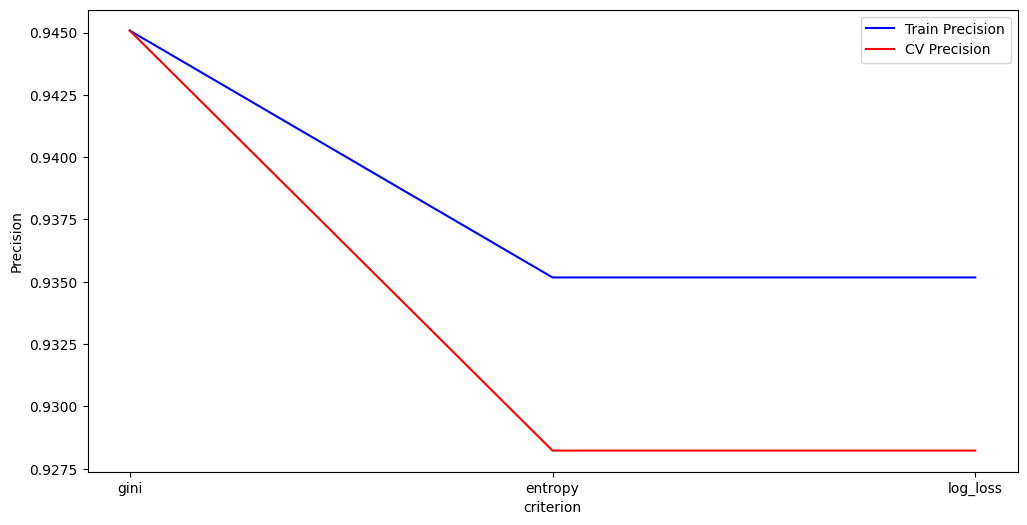

In [80]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

criterions = ['gini', 'entropy', 'log_loss']
train_results = []
cv_results = []

for crit in criterions:
    Dt_SR_mds = DecisionTreeClassifier(random_state=24, criterion=crit, max_depth= 2, min_samples_split= 0.5)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(criterions, train_results, 'b', label='Train Precision')
plt.plot(criterions, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('criterion')
plt.legend()
plt.show()

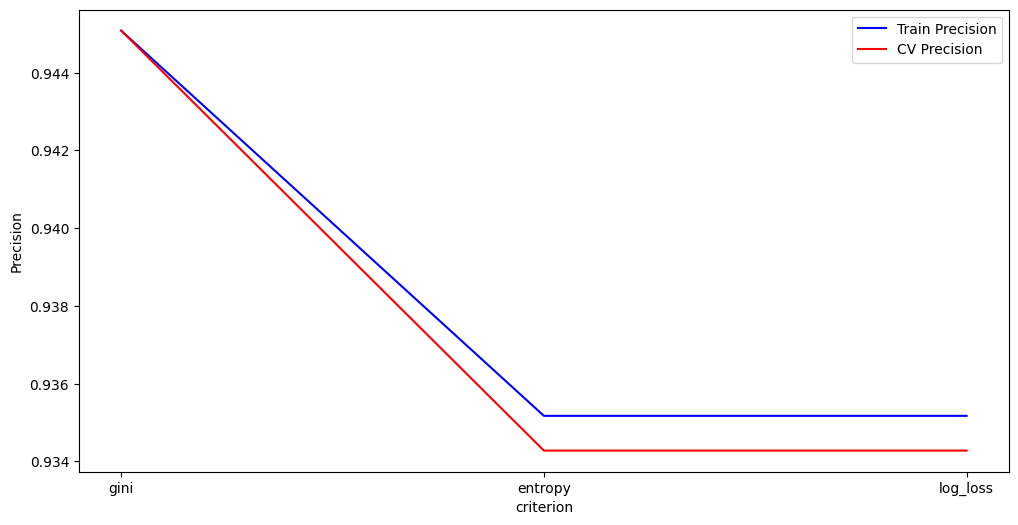

In [81]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

criterions = ['gini', 'entropy', 'log_loss']
train_results = []
cv_results = []

for crit in criterions:
    Dt_SR_mds = DecisionTreeClassifier(random_state=24, criterion=crit, max_depth= 22, min_samples_split= 0.5)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(criterions, train_results, 'b', label='Train Precision')
plt.plot(criterions, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('criterion')
plt.legend()
plt.show()

### tune minimum leaf samples

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


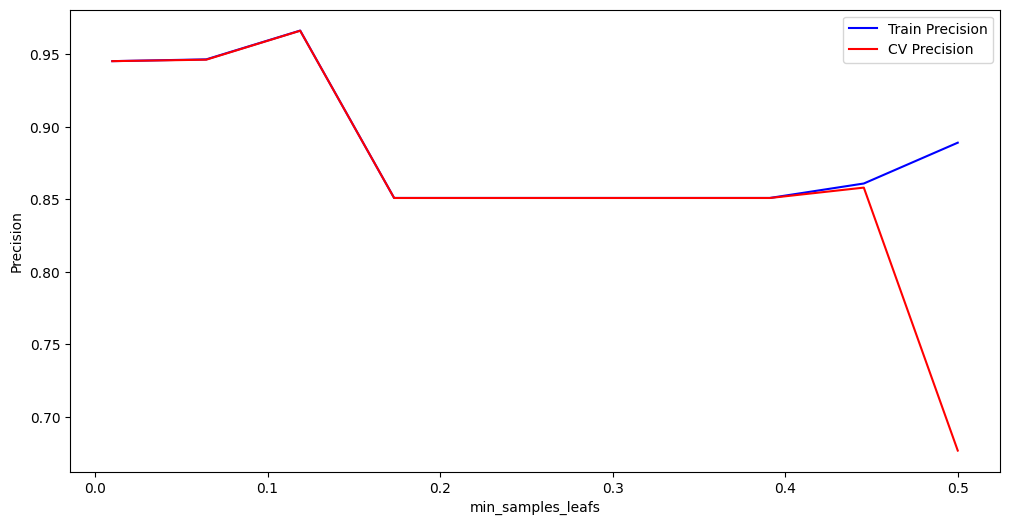

In [82]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

min_samples_leafs = np.linspace(0.01, 0.5, 10, endpoint=True)
train_results = []
cv_results = []

for leafs in min_samples_leafs:
    Dt_SR_mds = DecisionTreeClassifier(random_state=24, criterion='gini', max_depth= 2,
                                       min_samples_split= 0.5, min_samples_leaf= leafs)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train Precision')
plt.plot(min_samples_leafs, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('min_samples_leafs')
plt.legend()
plt.show()

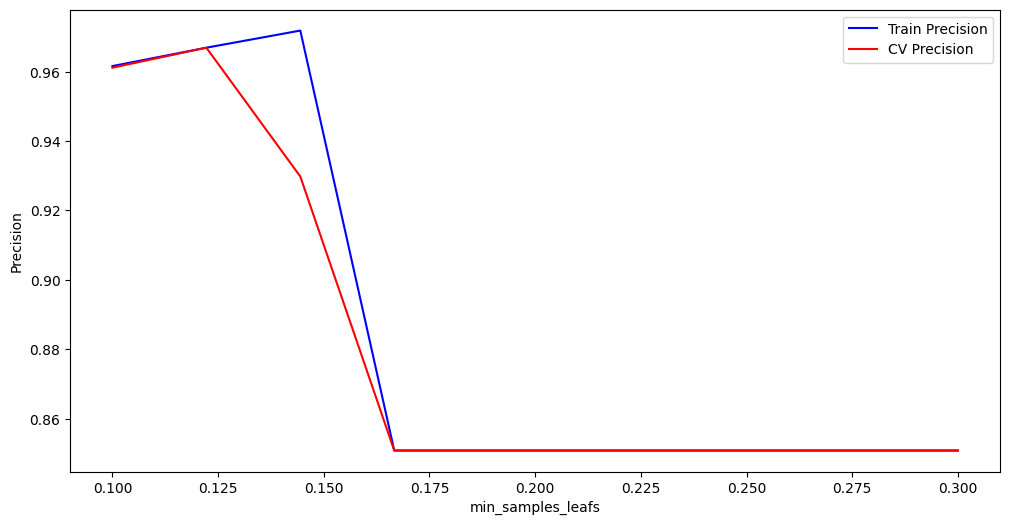

In [83]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

min_samples_leafs = np.linspace(0.1, 0.3, 10, endpoint=True)
train_results = []
cv_results = []

for leafs in min_samples_leafs:
    Dt_SR_mds = DecisionTreeClassifier(random_state=24, criterion='gini', max_depth= 2,
                                       min_samples_split= 0.5, min_samples_leaf= leafs)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train Precision')
plt.plot(min_samples_leafs, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('min_samples_leafs')
plt.legend()
plt.show()

/opt/anaconda3/envs/my_py_3_8_5_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


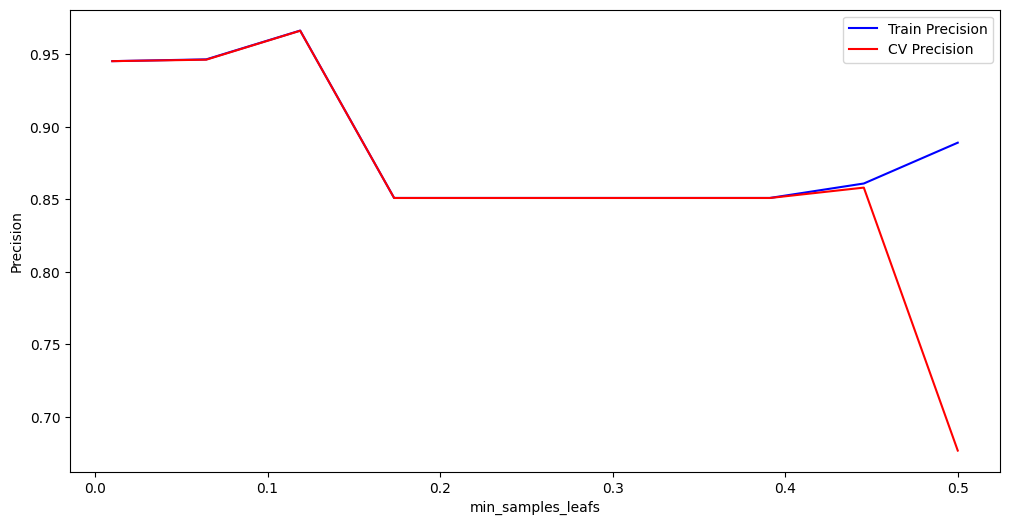

In [84]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

min_samples_leafs = np.linspace(0.01, 0.5, 10, endpoint=True)
train_results = []
cv_results = []

for leafs in min_samples_leafs:
    Dt_SR_mds = DecisionTreeClassifier(random_state=24, criterion='gini', max_depth= 22,
                                       min_samples_split= 0.5, min_samples_leaf= leafs)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train Precision')
plt.plot(min_samples_leafs, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('min_samples_leafs')
plt.legend()
plt.show()

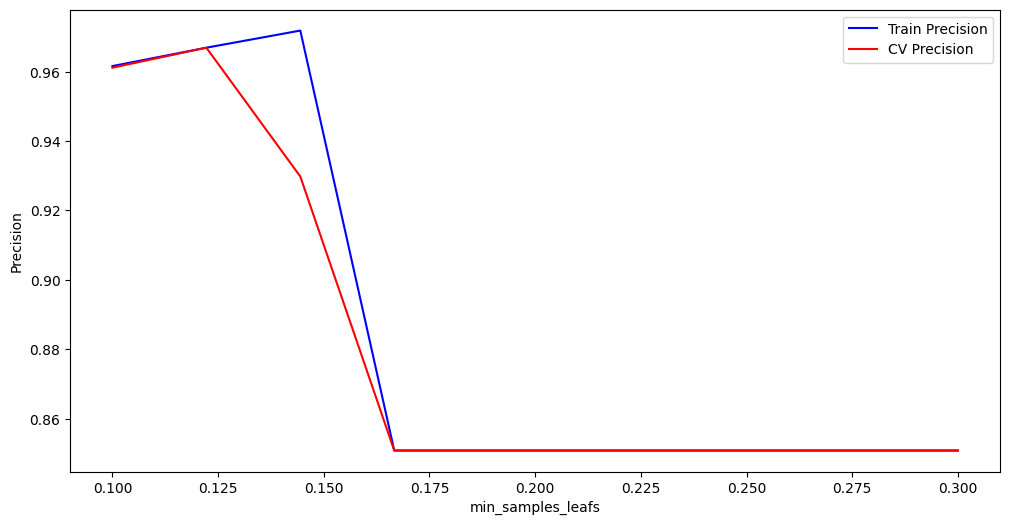

In [85]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

min_samples_leafs = np.linspace(0.1, 0.3, 10, endpoint=True)
train_results = []
cv_results = []

for leafs in min_samples_leafs:
    Dt_SR_mds = DecisionTreeClassifier(random_state=24, criterion='gini', max_depth= 2,
                                       min_samples_split= 0.5, min_samples_leaf= leafs)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train Precision')
plt.plot(min_samples_leafs, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('min_samples_leafs')
plt.legend()
plt.show()

### tune maximum features

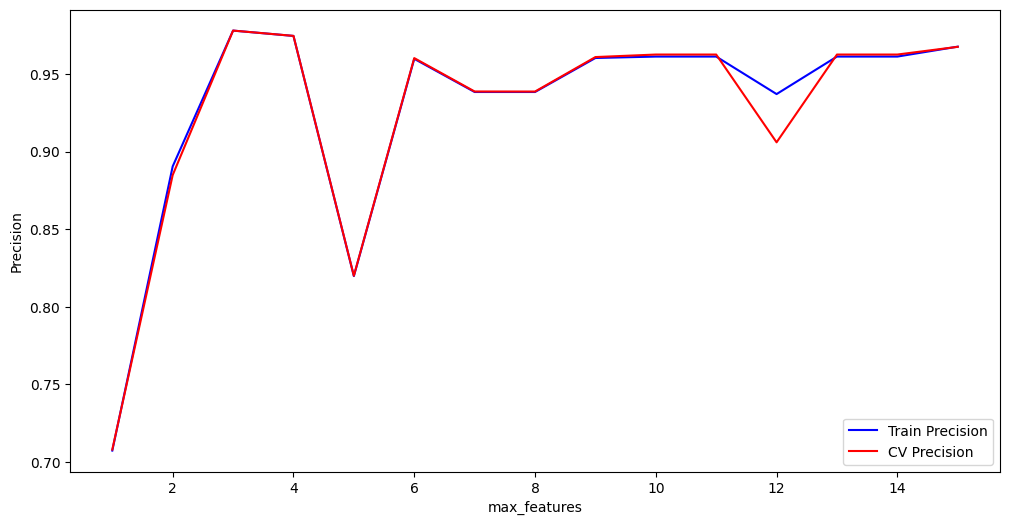

In [86]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

max_feature_num = list(range(1, X_train_SR.shape[1]))
train_results = []
cv_results = []

for max_feat in max_feature_num:
    Dt_SR_mds = DecisionTreeClassifier(random_state=24, criterion='gini', max_depth= 2,
                                       min_samples_split= 0.5, min_samples_leaf= 0.125,
                                      max_features= max_feat)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(max_feature_num, train_results, 'b', label='Train Precision')
plt.plot(max_feature_num, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('max_features')
plt.legend()
plt.show()

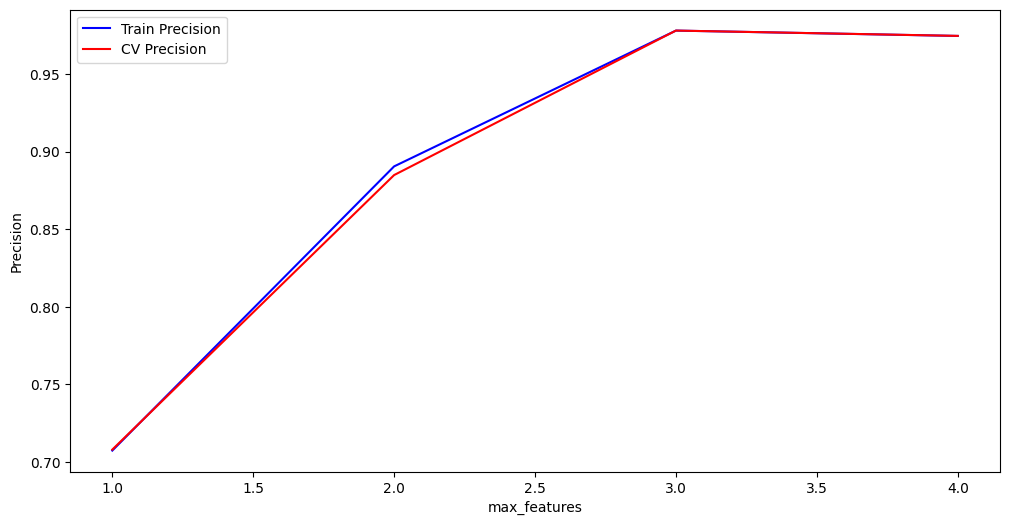

In [87]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

max_feature_num = list(range(1, 5))
train_results = []
cv_results = []

for max_feat in max_feature_num:
    Dt_SR_mds = DecisionTreeClassifier(random_state=24, criterion='gini', max_depth= 2,
                                       min_samples_split= 0.5, min_samples_leaf= 0.125,
                                      max_features= max_feat)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(max_feature_num, train_results, 'b', label='Train Precision')
plt.plot(max_feature_num, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('max_features')
plt.legend()
plt.show()

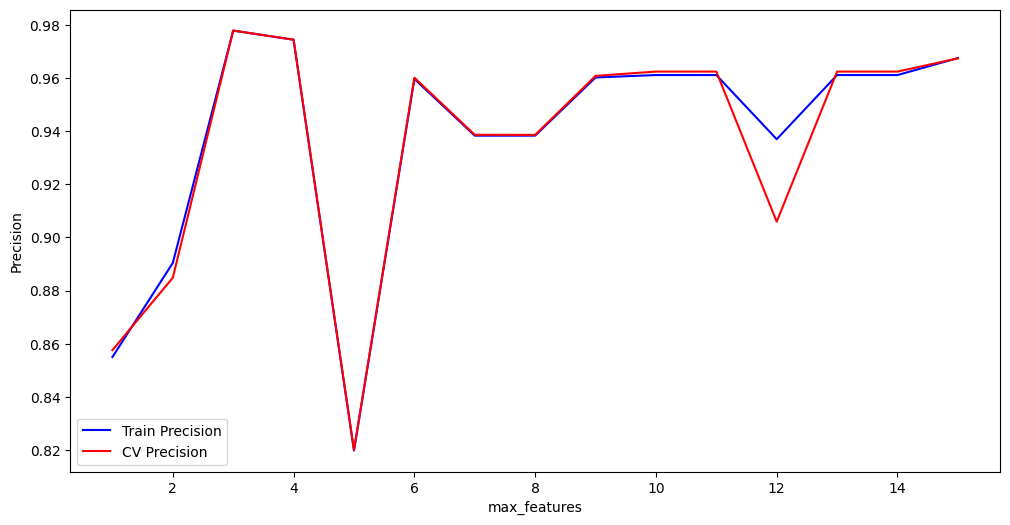

In [88]:
# Create a Stratified KFold cross-validator with 6 splits
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=24)

max_feature_num = list(range(1, X_train_SR.shape[1]))
train_results = []
cv_results = []

for max_feat in max_feature_num:
    Dt_SR_mds = DecisionTreeClassifier(random_state=24, criterion='gini', max_depth= 22,
                                       min_samples_split= 0.5, min_samples_leaf= 0.125,
                                      max_features= max_feat)
    
    # Train the model
    Dt_SR_mds.fit(X_train_SR, y_train_SR)
    
    # Predict training data (same as original)
    y_pred_train = Dt_SR_mds.predict(X_train_SR)
    
    # Compute Precision for the training set
    train_precision = precision_score(y_train_SR, y_pred_train)
    train_results.append(train_precision)

    # Now use StratifiedKFold for validation set instead of test set
    cv_precisions = []
    
    for train_idx, val_idx in kf.split(X_train_SR, y_train_SR):
        X_train_fold, X_val_fold = X_train_SR.iloc[train_idx], X_train_SR.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_SR.iloc[train_idx], y_train_SR.iloc[val_idx]
        
        # Fit the model on each fold's training data
        Dt_SR_mds.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_pred_val = Dt_SR_mds.predict(X_val_fold)
        
        # Compute Precision for this fold
        fold_precision = precision_score(y_val_fold, y_pred_val)
        cv_precisions.append(fold_precision)

    # Compute the average Precision across all folds for the current max_depth
    avg_cv_precision = np.mean(cv_precisions)
    cv_results.append(avg_cv_precision)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(max_feature_num, train_results, 'b', label='Train Precision')
plt.plot(max_feature_num, cv_results, 'r', label='CV Precision')
plt.ylabel('Precision')
plt.xlabel('max_features')
plt.legend()
plt.show()

### throw the two best models in the cross validation model examiner

#### Model A

In [89]:
#initialize the model
dt_SR_Tuned_A = DecisionTreeClassifier(random_state=24, criterion='gini', max_depth= 2,
                                       min_samples_split= 0.5, min_samples_leaf= 0.125,
                                      max_features= 3)
#fit the model
dt_SR_Tuned_A.fit(X_train_SR, y_train_SR)
#make predictions with the model
y_pred_dt_SR_Tuned_A= dt_SR_Tuned_A.predict(X_train_SR)

#compare the classification report to the previous models
print('Log_Reg Min_Max Normalized and Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_SR_tuned))
print('DT Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_dt_SR))
print('DT Smoted/Randomly Undersampled then Hyperparmeter tuned A model classification report:')
print(classification_report(y_train_SR, y_pred_dt_SR_Tuned_A))

Log_Reg Min_Max Normalized and Smoted/Randomly Undersampled model classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9073
           1       0.95      0.96      0.96      9073

    accuracy                           0.96     18146
   macro avg       0.96      0.96      0.96     18146
weighted avg       0.96      0.96      0.96     18146

DT Smoted/Randomly Undersampled model classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9073
           1       1.00      1.00      1.00      9073

    accuracy                           1.00     18146
   macro avg       1.00      1.00      1.00     18146
weighted avg       1.00      1.00      1.00     18146

DT Smoted/Randomly Undersampled then Hyperparmeter tuned A model classification report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      9073

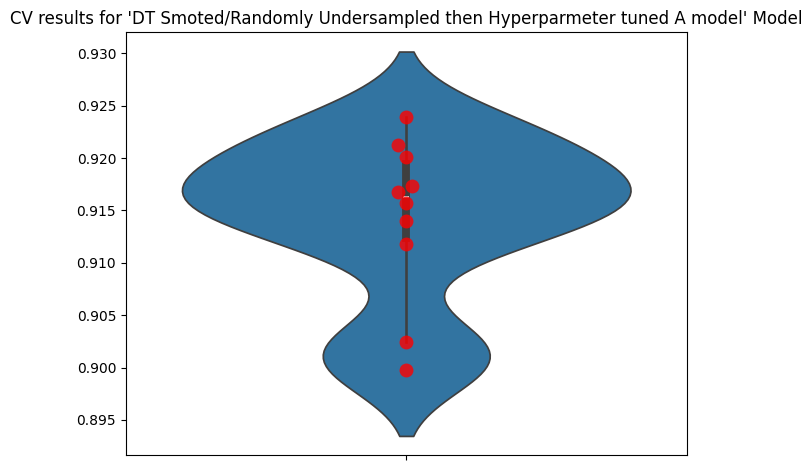

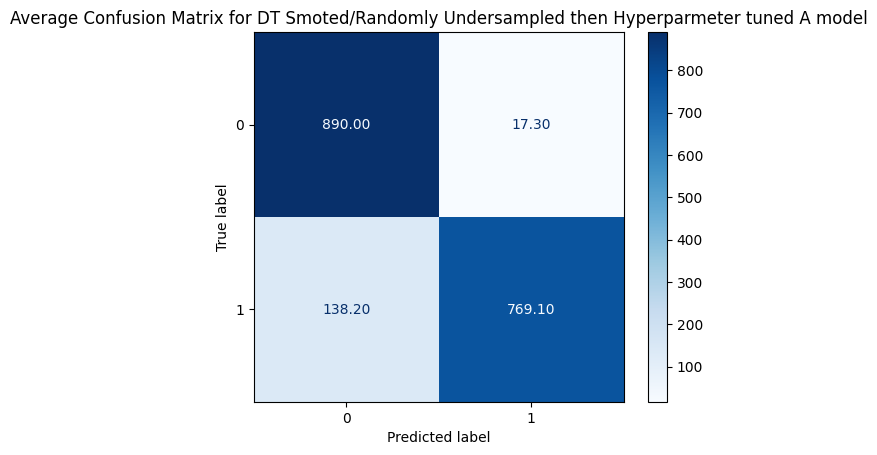

CV results for Min_Max Normalized, Smoted/Randomly Undersampled and tuned model model: 0.95685 +- 0.00518 accuracy
Average specificity: 0.95095
Average precision: 0.95162
Average recall: 0.96275
CV results for Base_Dt_Model model: 0.94555 +- 0.00520 accuracy
Average specificity: 0.96308
Average precision: 0.89476
Average recall: 0.89546
CV results for Basemodel Smoted/Randomly Undersampled model model: 0.95553 +- 0.00625 accuracy
Average specificity: 0.95217
Average precision: 0.95256
Average recall: 0.95889
CV results for DT Smoted/Randomly Undersampled then Hyperparmeter tuned A model model: 0.91431 +- 0.00742 accuracy
Average specificity: 0.98093
Average precision: 0.97802
Average recall: 0.84768


In [90]:
#instantiate the class
Dt_SR_Tuned_model_results_A= ModelWithCV(model= dt_SR_Tuned_A,
                                    model_name= 'DT Smoted/Randomly Undersampled then Hyperparmeter tuned A model',
                                    X= X_train_SR,
                                    y= y_train_SR)
#plot the results
fig, ax= plt.subplots()

ax1= Dt_SR_Tuned_model_results_A.plot_cv(ax)
plt.tight_layout()

ax2= Dt_SR_Tuned_model_results_A.plot_avg_conf_matrix()

lr_MM_SR_tuned_model_results.print_cv_summary()
dt_baseline_model_results.print_cv_summary()
Dt_SR_model_results.print_cv_summary()
Dt_SR_Tuned_model_results_A.print_cv_summary()

#### Model B

In [91]:
#initialize the model
dt_SR_Tuned_B = DecisionTreeClassifier(random_state=24, criterion='gini', max_depth= 22,
                                       min_samples_split= 0.5, min_samples_leaf= 0.125,
                                      max_features= 3)
#fit the model
dt_SR_Tuned_B.fit(X_train_SR, y_train_SR)
#make predictions with the model
y_pred_dt_SR_Tuned_B= dt_SR_Tuned_B.predict(X_train_SR)

#compare the classification report to the previous models
print('Log_Reg Min_Max Normalized and Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_SR_tuned))
print('DT Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_dt_SR))
print('DT Smoted/Randomly Undersampled then Hyperparmeter tuned A model classification report:')
print(classification_report(y_train_SR, y_pred_dt_SR_Tuned_A))
print('DT Smoted/Randomly Undersampled then Hyperparmeter tuned B model classification report:')
print(classification_report(y_train_SR, y_pred_dt_SR_Tuned_B))

Log_Reg Min_Max Normalized and Smoted/Randomly Undersampled model classification report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9073
           1       0.95      0.96      0.96      9073

    accuracy                           0.96     18146
   macro avg       0.96      0.96      0.96     18146
weighted avg       0.96      0.96      0.96     18146

DT Smoted/Randomly Undersampled model classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9073
           1       1.00      1.00      1.00      9073

    accuracy                           1.00     18146
   macro avg       1.00      1.00      1.00     18146
weighted avg       1.00      1.00      1.00     18146

DT Smoted/Randomly Undersampled then Hyperparmeter tuned A model classification report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      9073

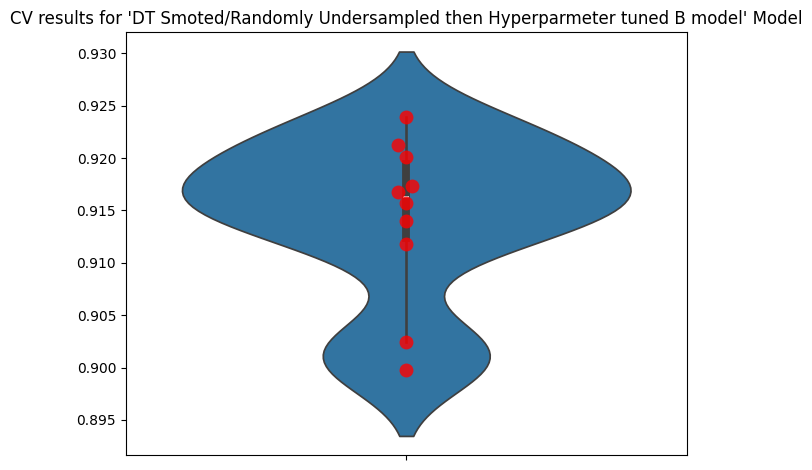

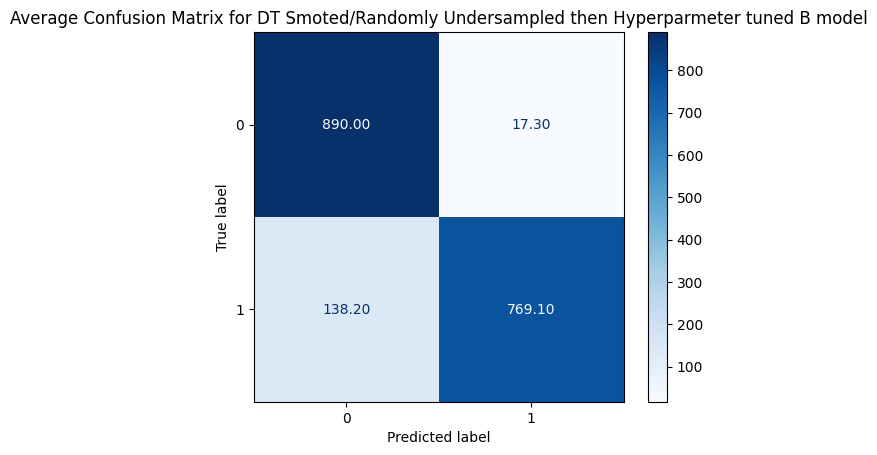

CV results for Min_Max Normalized, Smoted/Randomly Undersampled and tuned model model: 0.95685 +- 0.00518 accuracy
Average specificity: 0.95095
Average precision: 0.95162
Average recall: 0.96275
CV results for Base_Dt_Model model: 0.94555 +- 0.00520 accuracy
Average specificity: 0.96308
Average precision: 0.89476
Average recall: 0.89546
CV results for Basemodel Smoted/Randomly Undersampled model model: 0.95553 +- 0.00625 accuracy
Average specificity: 0.95217
Average precision: 0.95256
Average recall: 0.95889
CV results for DT Smoted/Randomly Undersampled then Hyperparmeter tuned A model model: 0.91431 +- 0.00742 accuracy
Average specificity: 0.98093
Average precision: 0.97802
Average recall: 0.84768
CV results for DT Smoted/Randomly Undersampled then Hyperparmeter tuned B model model: 0.91431 +- 0.00742 accuracy
Average specificity: 0.98093
Average precision: 0.97802
Average recall: 0.84768


In [92]:
#instantiate the class
Dt_SR_Tuned_model_results_B= ModelWithCV(model= dt_SR_Tuned_B,
                                    model_name= 'DT Smoted/Randomly Undersampled then Hyperparmeter tuned B model',
                                    X= X_train_SR,
                                    y= y_train_SR)
#plot the results
fig, ax= plt.subplots()

ax1= Dt_SR_Tuned_model_results_B.plot_cv(ax)
plt.tight_layout()

ax2= Dt_SR_Tuned_model_results_B.plot_avg_conf_matrix()

lr_MM_SR_tuned_model_results.print_cv_summary()
dt_baseline_model_results.print_cv_summary()
Dt_SR_model_results.print_cv_summary()
Dt_SR_Tuned_model_results_A.print_cv_summary()
Dt_SR_Tuned_model_results_B.print_cv_summary()

now that the most effective model has been found, run it on the test set to get your final results

# Run Model on the test data set

In [98]:
final_model= dt_SR_Tuned_A

#Smote and Randomly undersample the training data
X_train_SR, y_train_SR= Smote_and_RandUndS(X_train, y_train)

final_model.fit(X_train_SR, y_train_SR)

DecisionTreeClassifier(max_depth=2, max_features=3, min_samples_leaf=0.125,
                       min_samples_split=0.5, random_state=24)

In [99]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

class Model_with_final():
    def __init__(self, model, model_name, X_train, y_train, X_test, y_test):
        self.model = model
        self.name = model_name
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.final_results = None
        self.final_accuracy = None
        self.final_specificity = None
        self.final_precision = None
        self.final_recall = None
        self.final_conf_matrix = None
        
        # Train the model and make predictions on the final test set
        self.train_and_evaluate()

    def train_and_evaluate(self):
        """
        Train the model on the training data and evaluate on the test data.
        """
        # Train the model on the training data
        self.model.fit(self.X_train, self.y_train)
        
        # Predict on the test data
        y_pred = self.model.predict(self.X_test)
        
        # Compute performance metrics on the test set
        self.final_accuracy = accuracy_score(self.y_test, y_pred)
        
        # Compute the confusion matrix
        self.final_conf_matrix = confusion_matrix(self.y_test, y_pred)
        
        # Compute specificity (TN / (TN + FP))
        TN, FP, FN, TP = self.final_conf_matrix.ravel()
        self.final_specificity = TN / (TN + FP)
        
        # Compute precision and recall
        self.final_precision = precision_score(self.y_test, y_pred)
        self.final_recall = recall_score(self.y_test, y_pred)
        
        self.final_results = {
            'Accuracy': self.final_accuracy,
            'Specificity': self.final_specificity,
            'Precision': self.final_precision,
            'Recall': self.final_recall
        }

    def print_final_summary(self):
        """
        Print the final results (accuracy, specificity, precision, recall).
        """
        print(f"Final results for {self.name} model on X_test:")
        print(f"Accuracy: {self.final_accuracy:.5f}")
        print(f"Specificity: {self.final_specificity:.5f}")
        print(f"Precision: {self.final_precision:.5f}")
        print(f"Recall: {self.final_recall:.5f}")

    def plot_conf_matrix(self):
        """
        Plot the confusion matrix using ConfusionMatrixDisplay.
        """
        if self.final_conf_matrix is not None:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.final_conf_matrix)
            disp.plot(cmap=plt.cm.Blues, values_format='.2f')
            plt.title(f"Confusion Matrix for {self.name} on X_test")
            plt.show()
        else:
            print("Confusion matrix is not available. Please run model evaluation first.")
            

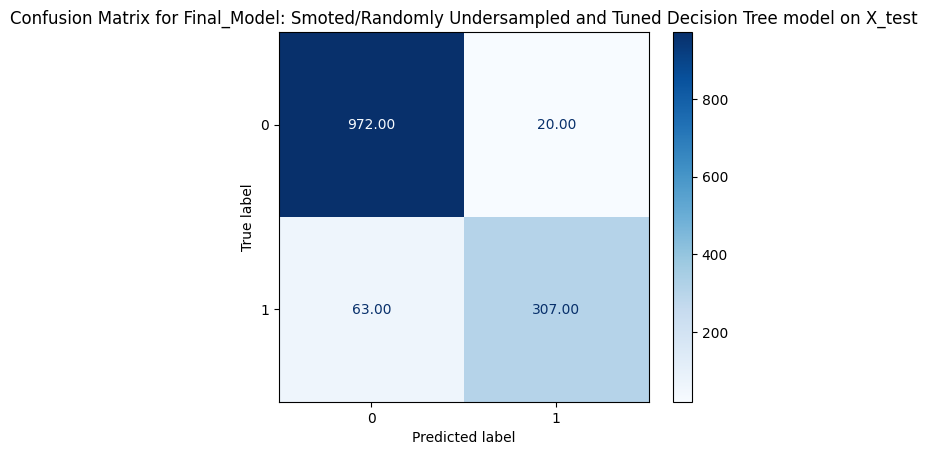

CV results for Min_Max Normalized, Smoted/Randomly Undersampled and tuned model model: 0.95685 +- 0.00518 accuracy
Average specificity: 0.95095
Average precision: 0.95162
Average recall: 0.96275
CV results for Basemodel Smoted/Randomly Undersampled model model: 0.95553 +- 0.00625 accuracy
Average specificity: 0.95217
Average precision: 0.95256
Average recall: 0.95889
Final results for Final_Model: Smoted/Randomly Undersampled and Tuned Decision Tree model model on X_test:
Accuracy: 0.93906
Specificity: 0.97984
Precision: 0.93884
Recall: 0.82973


In [100]:
#instantiate the class
Final_Model_Results= Model_with_final(model= dt_SR_Tuned_A,
                                    model_name= 'Final_Model: Smoted/Randomly Undersampled and Tuned Decision Tree model',
                                    X_train = X_train_SR,
                                    y_train = y_train_SR,
                                     X_test = X_test,
                                     y_test = y_test)
Final_Model_Results.plot_conf_matrix()

lr_MM_SR_tuned_model_results.print_cv_summary()
Dt_SR_model_results.print_cv_summary()
Final_Model_Results.print_final_summary()

## Hyper parameter tuning via Grid Search with Cross Validation

### tune for specificity on the smote and balanced set

In [ ]:
#create a logistic regression grid for the grid search to iterate through
param_grid= {
    'penalty': ['l1', 'l2'],
    'C':[1e13, 1e16, 1e19],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'fit_intercept': [True, False],
    'max_iter': [100, 1000, 2500, 5000, 10000000]
    }

#calculates specificity
def specificity(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    return TN / (TN + FP) if (TN + FP) != 0 else 0

#define specificity as a usable scoring parameter for Grid search
def specificity_scorer(estimator, X, y):
    y_pred = estimator.predict(X) 
    return specificity(y, y_pred)

log_reg= LogisticRegression(random_state= 24, C=1e16)

lr_cv_gs= GridSearchCV(estimator= log_reg,
                       param_grid= param_grid,
                       scoring= specificity_scorer, 
                       cv= 5,
                       verbose=1,
                       n_jobs=-1,
                      )

lr_cv_gs_bf= lr_cv_gs.fit(X_train_MM_SR, y_train_SR)
lr_cv_gs_bf.best_estimator_
    
    
    

In [ ]:
lr_cv_gs_bf.best_estimator_

# Seveth model: Using min max scaler and grid_lr_MM_SR grid search specification reccomendations

## build model and evaluate

In [ ]:
#initialize the model
lr_MM_GS1 = LogisticRegression(C=1e16, fit_intercept=False, penalty='l2', random_state=24,
                   solver='newton-cg')
#fit the model
lr_MM_GS1.fit(X_train_MM_SR, y_train_SR)
#make predictions with the model
y_pred_lr_MM_GS1= lr_MM_GS1.predict(X_train_MM_SR)

#compare the classification report to the previous models
print('Min_Max Normalized model classification report (Previous Best):')
print(classification_report(y_train, y_pred_lr_MM))
print()
print('Min_Max Normalized and Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_SR))
print()
print('Min_Max Normalized and Grid Search 1 model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_GS1))

In [ ]:
#lets compare this new model's cross validation scores to the previous models
MM_GS1_cv_results = cross_val_score(lr_MM_GS1, X_train_MM_SR, y_train_SR, cv= 6)

print('An array of Min Max normalized model accuracy results across (6) cross Validations (previous best):')
print(MM_cv_results)
print('An array of Min Max normalized and then Smoted/Randomly Undersampled accuracy results across (6) cross Validations:')
print(MM_SR_cv_results)
print('An array of Min Max normalized and then Grid Search 1 model accuracy results across (6) cross Validations:')
print(MM_GS1_cv_results)

print()

print('The average accuracy score of those 6 Min Max Normalized cross-validations (previous best):')
print(MM_cv_results.mean())
print('The average accuracy score of those 6 Min Max Normalized then Smoted/Randomly Undersampled cross-validations:')
print(MM_SR_cv_results.mean())
print('The average accuracy score of those 6 Min Max Normalized then Grid Search 1 cross-validations:')
print(MM_GS1_cv_results.mean())

In [ ]:
#instantiate the class
MM_GS1_model_results= ModelWithCV(model= lr_MM_GS1,
                                    model_name= 'MM_GS1_LR_Model',
                                    X= X_train_MM_SR,
                                    y= y_train_SR)

#plot the results
fig, ax= plt.subplots()

ax= MM_GS1_model_results.plot_cv(ax)
plt.tight_layout()

MM_model_results.print_cv_summary()
MM_SR_model_results.print_cv_summary()
MM_GS1_model_results.print_cv_summary()

In [ ]:
#plot the confusion matrix for this model
fig, ax = plt.subplots()
fig.suptitle('Min_Max_Normalized_GS1_LR_Model')

cm_display= ConfusionMatrixDisplay.from_estimator(estimator= lr_MM_GS1, 
                                                  X= X_train_MM_SR,
                                                  y= y_train_SR, 
                                                  cmap= 'plasma',
                                                  ax= ax)
#print out the raw matrix numbers
MM_GS1_lr_matrix= confusion_matrix(y_train_SR, lr_MM_GS1.predict(X_train_MM_SR))
print('Confusion Matrix')

plt.tight_layout()
plt.show()

#calculate specificity
TN = MM_GS1_lr_matrix[0][0]  # First row, first column
FP = MM_GS1_lr_matrix[0][1]
MM_GS1_specificity = TN / (TN + FP)
print(MM_GS1_lr_matrix)
print(f'Min Max Normalized Specificity (Previous Best):{MM_specificity}')
print(f'Min Max Normalized Smoted and Randomly Undersampled Specificity:{MM_SR_specificity}')
print(f'Min Max Normalized GS1 Specificity:{MM_GS1_specificity}')

### try tuning for accuracy

In [ ]:
#create a logistic regression grid for the grid search to iterate through
grid_lr_MM_2= {
    'penalty': ['l1', 'l2'],
    'C':np.logspace(-6,20,4),
    'tol': np.logspace(-5,5,4),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
    }

lr_cv_gs2= GridSearchCV(estimator= LogisticRegression(fit_intercept=False, random_state= 24),
                       param_grid= grid_lr_MM_2, scoring= 'accuracy', cv= 5)

lr_cv_gs_bf2= lr_cv_gs2.fit(X_train_MM, y_train)
lr_cv_gs_bf2.best_estimator_

In [ ]:
lr_cv_gs_bf2.best_estimator_

In [ ]:
"(C=0.001, fit_intercept=False, penalty='l1', random_state=24,solver='liblinear')"=="(C=0.001, fit_intercept=False, penalty='l1', random_state=24,solver='liblinear')"

In [ ]:
#create a logistic regression grid for the grid search to iterate through
param_grid= {
    'penalty': ['l1', 'l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear','saga'],
    'fit_intercept': [True, False],
    'max_iter': [100, 1000, 2500, 5000]
    }

#calculates specificity
def specificity(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    return TN / (TN + FP) if (TN + FP) != 0 else 0

#define specificity as a usable scoring parameter for Grid search
def specificity_scorer(estimator, X, y):
    y_pred = estimator.predict(X) 
    return specificity(y, y_pred)

log_reg= LogisticRegression(random_state= 24)

lr_cv_gs= GridSearchCV(estimator= log_reg,
                       param_grid= param_grid,
                       scoring= specificity_scorer, 
                       cv= 5,
                       verbose=1,
                       n_jobs=-1,
                      )

lr_cv_gs_bf= lr_cv_gs.fit(X_train_MM, y_train)
lr_cv_gs_bf.best_estimator_
    
    

In [ ]:
#initialize the model
lr_MM_GS2 = LogisticRegression(C=0.001, penalty='l1', random_state=24, solver='liblinear')
#fit the model
lr_MM_GS2.fit(X_train_MM, y_train)
#make predictions with the model
y_pred_lr_MM_GS2= lr_MM_GS2.predict(X_train_MM)

#compare the classification report to the previous models
print('Min_Max Normalized model classification report (Previous Best):')
print(classification_report(y_train, y_pred_lr_MM))
print()
print('Min_Max Normalized and Smoted/Randomly Undersampled model classification report:')
print(classification_report(y_train_SR, y_pred_lr_MM_SR))
print()
print('Min_Max Normalized and Grid Search 1 model classification report:')
print(classification_report(y_train, y_pred_lr_MM_GS2))

In [ ]:
#create a logistic regression grid for the grid search to iterate through
param_grid= {
    'penalty': ['l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'fit_intercept': [True, False],
    'max_iter': [100, 1000, 2500, 5000]
    }

#calculates specificity
def specificity(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    return TN / (TN + FP) if (TN + FP) != 0 else 0

#define specificity as a usable scoring parameter for Grid search
def specificity_scorer(estimator, X, y):
    y_pred = estimator.predict(X) 
    return specificity(y, y_pred)

log_reg= LogisticRegression(random_state= 24)

lr_cv_gs= GridSearchCV(estimator= log_reg,
                       param_grid= param_grid,
                       scoring= specificity_scorer, 
                       cv= 5,
                       verbose=1,
                       n_jobs=-1,
                      )

lr_cv_gs_bf= lr_cv_gs.fit(X_train_MM, y_train)
lr_cv_gs_bf.best_estimator_
    


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Sample dataset (replace with your own data)
data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Binary classification target
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define X (features) and y (target)
X = df[['feature1', 'feature2']]
y = df['target']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (RandomForest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_predict = model.predict(X_test)

# Print classification report comparing true labels (y_test) with predicted labels (y_predict)
print(classification_report(y_test, y_predict))


# inspect the training data

In [ ]:
#Check for high levels or correlation among the X_train data.
#Anything above 0.8 could be problematic for model classification
X_train.corr()

here we can see that there is a lot of high correlation betweeen the dimensionaql variables. this can potentially ve a problem for predictive models given the following

In [ ]:
#logistic regression
"""
Unstable coefficient estimates: When variables are highly correlated, 
the model can have trouble determining the individual contribution of each feature. 
This can make the model's coefficients unstable, and they might change drastically 
with small changes in the data.

Overfitting: If you have many correlated variables, logistic regression might start 
to overfit, where it memorizes the noise in the data rather than learning the 
underlying patterns.

"""

#possible fixs are:
"""
Use variance inflation factor (VIF): A high VIF indicates high multicollinearity. 
If VIF is high for some variables, you might want to remove or combine them.

Principal Component Analysis (PCA): PCA can reduce the dimensionality of your feature
set while retaining as much variance as possible, which could be helpful if you're 
working with correlated features.

"""

In [ ]:
#Decision trees

"""
not so sensitive to high correlation and handles it pretty well.

if there is still too much multi-colinearity then pruning a tree or setting a depth 
limit can still help. So can Random Forests or Gradient Boosting. 

"""

Here we will check out the data distrobution to see what is normal and what is skewed.

A fair amount of this data does not have a normal distrobution and is either left or right skewed, which can be problematic with machine learning. 

In [ ]:
#if the data is right skewed use a log transformation.
#if it is slightly right skewed use a square root transformation
#if that fails use an exponential transformation

#if the data is left skewed you can use reciprocal transformation 
#can also use square or cube root transformation



make a function to redistribute skewed data

In [ ]:


#list of columns to transform and the redistribution methods

#columns to log transform
LogT=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',
      'EquivDiameter', 'ShapeFactor2']

#columns to Box-Cox transform
BoxCoxT= ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4']

#create a function to transform the columns in a data frame accordingly, or not
def TransShift(df):
    
    Redist= pd.DataFrame()
    
    for col in df.columns:
        if col in LogT:
            Redist[col]= np.log(df[col])
        elif col in BoxCoxT:
            Redist[col], _ = stats.boxcox(df[col] + 1)
        else:
            Redist[col]= df[col]
    
    return Redist


In [ ]:
#plot the new normalized data distribution to check it out
X_train_TransShift= TransShift(X_train)

#Create a figure to hold all subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

#Flatten the axes array to easily iterate over
axes = axes.flatten()

#Plot the original data
for i, col in enumerate(X_train_TransShift.columns):
    sns.histplot(X_train_TransShift[col], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Original: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()